
## Explanation of the variables of the dataset
1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI : Body Mass Index (BMI).
3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke : (Ever told) (you had) a stroke?
6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
9. Sex : Are you male or female?
10. AgeCategory: Fourteen-level age category
11. Race : Ethnicity
12. Diabetic : (Ever told) (you had) diabetes?
13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth : Would you say that in general your health is...
15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma : (Ever told) (you had) asthma?
17. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer : (Ever told) (you had) skin cancer?




 






<h1>Importing Libraries</h1>

In [86]:
#All Imports

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [87]:
#To display diagrams of Transformers in the Pipeline
from sklearn import set_config
set_config(display='diagram')

In [88]:
df = pd.read_csv('/Users/avinashjha/Downloads/VSC/DataSet/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [89]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [91]:
#Check Null Values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [92]:
#Delete Duplicates
df.drop_duplicates(inplace=True)


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00
SleepTime,301717.0,7.084559,1.467122,1.00,6.00,7.00,8.00,24.00


In [94]:
#Print all Unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print("Unique Values:", unique_values)
    print()

Column: HeartDisease
Unique Values: ['No' 'Yes']

Column: BMI
Unique Values: [16.6  20.34 26.58 ... 62.42 51.46 46.56]

Column: Smoking
Unique Values: ['Yes' 'No']

Column: AlcoholDrinking
Unique Values: ['No' 'Yes']

Column: Stroke
Unique Values: ['No' 'Yes']

Column: PhysicalHealth
Unique Values: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]

Column: MentalHealth
Unique Values: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]

Column: DiffWalking
Unique Values: ['No' 'Yes']

Column: Sex
Unique Values: ['Female' 'Male']

Column: AgeCategory
Unique Values: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

Column: Race
Unique Values: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Column: Diabetic
Unique Values: ['Yes' 'No' 'No, borderl

In [95]:
label_cols=["Smoking",
        "AlcoholDrinking",
        "Stroke",
        "DiffWalking",
        "Sex",
        "Diabetic",
        "PhysicalActivity",
        "Asthma",
        "KidneyDisease",
        "SkinCancer" ]

ohe_cols=["Race"]

ordinal_cols=["GenHealth"]

numerical_cols=["BMI",
                "PhysicalHealth",
                "MentalHealth",
                "SleepTime",
                "AgeCategory"]


Refining Data


In [96]:
#DIABETIC#
df["Diabetic"] =  df["Diabetic"].replace({'No, borderline diabetes':"No",
                              'Yes (during pregnancy)':"Yes" })

In [97]:
df_copy=pd.DataFrame({})

In [98]:
#Target
df_copy["HeartDisease"] = df["HeartDisease"].map({'No': 0, 'Yes': 1})

def changeAgeCategory(rows):
        try:
           mean_age = np.mean([int(num) for num in rows['AgeCategory'].split("-")])
           return mean_age
        except:
           if rows['AgeCategory'].lower()=="80 or older":
               mean_age=80
               return mean_age

df_copy["AgeCategory"]=df.apply(changeAgeCategory,axis=1)
df_copy[numerical_cols[:-1]]=df[numerical_cols[:-1]]
df_copy[ohe_cols]=df[ohe_cols]
df_copy[ordinal_cols]=df[ordinal_cols]

label_encoder = LabelEncoder()
for cols in label_cols:
    df_copy[cols] = label_encoder.fit_transform(df[cols])
    
df_copy    


,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Race,GenHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,57.0,16.60,3.0,30.0,5.0,White,Very good,1,0,0,0,0,1,1,1,0,1
1,0,80.0,20.34,0.0,0.0,7.0,White,Very good,0,0,1,0,0,0,1,0,0,0
2,0,67.0,26.58,20.0,30.0,8.0,White,Fair,1,0,0,0,1,1,1,1,0,0
3,0,77.0,24.21,0.0,0.0,6.0,White,Good,0,0,0,0,0,0,0,0,0,1
4,0,42.0,23.71,28.0,0.0,8.0,White,Very good,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,62.0,27.41,7.0,0.0,6.0,Hispanic,Fair,1,0,0,1,1,1,0,1,0,0
319791,0,37.0,29.84,0.0,0.0,5.0,Hispanic,Very good,1,0,0,0,1,0,1,1,0,0
319792,0,47.0,24.24,0.0,0.0,6.0,Hispanic,Good,0,0,0,0,0,0,1,0,0,0
319793,0,27.0,32.81,0.0,0.0,12.0,Hispanic,Good,0,0,0,0,0,0,0,0,0,0


In [99]:
z_scores = pd.DataFrame((df_copy[numerical_cols] - df_copy[numerical_cols].mean()) / df_copy[numerical_cols].std())
threshold = 3
outliers = df[(z_scores > threshold).any(axis=1)]
print(outliers.shape)
df_copy = df_copy.drop(outliers.index)

(37846, 18)


<h1>Visualizations</h1>


<Axes: >

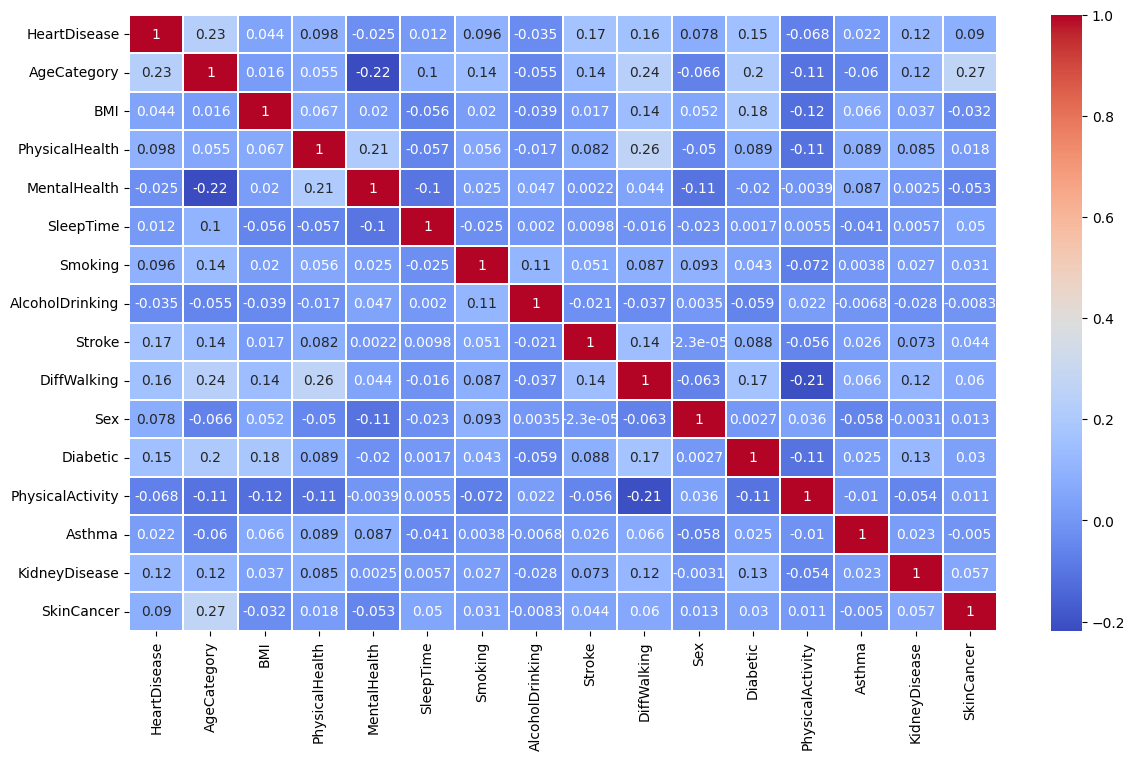

In [100]:
#HeatMap
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(df_copy.select_dtypes(exclude="object").corr(),cmap="coolwarm",linewidth=0.2,annot=True)

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

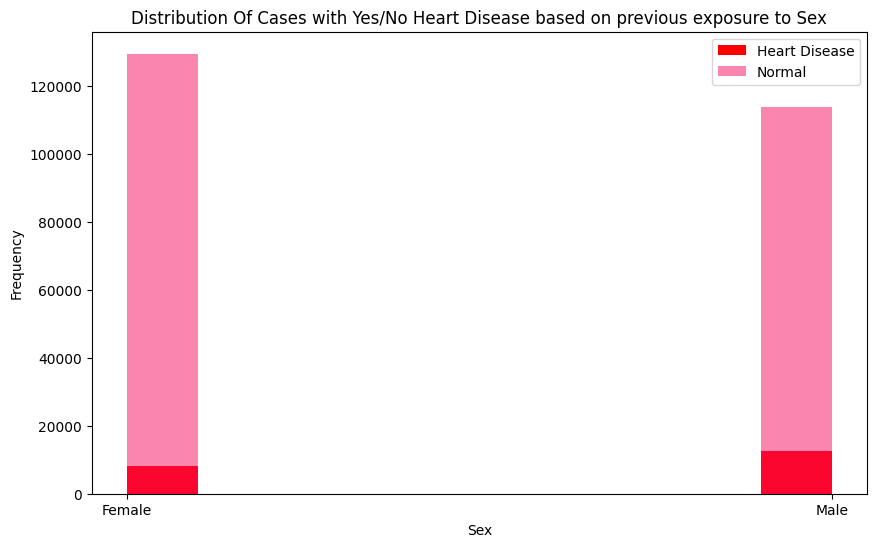

In [101]:
ax=df_copy[df_copy["HeartDisease"]==1]["Sex"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to Sex",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["Sex"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)
ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.set_xticks([0,1])
ax.set_xticklabels(["Female","Male"])


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

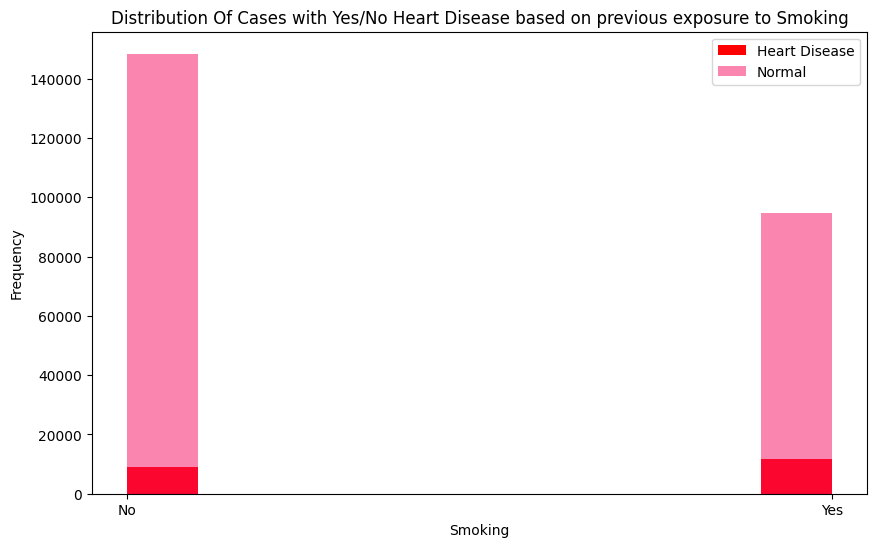

In [102]:
ax=df_copy[df_copy["HeartDisease"]==1]["Smoking"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to Smoking",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["Smoking"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)
ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])

Text(0, 0.5, 'Frequency')

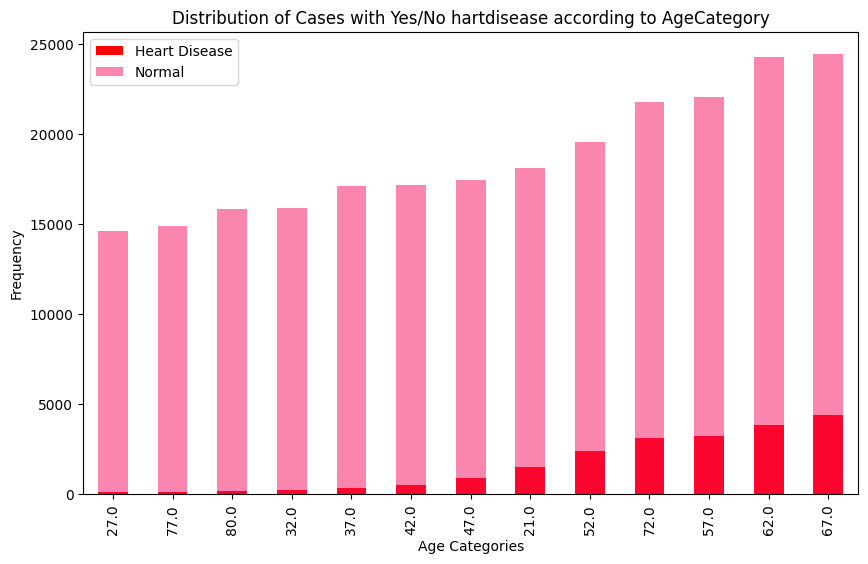

In [103]:
ax=df_copy[df_copy["HeartDisease"]==1]["AgeCategory"].value_counts().sort_values(ascending=True).plot(kind="bar",
                                                                          title="Distribution of Cases with Yes/No hartdisease according to AgeCategory",
                                                                          color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["AgeCategory"].value_counts().sort_values(ascending=True).plot(kind="bar",color="#F60D5F",alpha=0.5)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Age Categories")
ax.set_ylabel("Frequency")




[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

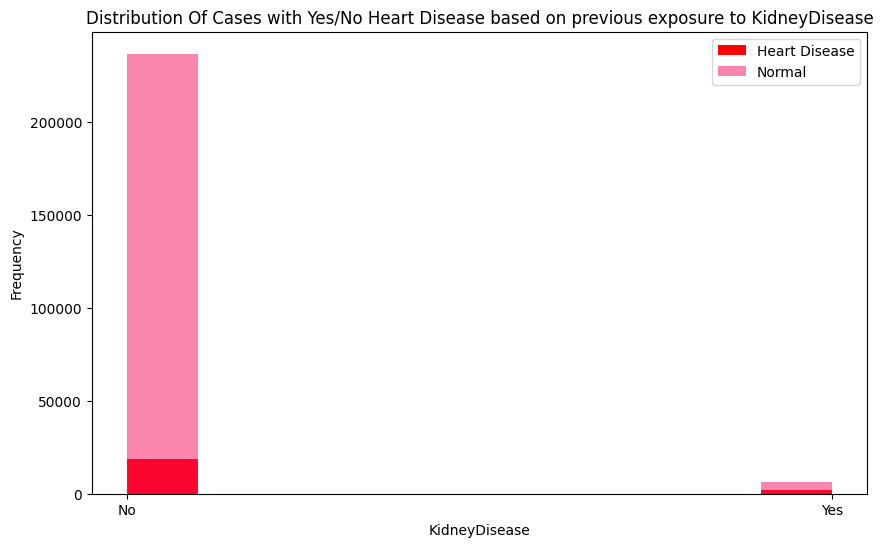

In [104]:
ax=df_copy[df_copy["HeartDisease"]==1]["KidneyDisease"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to KidneyDisease",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["KidneyDisease"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

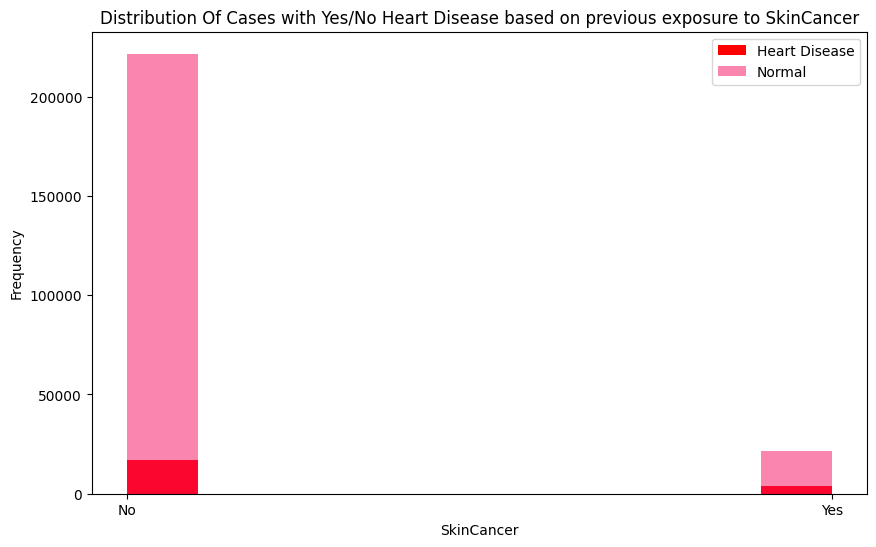

In [105]:
ax=df_copy[df_copy["HeartDisease"]==1]["SkinCancer"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to SkinCancer",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["SkinCancer"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

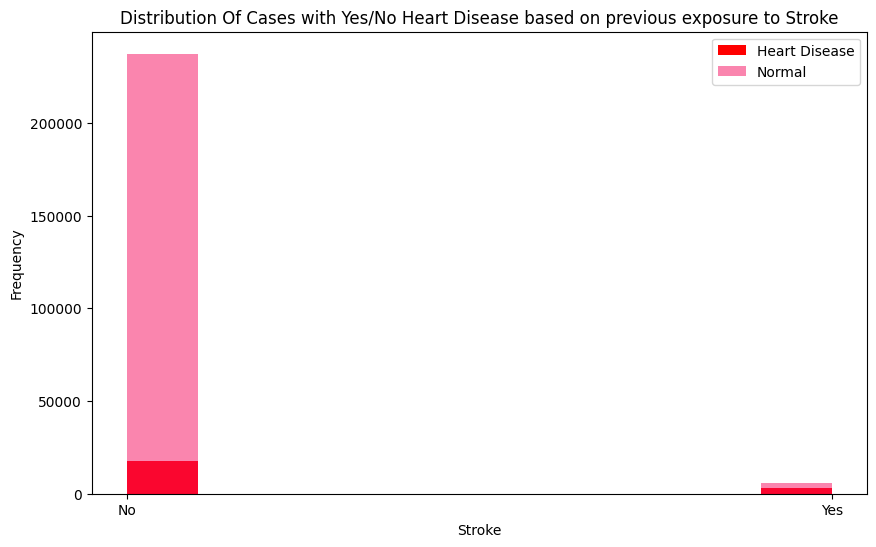

In [106]:
ax=df_copy[df_copy["HeartDisease"]==1]["Stroke"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to Stroke",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["Stroke"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

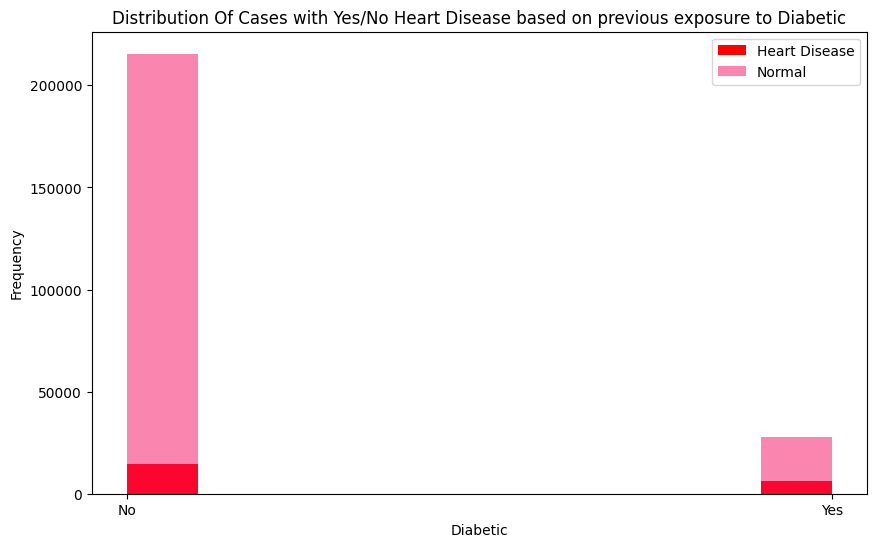

In [107]:
ax=df_copy[df_copy["HeartDisease"]==1]["Diabetic"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to Diabetic",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["Diabetic"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])


Text(0, 0.5, 'Density')

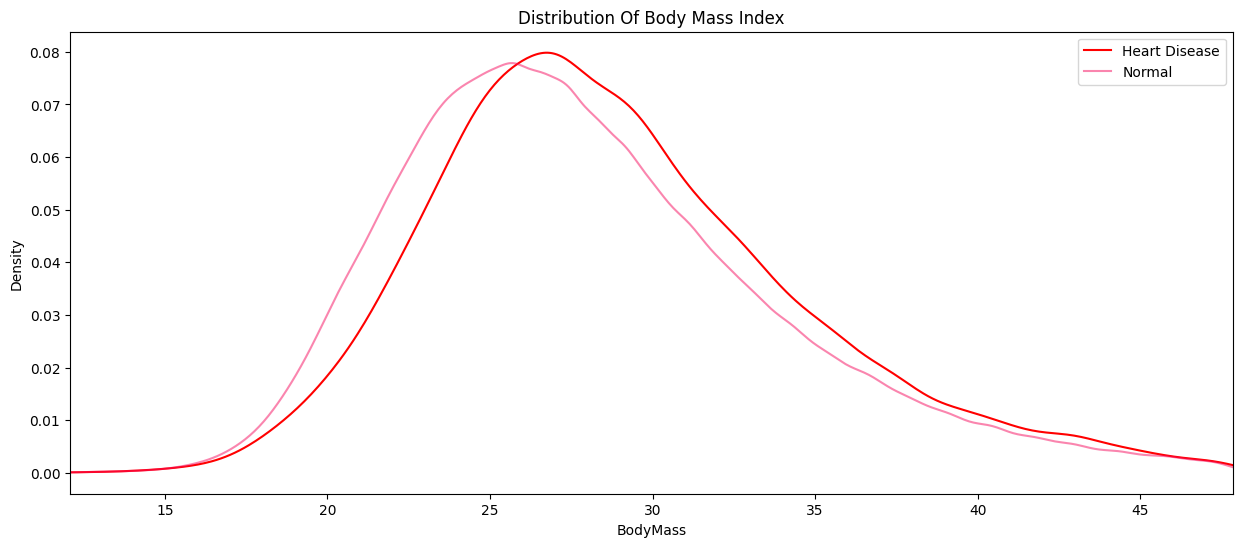

In [108]:
max_x=df_copy["BMI"].max()
min_x=df_copy["BMI"].min()

ax=df_copy[df_copy["HeartDisease"]==1]["BMI"].plot(kind="density",title="Distribution Of Body Mass Index",color="Red",alpha=1,figsize=(15,6),xlim=(min_x,max_x))
ax=df_copy[df_copy["HeartDisease"]==0]["BMI"].plot(kind="density",color="#F60D5F",alpha=0.5,xlim=(min_x,max_x))
ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("BodyMass")
ax.set_ylabel("Density")


Text(0, 0.5, 'Density')

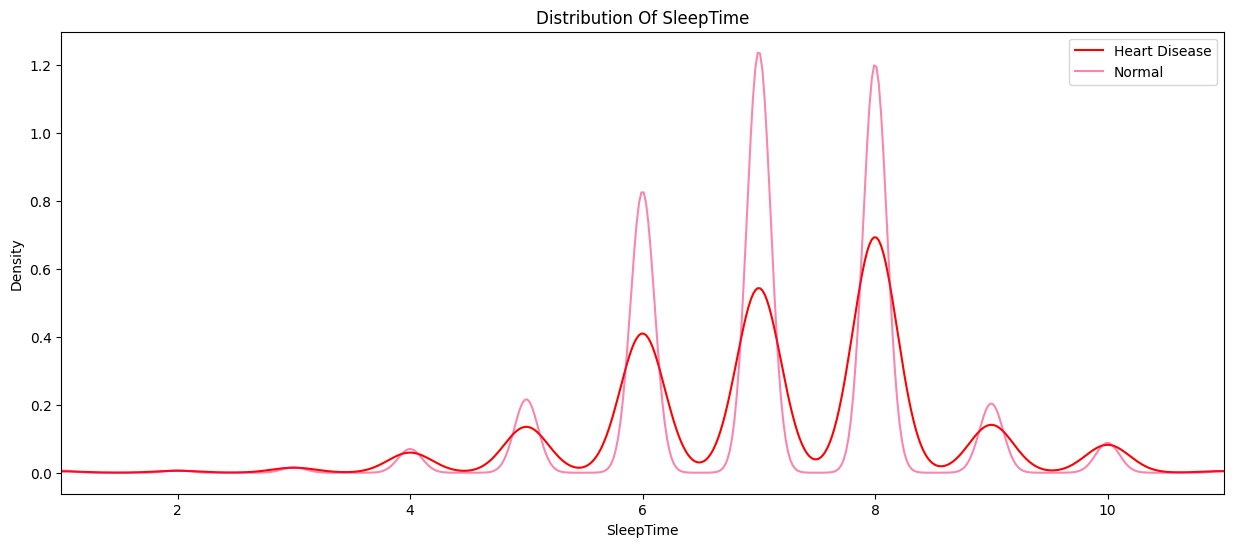

In [109]:
max_x=df_copy["SleepTime"].max()
min_x=df_copy["SleepTime"].min()

ax=df_copy[df_copy["HeartDisease"]==1]["SleepTime"].plot(kind="density",title="Distribution Of SleepTime",color="Red",alpha=1,figsize=(15,6),xlim=(min_x,max_x))
ax=df_copy[df_copy["HeartDisease"]==0]["SleepTime"].plot(kind="density",color="#F60D5F",alpha=0.5,xlim=(min_x,max_x))
ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("SleepTime")
ax.set_ylabel("Density")

Text(0, 0.5, 'Density')

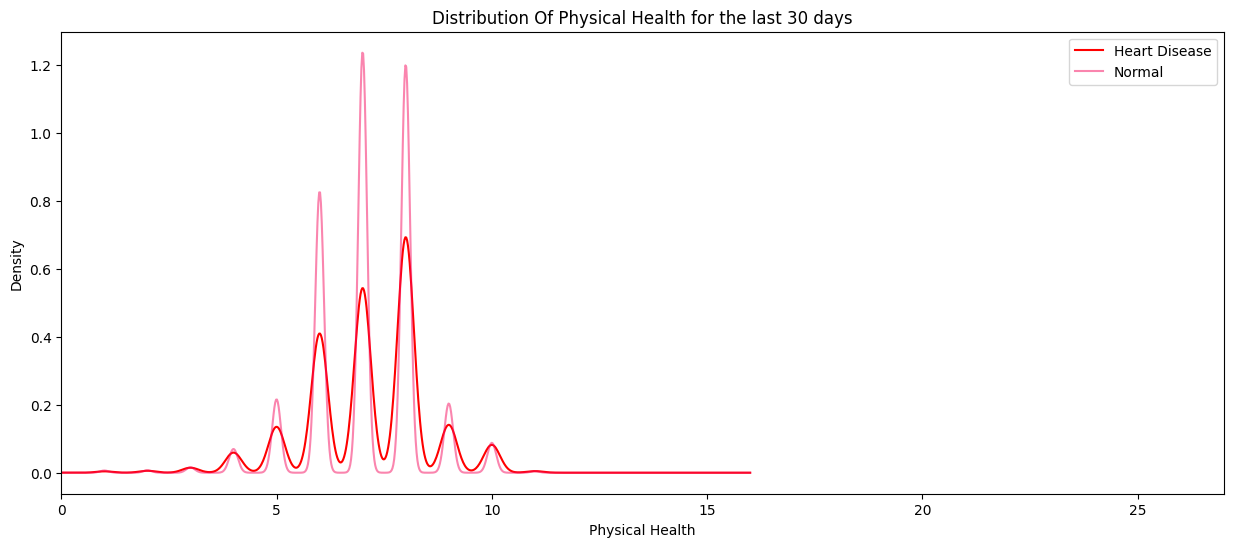

In [110]:
max_x=df_copy["PhysicalHealth"].max()
min_x=df_copy["PhysicalHealth"].min()

ax=df_copy[df_copy["HeartDisease"]==1]["SleepTime"].plot(kind="density",
                                                         title="Distribution Of Physical Health for the last 30 days",
                                                         color="Red",alpha=1,figsize=(15,6),xlim=(min_x,max_x))

ax=df_copy[df_copy["HeartDisease"]==0]["SleepTime"].plot(kind="density",color="#F60D5F",alpha=0.5,xlim=(min_x,max_x))

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Physical Health")
ax.set_ylabel("Density")

Text(0, 0.5, 'Density')

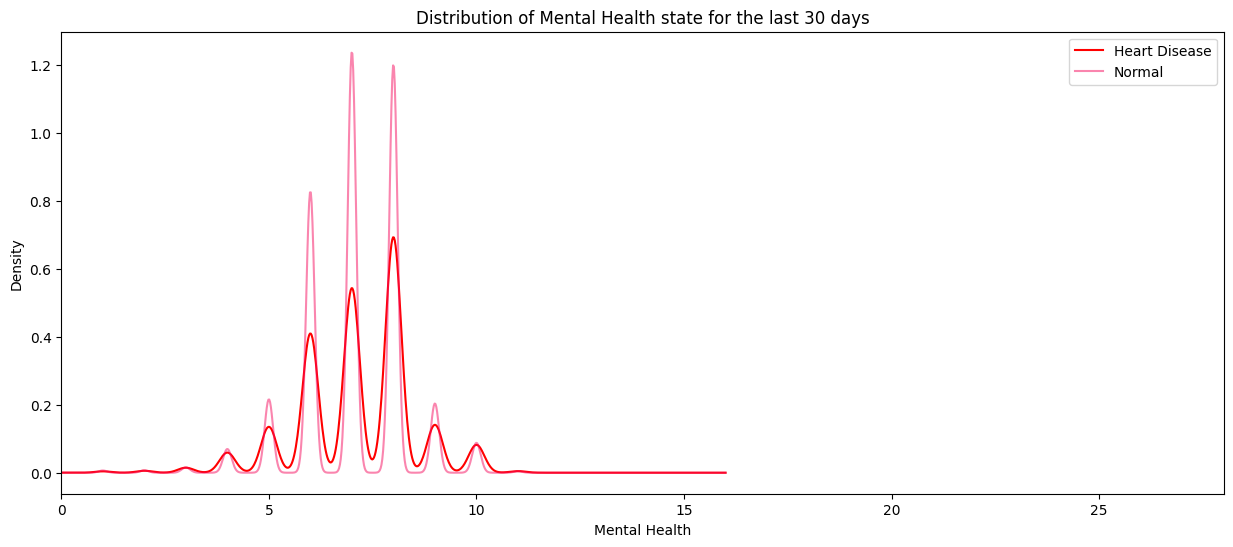

In [111]:
max_x=df_copy["MentalHealth"].max()
min_x=df_copy["MentalHealth"].min()

ax=df_copy[df_copy["HeartDisease"]==1]["SleepTime"].plot(kind="density",
                                                         title="Distribution of Mental Health state for the last 30 days",
                                                         color="Red",alpha=1,figsize=(15,6),xlim=(min_x,max_x))

ax=df_copy[df_copy["HeartDisease"]==0]["SleepTime"].plot(kind="density",color="#F60D5F",alpha=0.5,xlim=(min_x,max_x))

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Mental Health")
ax.set_ylabel("Density")

<h1>Train Test Split
</h1>

In [112]:
#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(df_copy.iloc[:,1:],df_copy.iloc[:,0],test_size=0.2,random_state=1)


In [113]:
print(x_test.shape,x_train.shape)

(52775, 17) (211096, 17)


In [114]:
#Encoding
preprocessor=ColumnTransformer([
    ("ohe_feature",OneHotEncoder(sparse=False,drop="first"),ohe_cols),
    ("ord",OrdinalEncoder(),ordinal_cols),
    ("scale",StandardScaler(),numerical_cols)
],remainder="passthrough")

#All Models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree',DecisionTreeClassifier()),
    ('KNN',KNeighborsClassifier(n_neighbors=18))
]

In [115]:
#To store each of the model's metrics
model_metrics = {}


In [116]:
# Train multiple models using the same pipeline
for model_name, model in models:
          
          pipeline = Pipeline([
          ('preprocessor', preprocessor),
          ('model', model)
          ])
          pipeline.fit(x_train, y_train)
          
          y_pred = pipeline.predict(x_test)
          y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
          
          metrics = {
                     'Accuracy': accuracy_score(y_test, y_pred),
                     'Precision': precision_score(y_test, y_pred),
                     'Recall': recall_score(y_test, y_pred),
                     'F1 Score': f1_score(y_test, y_pred),
                     'Cohen\'s Kappa Score': cohen_kappa_score(y_test, y_pred),
                     'AUC': roc_auc_score(y_test, y_pred_proba),
                     'Confusion Matrix': confusion_matrix(y_test, y_pred),
                     'fpr':roc_curve(y_test, y_pred_proba)[0],
                     'tpr' :roc_curve(y_test, y_pred_proba)[1]
                    }
    
          model_metrics[model_name] = metrics
          

for model_name, metrics in model_metrics.items():
          print(f'{model_name} Metrics:')
          print()
          for metric_name, value in metrics.items():
                  print(f'{metric_name}: {value}')
                  print('------------------------------------------------')
          print()
          print()

Logistic Regression Metrics:

Accuracy: 0.9206821411653245
------------------------------------------------
Precision: 0.5010309278350515
------------------------------------------------
Recall: 0.05803678051110581
------------------------------------------------
F1 Score: 0.10402397260273973
------------------------------------------------
Cohen's Kappa Score: 0.08901837710240856
------------------------------------------------
AUC: 0.8239902488992763
------------------------------------------------
Confusion Matrix: [[48346   242]
 [ 3944   243]]
------------------------------------------------
fpr: [0.00000000e+00 2.05812135e-05 2.05812135e-05 ... 9.97303861e-01
 9.97303861e-01 1.00000000e+00]
------------------------------------------------
tpr: [0.00000000e+00 0.00000000e+00 7.16503463e-04 ... 9.99761166e-01
 1.00000000e+00 1.00000000e+00]
------------------------------------------------


Random Forest Metrics:

Accuracy: 0.9082899099952629
---------------------------------------

In [117]:
#Display First Model's Metrics
next(iter(model_metrics.items()))


('Logistic Regression',
 {'Accuracy': 0.9206821411653245,
  'Precision': 0.5010309278350515,
  'Recall': 0.05803678051110581,
  'F1 Score': 0.10402397260273973,
  "Cohen's Kappa Score": 0.08901837710240856,
  'AUC': 0.8239902488992763,
  'Confusion Matrix': array([[48346,   242],
         [ 3944,   243]]),
  'fpr': array([0.00000000e+00, 2.05812135e-05, 2.05812135e-05, ...,
         9.97303861e-01, 9.97303861e-01, 1.00000000e+00]),
  'tpr': array([0.00000000e+00, 0.00000000e+00, 7.16503463e-04, ...,
         9.99761166e-01, 1.00000000e+00, 1.00000000e+00])})

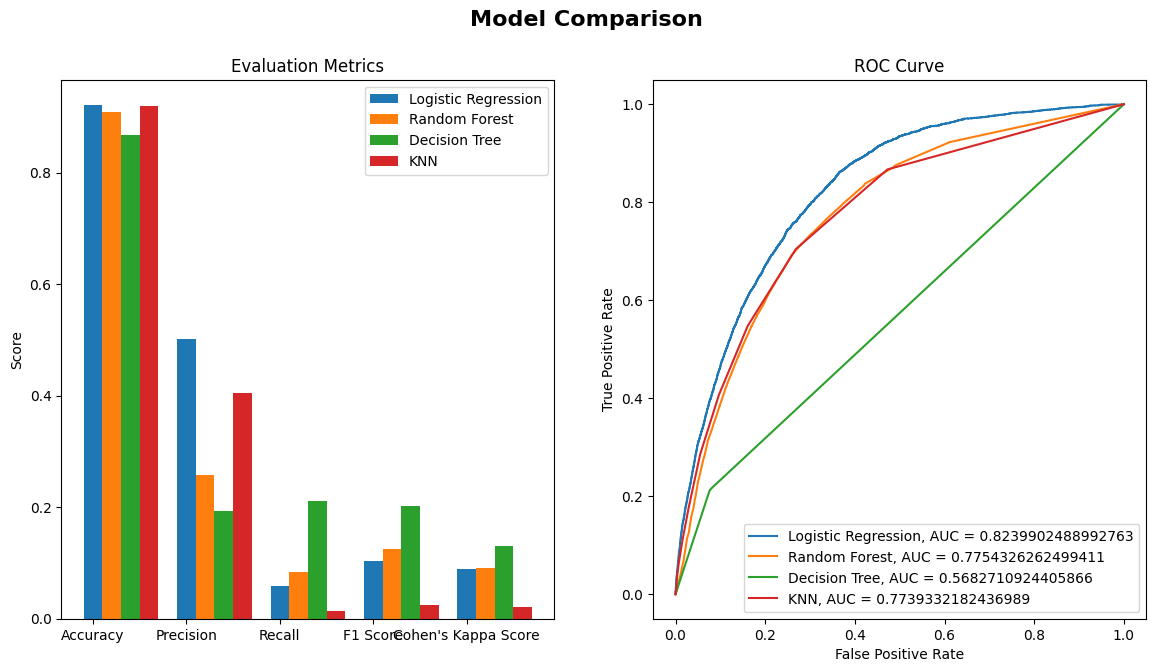

In [118]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Evaluation Metrics plot
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen\'s Kappa Score']
x = np.arange(len(labels))
width = 0.2

for i, (model_name, metrics) in enumerate(model_metrics.items()):
    
    scores = [
              metrics['Accuracy'],
              metrics['Precision'],
              metrics['Recall'], 
              metrics['F1 Score'], 
              metrics['Cohen\'s Kappa Score']
              ]
    
    ax1.bar(x + i*width, scores, width, label=model_name)

ax1.set_ylabel('Score')
ax1.set_title('Evaluation Metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

# ROC Curve plot
for model_name, metrics in model_metrics.items():

    ax2.plot(
        metrics["fpr"], 
        metrics["tpr"], 
        label=f'{model_name}, AUC = {metrics["AUC"]}'
        )

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()

plt.show()

<h1>KNN : Best Value of K
</h1>

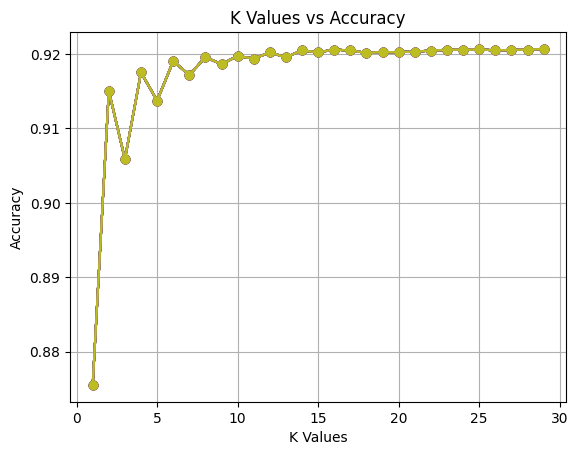

In [119]:
#To Check which Value of K in KNN model is the most efficient

k_vals=np.arange(1,30,dtype=int)
acc=[]
knn_models=[(str(k)+"KNN",KNeighborsClassifier(n_neighbors=k)) for k in k_vals]
fig,ax=plt.subplots()    

for modelname,model in knn_models:
    pipeline = Pipeline([
            ('preprocessor', preprocessor),
            (modelname, model)
            ])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    acc.append(accuracy_score(y_pred,y_test))
    
for modelname,model in knn_models:
    
    ax.plot(k_vals,acc,marker='o')
    ax.set_xlabel("K Values")
    ax.set_ylabel("Accuracy")
    ax.set_title("K Values vs Accuracy")
    ax.grid(True)

In [120]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
numerical_columns = df.select_dtypes(exclude=object).columns

# Calculate z-scores for each numerical column
z_scores = pd.DataFrame((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())

# Define a threshold for identifying outliers
threshold = 3

# Find outliers based on z-scores exceeding the threshold
outliers = df[(z_scores > threshold).any(axis=1)]

# Print the outliers
print("Outliers:")
print(outliers.shape)


Outliers:
(37846, 18)


In [121]:
df_copy_new = df_copy.drop(outliers.index)
x_train,x_test,y_train,y_test=train_test_split(df_copy_new.iloc[:,1:],df_copy_new.iloc[:,0],test_size=0.2,random_state=1)
# Train multiple models using the same pipeline
for model_name, model in models:
          
          pipeline = Pipeline([
          ('preprocessor', preprocessor),
          ('model', model)
          ])
          pipeline.fit(x_train, y_train)
          
          y_pred = pipeline.predict(x_test)
          y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
          
          metrics = {
                     'Accuracy': accuracy_score(y_test, y_pred),
                     'Precision': precision_score(y_test, y_pred),
                     'Recall': recall_score(y_test, y_pred),
                     'F1 Score': f1_score(y_test, y_pred),
                     'Cohen\'s Kappa Score': cohen_kappa_score(y_test, y_pred),
                     'AUC': roc_auc_score(y_test, y_pred_proba),
                     'Confusion Matrix': confusion_matrix(y_test, y_pred),
                     'fpr':roc_curve(y_test, y_pred_proba)[0],
                     'tpr' :roc_curve(y_test, y_pred_proba)[1]
                    }
    
          model_metrics[model_name] = metrics
          

for model_name, metrics in model_metrics.items():
          print(f'{model_name} Metrics:')
          print()
          for metric_name, value in metrics.items():
                  print(f'{metric_name}: {value}')
                  print('------------------------------------------------')
          print()
          print()

KeyError: '[0, 2, 4, 5, 10, 14, 17, 23, 25, 32, 44, 50, 57, 76, 78, 80, 90, 101, 105, 115, 119, 121, 126, 138, 155, 162, 165, 166, 188, 200, 206, 229, 240, 250, 254, 262, 263, 267, 270, 272, 273, 277, 278, 279, 281, 284, 288, 296, 297, 306, 315, 317, 323, 326, 335, 336, 343, 346, 350, 371, 378, 382, 384, 398, 404, 406, 430, 451, 453, 459, 469, 489, 504, 508, 522, 538, 539, 543, 544, 545, 551, 553, 559, 561, 564, 570, 572, 575, 580, 581, 586, 605, 606, 616, 618, 622, 625, 629, 636, 650, 659, 668, 673, 680, 686, 689, 700, 703, 718, 725, 727, 728, 733, 738, 747, 749, 750, 762, 774, 783, 789, 798, 801, 833, 840, 849, 857, 868, 882, 891, 896, 897, 905, 908, 945, 958, 964, 966, 968, 977, 987, 998, 1002, 1005, 1006, 1009, 1015, 1018, 1020, 1022, 1025, 1027, 1029, 1064, 1089, 1100, 1101, 1103, 1105, 1108, 1112, 1125, 1137, 1147, 1154, 1158, 1166, 1167, 1170, 1190, 1191, 1196, 1198, 1202, 1204, 1212, 1216, 1227, 1230, 1264, 1267, 1269, 1273, 1284, 1291, 1294, 1305, 1309, 1311, 1313, 1329, 1336, 1339, 1358, 1375, 1376, 1377, 1382, 1393, 1403, 1406, 1407, 1410, 1417, 1430, 1432, 1434, 1435, 1444, 1449, 1454, 1455, 1459, 1466, 1467, 1469, 1470, 1475, 1480, 1488, 1496, 1504, 1505, 1512, 1535, 1543, 1563, 1567, 1573, 1578, 1587, 1619, 1636, 1641, 1643, 1648, 1657, 1663, 1673, 1675, 1677, 1685, 1688, 1698, 1699, 1700, 1704, 1712, 1721, 1723, 1724, 1730, 1742, 1773, 1784, 1790, 1797, 1802, 1804, 1806, 1817, 1821, 1822, 1830, 1838, 1840, 1850, 1860, 1864, 1868, 1869, 1872, 1878, 1881, 1886, 1887, 1903, 1926, 1931, 1943, 1949, 1951, 1958, 1963, 1964, 1970, 1999, 2007, 2014, 2016, 2029, 2052, 2054, 2060, 2064, 2078, 2082, 2085, 2086, 2098, 2101, 2107, 2122, 2132, 2142, 2143, 2173, 2179, 2185, 2190, 2207, 2210, 2215, 2225, 2238, 2247, 2254, 2257, 2272, 2275, 2276, 2277, 2283, 2287, 2288, 2302, 2311, 2320, 2330, 2331, 2334, 2342, 2343, 2352, 2353, 2359, 2366, 2367, 2368, 2378, 2382, 2383, 2385, 2393, 2406, 2407, 2424, 2434, 2438, 2444, 2449, 2455, 2461, 2466, 2467, 2468, 2482, 2490, 2497, 2498, 2499, 2508, 2512, 2513, 2518, 2525, 2526, 2537, 2539, 2547, 2549, 2555, 2556, 2560, 2572, 2582, 2585, 2592, 2601, 2615, 2636, 2645, 2650, 2656, 2658, 2663, 2666, 2668, 2675, 2686, 2699, 2710, 2711, 2715, 2721, 2730, 2740, 2750, 2753, 2759, 2761, 2767, 2770, 2772, 2780, 2784, 2787, 2816, 2819, 2821, 2826, 2838, 2849, 2854, 2856, 2858, 2859, 2866, 2882, 2892, 2900, 2901, 2909, 2919, 2920, 2928, 2933, 2942, 2945, 2948, 2949, 2953, 2964, 2966, 2968, 2978, 2983, 2989, 2995, 2999, 3003, 3010, 3019, 3024, 3040, 3041, 3058, 3059, 3060, 3061, 3065, 3069, 3086, 3089, 3094, 3098, 3103, 3108, 3125, 3129, 3133, 3137, 3143, 3148, 3150, 3153, 3159, 3164, 3170, 3178, 3180, 3187, 3188, 3189, 3193, 3197, 3199, 3200, 3201, 3209, 3233, 3238, 3242, 3248, 3249, 3258, 3259, 3316, 3317, 3325, 3327, 3329, 3330, 3332, 3337, 3343, 3349, 3364, 3367, 3376, 3379, 3380, 3384, 3389, 3394, 3413, 3417, 3418, 3420, 3423, 3429, 3433, 3440, 3442, 3457, 3478, 3488, 3499, 3509, 3519, 3536, 3546, 3554, 3555, 3560, 3563, 3564, 3570, 3574, 3582, 3591, 3598, 3618, 3641, 3643, 3656, 3661, 3667, 3677, 3682, 3683, 3684, 3685, 3688, 3692, 3693, 3710, 3712, 3717, 3733, 3734, 3742, 3752, 3755, 3760, 3771, 3773, 3774, 3777, 3778, 3780, 3784, 3786, 3793, 3794, 3795, 3802, 3814, 3815, 3823, 3832, 3836, 3838, 3839, 3840, 3849, 3851, 3854, 3856, 3860, 3864, 3872, 3880, 3884, 3902, 3903, 3918, 3924, 3925, 3934, 3937, 3941, 3943, 3952, 3955, 3960, 3966, 3990, 3993, 3997, 4009, 4012, 4016, 4033, 4034, 4048, 4049, 4050, 4054, 4057, 4079, 4084, 4095, 4100, 4104, 4119, 4121, 4130, 4142, 4143, 4145, 4151, 4162, 4164, 4170, 4171, 4172, 4180, 4193, 4194, 4199, 4200, 4201, 4208, 4210, 4211, 4219, 4222, 4225, 4226, 4231, 4232, 4247, 4250, 4254, 4255, 4261, 4266, 4273, 4301, 4310, 4315, 4320, 4323, 4340, 4342, 4343, 4345, 4347, 4351, 4370, 4376, 4383, 4384, 4388, 4393, 4395, 4396, 4420, 4421, 4427, 4429, 4433, 4434, 4453, 4481, 4499, 4531, 4537, 4555, 4557, 4576, 4577, 4584, 4593, 4605, 4607, 4612, 4619, 4622, 4623, 4637, 4654, 4664, 4668, 4675, 4729, 4738, 4744, 4755, 4756, 4758, 4759, 4785, 4809, 4837, 4852, 4855, 4859, 4866, 4867, 4888, 4893, 4897, 4921, 4934, 4941, 4946, 4950, 4954, 4957, 4966, 4967, 4979, 4985, 4987, 4992, 5005, 5013, 5024, 5025, 5034, 5036, 5043, 5060, 5067, 5089, 5105, 5114, 5140, 5157, 5158, 5178, 5193, 5199, 5201, 5202, 5208, 5219, 5243, 5280, 5283, 5294, 5311, 5312, 5313, 5317, 5328, 5332, 5338, 5343, 5346, 5358, 5365, 5369, 5389, 5398, 5408, 5415, 5431, 5432, 5463, 5464, 5470, 5472, 5476, 5483, 5511, 5514, 5515, 5519, 5541, 5556, 5565, 5573, 5575, 5577, 5583, 5584, 5590, 5593, 5597, 5598, 5609, 5627, 5657, 5659, 5661, 5664, 5680, 5688, 5700, 5707, 5718, 5741, 5757, 5770, 5773, 5779, 5782, 5783, 5789, 5800, 5810, 5811, 5815, 5819, 5833, 5841, 5848, 5849, 5851, 5891, 5902, 5911, 5936, 5939, 5941, 5950, 5963, 5969, 5970, 5992, 5993, 6003, 6020, 6026, 6027, 6037, 6065, 6066, 6072, 6078, 6085, 6090, 6095, 6098, 6103, 6106, 6112, 6126, 6140, 6142, 6160, 6161, 6187, 6198, 6226, 6227, 6238, 6242, 6243, 6248, 6264, 6285, 6298, 6318, 6320, 6347, 6355, 6357, 6379, 6410, 6425, 6458, 6468, 6476, 6505, 6533, 6549, 6563, 6569, 6572, 6575, 6583, 6605, 6616, 6626, 6627, 6631, 6633, 6644, 6650, 6658, 6665, 6668, 6671, 6675, 6679, 6689, 6712, 6725, 6737, 6750, 6779, 6805, 6829, 6832, 6844, 6850, 6862, 6866, 6892, 6896, 6901, 6928, 6946, 6959, 6965, 6969, 6975, 6985, 6986, 6987, 6990, 6994, 7000, 7005, 7011, 7016, 7031, 7033, 7046, 7047, 7060, 7087, 7094, 7101, 7135, 7143, 7150, 7152, 7176, 7182, 7195, 7205, 7208, 7211, 7216, 7231, 7250, 7274, 7285, 7309, 7319, 7341, 7352, 7373, 7391, 7394, 7400, 7405, 7430, 7436, 7444, 7445, 7450, 7457, 7467, 7474, 7476, 7486, 7487, 7501, 7507, 7517, 7524, 7527, 7537, 7546, 7548, 7554, 7560, 7562, 7565, 7570, 7572, 7581, 7599, 7627, 7630, 7633, 7637, 7639, 7653, 7664, 7665, 7686, 7690, 7696, 7699, 7706, 7708, 7709, 7742, 7749, 7758, 7776, 7786, 7809, 7818, 7826, 7827, 7832, 7835, 7842, 7851, 7857, 7861, 7862, 7868, 7870, 7890, 7894, 7895, 7900, 7905, 7924, 7942, 7944, 7952, 7960, 7985, 7998, 8018, 8038, 8041, 8044, 8068, 8069, 8086, 8088, 8103, 8117, 8138, 8149, 8158, 8159, 8168, 8170, 8171, 8176, 8211, 8224, 8227, 8232, 8241, 8246, 8292, 8293, 8297, 8298, 8299, 8305, 8312, 8322, 8333, 8344, 8349, 8351, 8355, 8377, 8385, 8402, 8410, 8411, 8412, 8438, 8458, 8459, 8468, 8471, 8474, 8479, 8487, 8489, 8490, 8497, 8506, 8510, 8519, 8536, 8545, 8554, 8561, 8568, 8580, 8581, 8591, 8592, 8597, 8602, 8614, 8617, 8622, 8629, 8639, 8653, 8660, 8696, 8712, 8717, 8722, 8732, 8733, 8737, 8738, 8743, 8746, 8758, 8764, 8768, 8769, 8772, 8786, 8788, 8817, 8819, 8826, 8832, 8842, 8848, 8861, 8863, 8869, 8876, 8878, 8881, 8891, 8895, 8897, 8925, 8928, 8931, 8944, 8959, 8960, 8962, 8966, 8968, 8970, 8973, 8980, 8981, 8998, 9002, 9007, 9025, 9029, 9046, 9047, 9048, 9049, 9054, 9062, 9064, 9072, 9078, 9088, 9089, 9091, 9097, 9099, 9108, 9120, 9122, 9163, 9166, 9179, 9182, 9185, 9186, 9190, 9195, 9218, 9226, 9235, 9240, 9253, 9254, 9257, 9278, 9279, 9280, 9288, 9321, 9326, 9335, 9357, 9358, 9372, 9376, 9377, 9381, 9383, 9388, 9395, 9396, 9401, 9409, 9429, 9436, 9439, 9441, 9442, 9444, 9451, 9459, 9460, 9477, 9478, 9479, 9490, 9499, 9500, 9503, 9508, 9513, 9522, 9526, 9534, 9535, 9536, 9537, 9549, 9563, 9570, 9575, 9589, 9590, 9599, 9608, 9622, 9646, 9648, 9659, 9664, 9673, 9676, 9678, 9703, 9710, 9713, 9714, 9718, 9727, 9729, 9734, 9748, 9751, 9752, 9753, 9762, 9765, 9767, 9768, 9772, 9778, 9787, 9808, 9842, 9844, 9850, 9858, 9861, 9863, 9872, 9899, 9902, 9927, 9937, 9961, 9981, 9986, 9991, 9997, 10001, 10006, 10009, 10010, 10017, 10021, 10023, 10032, 10041, 10042, 10068, 10072, 10080, 10085, 10091, 10094, 10101, 10119, 10120, 10122, 10144, 10145, 10153, 10166, 10167, 10169, 10175, 10192, 10199, 10207, 10211, 10216, 10222, 10224, 10226, 10229, 10255, 10270, 10279, 10284, 10286, 10291, 10292, 10298, 10312, 10315, 10316, 10320, 10341, 10358, 10361, 10362, 10382, 10391, 10395, 10420, 10424, 10429, 10438, 10445, 10453, 10457, 10470, 10500, 10502, 10507, 10518, 10528, 10532, 10547, 10548, 10554, 10558, 10568, 10590, 10619, 10621, 10640, 10655, 10659, 10682, 10696, 10699, 10728, 10732, 10734, 10735, 10737, 10740, 10752, 10753, 10761, 10769, 10773, 10781, 10798, 10805, 10812, 10823, 10833, 10835, 10836, 10847, 10849, 10853, 10870, 10872, 10873, 10880, 10888, 10895, 10907, 10912, 10931, 10934, 10947, 10950, 10954, 10956, 10965, 10982, 10990, 10999, 11011, 11020, 11031, 11032, 11035, 11036, 11039, 11044, 11052, 11058, 11079, 11091, 11092, 11101, 11103, 11104, 11128, 11142, 11143, 11147, 11162, 11165, 11171, 11186, 11189, 11190, 11209, 11214, 11219, 11227, 11233, 11258, 11263, 11275, 11278, 11285, 11292, 11319, 11322, 11330, 11339, 11344, 11347, 11363, 11370, 11393, 11397, 11400, 11402, 11403, 11408, 11418, 11440, 11484, 11489, 11492, 11502, 11507, 11510, 11511, 11512, 11520, 11530, 11537, 11543, 11544, 11550, 11552, 11560, 11572, 11575, 11578, 11581, 11607, 11620, 11623, 11630, 11632, 11633, 11656, 11658, 11661, 11666, 11667, 11670, 11671, 11680, 11685, 11687, 11698, 11699, 11711, 11714, 11715, 11716, 11717, 11729, 11734, 11744, 11752, 11756, 11760, 11766, 11767, 11797, 11801, 11829, 11830, 11831, 11840, 11845, 11849, 11850, 11851, 11854, 11860, 11862, 11873, 11877, 11897, 11900, 11913, 11915, 11939, 11944, 11958, 11961, 11966, 11969, 11971, 12018, 12027, 12028, 12037, 12043, 12044, 12048, 12069, 12080, 12091, 12099, 12119, 12127, 12145, 12156, 12169, 12194, 12204, 12210, 12211, 12216, 12241, 12243, 12252, 12261, 12271, 12285, 12294, 12301, 12303, 12308, 12312, 12331, 12339, 12354, 12358, 12364, 12369, 12370, 12372, 12387, 12388, 12415, 12423, 12425, 12430, 12440, 12443, 12447, 12448, 12460, 12463, 12479, 12489, 12507, 12521, 12529, 12537, 12552, 12567, 12589, 12591, 12592, 12596, 12609, 12617, 12650, 12655, 12657, 12660, 12663, 12666, 12668, 12692, 12693, 12705, 12709, 12716, 12719, 12743, 12748, 12755, 12762, 12767, 12771, 12776, 12788, 12799, 12801, 12811, 12818, 12821, 12824, 12832, 12836, 12843, 12844, 12849, 12866, 12874, 12876, 12881, 12894, 12897, 12903, 12905, 12914, 12918, 12927, 12929, 12935, 12940, 12941, 12971, 12993, 12995, 12996, 13024, 13025, 13029, 13047, 13051, 13058, 13066, 13069, 13075, 13081, 13107, 13113, 13122, 13137, 13138, 13144, 13147, 13152, 13157, 13165, 13169, 13171, 13172, 13173, 13174, 13177, 13206, 13220, 13237, 13261, 13263, 13265, 13268, 13271, 13272, 13283, 13287, 13294, 13305, 13315, 13318, 13321, 13323, 13327, 13331, 13332, 13333, 13337, 13341, 13368, 13371, 13403, 13405, 13406, 13431, 13454, 13462, 13470, 13471, 13479, 13481, 13490, 13492, 13501, 13506, 13508, 13511, 13549, 13556, 13565, 13575, 13590, 13594, 13597, 13598, 13601, 13602, 13610, 13623, 13634, 13643, 13645, 13654, 13686, 13694, 13695, 13704, 13707, 13722, 13742, 13754, 13778, 13793, 13806, 13816, 13845, 13847, 13855, 13867, 13882, 13904, 13910, 13927, 13932, 13934, 13940, 13948, 13949, 13966, 13977, 13979, 13988, 13995, 14007, 14009, 14018, 14024, 14025, 14032, 14035, 14047, 14060, 14069, 14070, 14081, 14101, 14128, 14141, 14145, 14146, 14147, 14155, 14175, 14179, 14189, 14193, 14206, 14231, 14234, 14239, 14257, 14258, 14260, 14276, 14287, 14292, 14301, 14302, 14310, 14320, 14331, 14335, 14341, 14363, 14374, 14395, 14402, 14407, 14411, 14417, 14447, 14449, 14451, 14467, 14477, 14480, 14484, 14498, 14506, 14517, 14522, 14523, 14533, 14536, 14557, 14558, 14560, 14566, 14580, 14582, 14601, 14605, 14606, 14620, 14629, 14636, 14661, 14670, 14693, 14727, 14735, 14740, 14741, 14753, 14754, 14756, 14757, 14758, 14761, 14763, 14770, 14772, 14773, 14783, 14795, 14808, 14813, 14819, 14822, 14826, 14840, 14868, 14890, 14900, 14904, 14915, 14921, 14929, 14933, 14935, 14937, 14946, 14950, 14971, 14975, 14977, 14986, 14990, 15001, 15009, 15028, 15032, 15064, 15078, 15089, 15090, 15104, 15116, 15126, 15146, 15168, 15183, 15197, 15205, 15224, 15239, 15244, 15254, 15270, 15271, 15274, 15280, 15288, 15299, 15301, 15302, 15321, 15323, 15331, 15338, 15351, 15358, 15360, 15361, 15371, 15377, 15393, 15397, 15419, 15428, 15430, 15434, 15442, 15443, 15446, 15456, 15457, 15462, 15479, 15481, 15507, 15509, 15514, 15515, 15516, 15519, 15528, 15538, 15539, 15541, 15547, 15550, 15552, 15554, 15559, 15564, 15567, 15570, 15581, 15585, 15591, 15593, 15594, 15595, 15601, 15603, 15604, 15610, 15611, 15613, 15620, 15625, 15631, 15634, 15635, 15640, 15644, 15651, 15653, 15654, 15669, 15676, 15680, 15691, 15693, 15701, 15705, 15718, 15725, 15732, 15736, 15737, 15739, 15741, 15763, 15770, 15772, 15773, 15782, 15793, 15803, 15808, 15811, 15825, 15826, 15831, 15834, 15839, 15861, 15865, 15876, 15882, 15885, 15892, 15893, 15894, 15899, 15905, 15913, 15914, 15921, 15929, 15933, 15938, 15951, 15953, 15968, 15990, 15992, 15993, 15995, 16044, 16046, 16047, 16053, 16054, 16057, 16060, 16071, 16074, 16081, 16085, 16092, 16103, 16105, 16108, 16131, 16144, 16149, 16151, 16155, 16157, 16158, 16181, 16201, 16213, 16214, 16215, 16218, 16237, 16245, 16246, 16253, 16256, 16261, 16300, 16303, 16305, 16310, 16314, 16319, 16327, 16330, 16340, 16350, 16354, 16361, 16384, 16417, 16418, 16424, 16429, 16445, 16452, 16479, 16483, 16489, 16492, 16499, 16512, 16527, 16528, 16530, 16538, 16540, 16557, 16559, 16560, 16561, 16565, 16577, 16579, 16580, 16582, 16605, 16609, 16611, 16612, 16615, 16622, 16627, 16643, 16654, 16657, 16659, 16662, 16672, 16689, 16693, 16694, 16707, 16708, 16713, 16715, 16723, 16728, 16730, 16747, 16754, 16758, 16759, 16760, 16762, 16765, 16767, 16771, 16773, 16783, 16791, 16795, 16797, 16801, 16805, 16809, 16823, 16834, 16835, 16846, 16848, 16850, 16866, 16869, 16877, 16884, 16886, 16898, 16901, 16910, 16911, 16917, 16918, 16923, 16925, 16927, 16929, 16938, 16939, 16950, 16960, 16961, 16963, 16971, 16972, 16987, 16991, 16992, 16994, 17009, 17011, 17027, 17031, 17044, 17060, 17065, 17070, 17092, 17094, 17095, 17103, 17104, 17111, 17134, 17135, 17142, 17155, 17159, 17163, 17168, 17173, 17179, 17191, 17193, 17198, 17204, 17217, 17227, 17229, 17231, 17232, 17233, 17240, 17245, 17253, 17254, 17265, 17280, 17284, 17285, 17296, 17300, 17303, 17305, 17317, 17320, 17326, 17328, 17332, 17339, 17356, 17363, 17365, 17369, 17378, 17389, 17398, 17400, 17407, 17412, 17418, 17422, 17425, 17428, 17431, 17442, 17447, 17449, 17452, 17453, 17455, 17482, 17483, 17485, 17491, 17496, 17503, 17507, 17512, 17516, 17519, 17528, 17530, 17534, 17538, 17539, 17546, 17548, 17550, 17552, 17554, 17558, 17566, 17568, 17570, 17573, 17578, 17589, 17598, 17599, 17601, 17605, 17606, 17608, 17610, 17619, 17620, 17622, 17626, 17627, 17628, 17630, 17631, 17636, 17638, 17641, 17648, 17666, 17668, 17673, 17674, 17675, 17702, 17716, 17721, 17728, 17735, 17738, 17743, 17745, 17751, 17759, 17765, 17767, 17773, 17778, 17788, 17789, 17793, 17797, 17803, 17804, 17808, 17812, 17814, 17815, 17821, 17823, 17824, 17831, 17834, 17839, 17840, 17843, 17844, 17845, 17847, 17851, 17854, 17857, 17873, 17891, 17895, 17898, 17907, 17948, 17952, 17963, 17976, 17977, 17979, 17980, 17982, 17988, 18002, 18004, 18008, 18013, 18025, 18034, 18038, 18051, 18052, 18054, 18077, 18082, 18086, 18087, 18091, 18102, 18109, 18111, 18114, 18118, 18125, 18126, 18128, 18130, 18143, 18144, 18149, 18157, 18161, 18183, 18184, 18187, 18192, 18211, 18231, 18246, 18255, 18257, 18260, 18262, 18271, 18279, 18281, 18290, 18294, 18302, 18316, 18321, 18324, 18326, 18347, 18357, 18360, 18362, 18365, 18367, 18368, 18369, 18373, 18379, 18389, 18390, 18391, 18410, 18420, 18433, 18441, 18444, 18447, 18456, 18457, 18476, 18478, 18481, 18488, 18497, 18502, 18509, 18510, 18516, 18522, 18541, 18548, 18555, 18556, 18562, 18570, 18584, 18602, 18608, 18626, 18633, 18642, 18654, 18657, 18670, 18672, 18679, 18682, 18685, 18688, 18691, 18703, 18710, 18718, 18719, 18721, 18737, 18744, 18746, 18754, 18756, 18764, 18778, 18793, 18799, 18800, 18803, 18810, 18811, 18831, 18834, 18836, 18855, 18857, 18872, 18875, 18880, 18883, 18886, 18897, 18915, 18927, 18931, 18932, 18936, 18939, 18943, 18952, 18969, 18986, 18987, 18996, 18998, 19006, 19018, 19019, 19021, 19025, 19029, 19030, 19031, 19033, 19039, 19045, 19047, 19049, 19052, 19053, 19065, 19067, 19076, 19080, 19091, 19098, 19100, 19109, 19117, 19118, 19122, 19130, 19132, 19134, 19138, 19148, 19152, 19155, 19156, 19159, 19165, 19172, 19179, 19181, 19184, 19198, 19217, 19242, 19244, 19245, 19252, 19253, 19257, 19259, 19273, 19275, 19280, 19286, 19295, 19298, 19318, 19320, 19325, 19338, 19341, 19356, 19365, 19369, 19370, 19378, 19382, 19387, 19403, 19415, 19422, 19425, 19441, 19447, 19454, 19458, 19462, 19463, 19478, 19490, 19503, 19508, 19514, 19516, 19521, 19525, 19527, 19530, 19532, 19534, 19537, 19539, 19543, 19544, 19568, 19586, 19607, 19615, 19616, 19617, 19631, 19638, 19653, 19661, 19665, 19706, 19714, 19718, 19723, 19724, 19725, 19730, 19734, 19753, 19756, 19759, 19766, 19772, 19776, 19782, 19808, 19810, 19818, 19821, 19822, 19828, 19842, 19845, 19846, 19849, 19860, 19877, 19886, 19893, 19900, 19913, 19914, 19928, 19947, 19956, 19962, 19966, 19967, 19972, 19976, 19978, 19985, 19991, 19997, 20002, 20006, 20014, 20016, 20017, 20029, 20034, 20036, 20037, 20064, 20066, 20086, 20102, 20103, 20104, 20111, 20120, 20143, 20153, 20175, 20187, 20201, 20211, 20215, 20217, 20226, 20233, 20239, 20241, 20250, 20252, 20255, 20270, 20271, 20273, 20274, 20280, 20282, 20287, 20305, 20309, 20330, 20341, 20348, 20352, 20353, 20364, 20368, 20373, 20374, 20375, 20405, 20409, 20414, 20423, 20455, 20464, 20468, 20469, 20472, 20475, 20477, 20491, 20514, 20515, 20518, 20520, 20528, 20547, 20581, 20587, 20608, 20614, 20617, 20621, 20649, 20670, 20687, 20695, 20696, 20710, 20724, 20751, 20757, 20766, 20776, 20787, 20790, 20800, 20805, 20817, 20822, 20827, 20828, 20833, 20854, 20861, 20869, 20870, 20871, 20873, 20887, 20898, 20910, 20912, 20920, 20922, 20939, 20942, 20955, 20956, 20962, 20963, 20977, 20982, 20994, 21022, 21037, 21054, 21061, 21062, 21069, 21075, 21090, 21095, 21099, 21106, 21113, 21115, 21124, 21125, 21128, 21136, 21160, 21170, 21174, 21176, 21177, 21178, 21182, 21186, 21193, 21199, 21208, 21214, 21217, 21218, 21221, 21223, 21226, 21227, 21233, 21234, 21240, 21241, 21245, 21265, 21288, 21311, 21313, 21320, 21323, 21324, 21341, 21342, 21350, 21353, 21375, 21383, 21421, 21427, 21428, 21445, 21452, 21455, 21458, 21460, 21472, 21478, 21482, 21498, 21514, 21535, 21547, 21567, 21582, 21588, 21614, 21615, 21623, 21631, 21637, 21645, 21648, 21672, 21676, 21687, 21717, 21736, 21737, 21739, 21754, 21761, 21786, 21791, 21810, 21821, 21841, 21856, 21880, 21885, 21894, 21907, 21908, 21915, 21927, 21948, 21956, 21969, 21971, 21974, 21994, 21997, 22003, 22022, 22023, 22032, 22065, 22066, 22091, 22103, 22104, 22105, 22111, 22114, 22124, 22127, 22138, 22152, 22153, 22156, 22163, 22171, 22175, 22183, 22187, 22194, 22217, 22235, 22268, 22269, 22270, 22275, 22294, 22300, 22301, 22304, 22322, 22331, 22353, 22356, 22367, 22376, 22381, 22382, 22384, 22386, 22405, 22414, 22417, 22436, 22442, 22448, 22449, 22456, 22479, 22487, 22528, 22534, 22538, 22545, 22549, 22564, 22574, 22581, 22582, 22585, 22590, 22593, 22597, 22601, 22609, 22611, 22619, 22632, 22638, 22647, 22664, 22669, 22677, 22678, 22681, 22694, 22699, 22720, 22721, 22728, 22740, 22742, 22749, 22753, 22768, 22780, 22801, 22802, 22803, 22846, 22858, 22869, 22870, 22872, 22881, 22886, 22887, 22890, 22895, 22896, 22931, 22935, 22943, 22947, 22964, 22971, 22976, 22986, 22988, 22995, 23006, 23009, 23025, 23043, 23051, 23057, 23061, 23063, 23082, 23088, 23089, 23097, 23100, 23112, 23119, 23130, 23144, 23148, 23159, 23163, 23170, 23176, 23183, 23238, 23240, 23278, 23285, 23292, 23295, 23296, 23329, 23345, 23349, 23352, 23355, 23367, 23369, 23423, 23444, 23452, 23461, 23463, 23469, 23472, 23483, 23496, 23522, 23526, 23543, 23549, 23566, 23588, 23592, 23622, 23649, 23650, 23658, 23677, 23688, 23690, 23691, 23718, 23727, 23748, 23749, 23755, 23757, 23766, 23768, 23774, 23795, 23804, 23832, 23835, 23836, 23849, 23864, 23879, 23888, 23904, 23905, 23924, 23931, 23933, 23938, 23941, 23959, 23968, 23989, 24001, 24008, 24010, 24028, 24033, 24040, 24064, 24077, 24094, 24101, 24105, 24119, 24146, 24161, 24166, 24170, 24179, 24198, 24200, 24203, 24218, 24225, 24232, 24243, 24249, 24253, 24266, 24267, 24276, 24283, 24296, 24298, 24305, 24326, 24331, 24336, 24345, 24354, 24374, 24385, 24413, 24414, 24435, 24439, 24447, 24453, 24459, 24460, 24471, 24472, 24473, 24474, 24475, 24482, 24484, 24489, 24491, 24514, 24518, 24532, 24538, 24557, 24581, 24601, 24605, 24615, 24638, 24649, 24650, 24652, 24664, 24669, 24699, 24727, 24730, 24731, 24736, 24738, 24753, 24780, 24788, 24796, 24800, 24801, 24804, 24846, 24863, 24865, 24868, 24870, 24873, 24878, 24880, 24903, 24914, 24970, 24984, 24990, 25008, 25012, 25031, 25039, 25055, 25056, 25058, 25059, 25060, 25063, 25068, 25080, 25094, 25108, 25139, 25156, 25161, 25171, 25201, 25204, 25220, 25223, 25236, 25257, 25258, 25265, 25286, 25296, 25301, 25313, 25321, 25322, 25324, 25326, 25328, 25331, 25332, 25333, 25343, 25349, 25355, 25375, 25376, 25381, 25396, 25407, 25419, 25424, 25429, 25444, 25448, 25453, 25489, 25505, 25524, 25533, 25539, 25543, 25545, 25561, 25562, 25566, 25567, 25577, 25585, 25587, 25604, 25654, 25665, 25667, 25679, 25683, 25689, 25704, 25713, 25714, 25739, 25745, 25747, 25760, 25794, 25823, 25827, 25829, 25834, 25844, 25855, 25871, 25882, 25891, 25895, 25903, 25906, 25912, 25921, 25923, 25924, 25933, 25939, 25967, 25984, 25992, 26004, 26012, 26019, 26056, 26066, 26083, 26096, 26114, 26122, 26129, 26148, 26151, 26152, 26158, 26174, 26178, 26182, 26196, 26205, 26214, 26232, 26236, 26240, 26246, 26256, 26276, 26277, 26290, 26304, 26307, 26308, 26317, 26323, 26332, 26334, 26360, 26365, 26419, 26453, 26470, 26473, 26495, 26511, 26536, 26540, 26545, 26554, 26580, 26587, 26592, 26599, 26600, 26606, 26616, 26617, 26619, 26623, 26645, 26658, 26664, 26674, 26709, 26713, 26717, 26733, 26785, 26805, 26810, 26823, 26824, 26825, 26835, 26836, 26881, 26893, 26943, 26976, 26980, 26981, 26990, 26999, 27022, 27024, 27025, 27029, 27062, 27065, 27068, 27082, 27091, 27097, 27101, 27103, 27136, 27139, 27150, 27151, 27169, 27174, 27184, 27200, 27218, 27226, 27232, 27237, 27245, 27250, 27262, 27263, 27269, 27275, 27286, 27315, 27322, 27330, 27333, 27346, 27353, 27364, 27368, 27372, 27384, 27399, 27408, 27424, 27425, 27428, 27430, 27447, 27455, 27462, 27477, 27478, 27480, 27523, 27524, 27537, 27552, 27562, 27563, 27582, 27588, 27619, 27636, 27648, 27650, 27660, 27669, 27679, 27697, 27698, 27708, 27709, 27711, 27746, 27758, 27765, 27769, 27782, 27784, 27787, 27788, 27790, 27808, 27815, 27830, 27841, 27849, 27852, 27861, 27892, 27894, 27909, 27920, 27923, 27926, 27933, 27949, 27952, 27959, 27962, 27967, 27974, 27977, 27984, 27987, 27991, 27992, 27994, 27997, 28018, 28032, 28046, 28050, 28063, 28064, 28066, 28077, 28078, 28079, 28085, 28107, 28123, 28127, 28131, 28151, 28164, 28187, 28190, 28235, 28251, 28252, 28257, 28277, 28279, 28288, 28289, 28302, 28306, 28320, 28331, 28335, 28355, 28369, 28383, 28386, 28387, 28388, 28392, 28407, 28427, 28444, 28456, 28458, 28462, 28468, 28471, 28477, 28483, 28502, 28511, 28532, 28536, 28550, 28586, 28591, 28607, 28618, 28628, 28633, 28658, 28659, 28663, 28683, 28697, 28699, 28700, 28709, 28711, 28728, 28730, 28738, 28743, 28756, 28765, 28778, 28794, 28807, 28821, 28838, 28857, 28865, 28893, 28894, 28920, 28926, 28928, 28935, 28965, 28979, 28991, 29022, 29026, 29052, 29053, 29073, 29076, 29078, 29104, 29120, 29131, 29140, 29142, 29164, 29181, 29184, 29218, 29225, 29251, 29285, 29291, 29297, 29301, 29319, 29320, 29323, 29326, 29349, 29352, 29353, 29373, 29375, 29383, 29398, 29399, 29404, 29406, 29429, 29430, 29441, 29471, 29476, 29480, 29483, 29489, 29506, 29507, 29541, 29554, 29558, 29564, 29570, 29576, 29580, 29583, 29585, 29607, 29610, 29620, 29646, 29656, 29667, 29671, 29694, 29696, 29701, 29710, 29714, 29716, 29728, 29735, 29740, 29771, 29781, 29788, 29797, 29803, 29813, 29814, 29828, 29833, 29854, 29881, 29885, 29888, 29898, 29904, 29908, 29928, 29939, 29947, 29989, 30014, 30018, 30024, 30038, 30065, 30067, 30076, 30078, 30105, 30112, 30121, 30122, 30123, 30131, 30133, 30138, 30148, 30171, 30172, 30183, 30186, 30204, 30210, 30211, 30219, 30230, 30290, 30297, 30298, 30308, 30312, 30318, 30323, 30329, 30345, 30359, 30363, 30372, 30387, 30411, 30430, 30438, 30450, 30451, 30466, 30482, 30491, 30501, 30515, 30539, 30566, 30572, 30585, 30590, 30612, 30617, 30633, 30642, 30675, 30700, 30708, 30711, 30715, 30719, 30720, 30723, 30736, 30754, 30757, 30781, 30785, 30791, 30792, 30801, 30804, 30811, 30825, 30838, 30841, 30850, 30862, 30873, 30882, 30894, 30898, 30909, 30918, 30926, 30935, 30955, 30975, 30984, 30999, 31007, 31010, 31033, 31038, 31042, 31046, 31061, 31086, 31137, 31141, 31164, 31173, 31174, 31185, 31208, 31211, 31212, 31220, 31226, 31243, 31258, 31274, 31289, 31296, 31297, 31304, 31367, 31383, 31430, 31442, 31446, 31460, 31465, 31471, 31474, 31518, 31526, 31528, 31535, 31559, 31570, 31586, 31595, 31596, 31609, 31617, 31624, 31632, 31661, 31703, 31709, 31720, 31755, 31765, 31777, 31782, 31785, 31787, 31800, 31801, 31811, 31817, 31825, 31840, 31849, 31859, 31864, 31947, 31950, 31955, 31975, 31985, 32016, 32027, 32030, 32046, 32059, 32067, 32075, 32081, 32082, 32115, 32117, 32122, 32129, 32131, 32134, 32145, 32153, 32173, 32189, 32196, 32213, 32220, 32222, 32243, 32245, 32246, 32272, 32275, 32283, 32285, 32305, 32309, 32319, 32344, 32351, 32358, 32363, 32374, 32377, 32389, 32399, 32406, 32416, 32419, 32423, 32460, 32475, 32478, 32497, 32502, 32514, 32534, 32557, 32567, 32571, 32579, 32604, 32616, 32624, 32625, 32626, 32628, 32629, 32655, 32657, 32666, 32670, 32674, 32683, 32713, 32721, 32725, 32728, 32731, 32738, 32746, 32755, 32761, 32802, 32818, 32824, 32829, 32842, 32854, 32858, 32870, 32879, 32895, 32901, 32905, 32929, 32933, 32941, 32951, 32957, 32967, 32998, 33013, 33022, 33026, 33060, 33072, 33082, 33093, 33109, 33110, 33118, 33129, 33132, 33149, 33152, 33162, 33167, 33183, 33188, 33192, 33202, 33220, 33249, 33290, 33317, 33357, 33385, 33402, 33405, 33412, 33420, 33436, 33443, 33444, 33463, 33472, 33473, 33493, 33506, 33508, 33511, 33538, 33591, 33600, 33605, 33607, 33627, 33631, 33643, 33644, 33654, 33662, 33665, 33671, 33686, 33693, 33707, 33712, 33726, 33778, 33783, 33815, 33831, 33854, 33872, 33877, 33928, 33929, 33976, 34013, 34026, 34030, 34033, 34043, 34044, 34048, 34049, 34056, 34059, 34070, 34077, 34079, 34083, 34084, 34092, 34094, 34096, 34109, 34120, 34122, 34133, 34142, 34143, 34144, 34150, 34156, 34162, 34176, 34190, 34218, 34221, 34222, 34233, 34248, 34251, 34260, 34265, 34289, 34292, 34301, 34312, 34320, 34327, 34330, 34342, 34347, 34366, 34369, 34382, 34395, 34403, 34425, 34437, 34445, 34463, 34468, 34475, 34477, 34487, 34489, 34520, 34533, 34559, 34576, 34589, 34597, 34608, 34609, 34623, 34629, 34632, 34642, 34666, 34693, 34696, 34706, 34707, 34713, 34730, 34734, 34738, 34740, 34750, 34756, 34759, 34763, 34768, 34774, 34787, 34790, 34793, 34800, 34815, 34831, 34849, 34854, 34927, 34933, 34950, 34951, 34958, 34995, 34996, 35042, 35052, 35087, 35136, 35137, 35138, 35153, 35160, 35171, 35191, 35214, 35221, 35230, 35243, 35268, 35272, 35283, 35298, 35305, 35306, 35317, 35340, 35357, 35360, 35362, 35363, 35369, 35371, 35372, 35375, 35386, 35416, 35427, 35446, 35470, 35473, 35474, 35475, 35477, 35494, 35503, 35535, 35545, 35563, 35565, 35568, 35582, 35591, 35597, 35601, 35603, 35604, 35607, 35614, 35617, 35626, 35631, 35642, 35664, 35689, 35694, 35717, 35732, 35744, 35790, 35798, 35802, 35811, 35822, 35856, 35869, 35885, 35888, 35902, 35906, 35907, 35910, 35924, 35935, 35940, 35979, 35984, 35985, 36009, 36013, 36014, 36015, 36016, 36031, 36032, 36036, 36037, 36039, 36043, 36050, 36066, 36077, 36080, 36081, 36088, 36112, 36119, 36121, 36127, 36157, 36166, 36171, 36179, 36194, 36202, 36210, 36216, 36224, 36238, 36254, 36263, 36273, 36280, 36285, 36287, 36292, 36305, 36324, 36326, 36340, 36342, 36343, 36356, 36375, 36391, 36396, 36400, 36409, 36413, 36420, 36426, 36446, 36449, 36455, 36460, 36462, 36466, 36475, 36477, 36480, 36487, 36489, 36491, 36500, 36505, 36520, 36540, 36560, 36569, 36581, 36591, 36595, 36596, 36611, 36618, 36626, 36644, 36655, 36659, 36663, 36686, 36691, 36701, 36707, 36712, 36732, 36733, 36742, 36752, 36760, 36761, 36765, 36768, 36774, 36782, 36785, 36799, 36802, 36821, 36824, 36840, 36846, 36850, 36857, 36865, 36870, 36879, 36896, 36902, 36914, 36961, 36990, 36994, 36998, 37012, 37014, 37017, 37027, 37034, 37046, 37052, 37059, 37060, 37068, 37120, 37123, 37129, 37137, 37147, 37161, 37167, 37191, 37217, 37220, 37237, 37242, 37256, 37268, 37279, 37281, 37285, 37288, 37294, 37299, 37308, 37312, 37345, 37347, 37351, 37358, 37372, 37375, 37382, 37396, 37402, 37404, 37425, 37429, 37430, 37444, 37454, 37463, 37468, 37481, 37493, 37508, 37510, 37533, 37535, 37540, 37542, 37599, 37608, 37609, 37611, 37618, 37637, 37639, 37647, 37652, 37657, 37658, 37679, 37686, 37688, 37700, 37707, 37711, 37716, 37723, 37730, 37731, 37733, 37739, 37741, 37753, 37756, 37761, 37769, 37774, 37784, 37785, 37796, 37803, 37814, 37824, 37832, 37842, 37847, 37857, 37858, 37866, 37870, 37890, 37891, 37895, 37898, 37908, 37916, 37921, 37922, 37923, 37928, 37939, 37940, 37941, 37954, 37959, 37963, 37964, 37978, 37983, 37987, 37996, 38002, 38004, 38005, 38008, 38009, 38018, 38021, 38025, 38030, 38037, 38040, 38045, 38053, 38059, 38075, 38084, 38086, 38109, 38111, 38121, 38123, 38125, 38131, 38136, 38140, 38144, 38151, 38153, 38161, 38162, 38170, 38171, 38172, 38189, 38190, 38194, 38197, 38200, 38206, 38223, 38242, 38250, 38254, 38265, 38271, 38277, 38294, 38304, 38311, 38334, 38348, 38354, 38361, 38370, 38373, 38375, 38396, 38397, 38413, 38414, 38421, 38423, 38432, 38433, 38437, 38439, 38442, 38451, 38456, 38461, 38464, 38468, 38484, 38497, 38499, 38502, 38503, 38505, 38506, 38507, 38514, 38536, 38538, 38542, 38556, 38559, 38565, 38572, 38574, 38576, 38580, 38585, 38596, 38617, 38624, 38625, 38631, 38634, 38636, 38638, 38648, 38651, 38654, 38673, 38677, 38705, 38711, 38714, 38718, 38730, 38740, 38776, 38794, 38808, 38811, 38815, 38838, 38841, 38843, 38845, 38855, 38863, 38900, 38907, 38908, 38921, 38924, 38930, 38945, 38948, 38949, 38959, 38965, 38967, 38968, 38986, 38990, 39000, 39008, 39027, 39032, 39037, 39050, 39052, 39071, 39080, 39104, 39106, 39111, 39115, 39125, 39137, 39144, 39158, 39183, 39186, 39193, 39204, 39209, 39213, 39221, 39227, 39229, 39236, 39240, 39251, 39255, 39258, 39260, 39281, 39294, 39298, 39325, 39332, 39348, 39354, 39357, 39363, 39364, 39379, 39383, 39384, 39391, 39405, 39408, 39414, 39416, 39433, 39444, 39452, 39459, 39467, 39468, 39474, 39483, 39485, 39486, 39490, 39494, 39495, 39496, 39498, 39505, 39509, 39517, 39522, 39526, 39536, 39538, 39543, 39552, 39557, 39560, 39563, 39577, 39581, 39593, 39606, 39608, 39610, 39612, 39623, 39626, 39639, 39650, 39652, 39661, 39664, 39669, 39672, 39686, 39688, 39690, 39691, 39697, 39736, 39738, 39745, 39746, 39747, 39760, 39772, 39776, 39791, 39811, 39823, 39829, 39834, 39836, 39847, 39848, 39854, 39857, 39860, 39867, 39874, 39879, 39885, 39896, 39897, 39906, 39908, 39913, 39915, 39922, 39933, 39935, 39939, 39947, 39956, 39958, 39959, 39961, 39965, 39972, 39979, 39984, 39999, 40000, 40004, 40008, 40015, 40016, 40036, 40040, 40050, 40065, 40074, 40081, 40104, 40106, 40109, 40113, 40118, 40127, 40128, 40140, 40144, 40152, 40164, 40176, 40183, 40191, 40194, 40208, 40230, 40241, 40247, 40256, 40277, 40288, 40292, 40309, 40314, 40315, 40320, 40321, 40322, 40325, 40327, 40328, 40334, 40347, 40348, 40375, 40377, 40382, 40386, 40399, 40404, 40410, 40413, 40418, 40424, 40444, 40453, 40455, 40456, 40459, 40483, 40507, 40517, 40520, 40524, 40529, 40543, 40546, 40553, 40554, 40595, 40599, 40611, 40622, 40630, 40651, 40657, 40658, 40673, 40675, 40684, 40685, 40689, 40693, 40695, 40705, 40706, 40715, 40720, 40723, 40729, 40743, 40744, 40745, 40757, 40772, 40782, 40801, 40806, 40807, 40816, 40821, 40826, 40827, 40828, 40836, 40842, 40856, 40858, 40860, 40864, 40869, 40877, 40880, 40885, 40889, 40894, 40899, 40902, 40914, 40929, 40931, 40950, 40972, 40973, 40986, 40987, 41004, 41018, 41046, 41062, 41065, 41067, 41079, 41081, 41093, 41094, 41095, 41099, 41102, 41108, 41110, 41115, 41124, 41127, 41140, 41146, 41158, 41161, 41163, 41183, 41195, 41218, 41221, 41228, 41229, 41235, 41246, 41257, 41262, 41268, 41283, 41285, 41297, 41305, 41312, 41314, 41325, 41332, 41335, 41336, 41337, 41344, 41355, 41362, 41374, 41382, 41386, 41388, 41395, 41402, 41403, 41408, 41427, 41429, 41435, 41439, 41442, 41445, 41465, 41467, 41472, 41473, 41477, 41478, 41496, 41519, 41521, 41522, 41530, 41542, 41547, 41549, 41551, 41552, 41564, 41569, 41578, 41584, 41589, 41593, 41597, 41599, 41621, 41626, 41636, 41658, 41662, 41668, 41680, 41694, 41717, 41722, 41727, 41728, 41735, 41742, 41743, 41759, 41770, 41795, 41806, 41817, 41821, 41824, 41825, 41828, 41847, 41852, 41884, 41893, 41910, 41912, 41919, 41929, 41934, 41938, 41943, 41949, 41976, 41978, 42003, 42024, 42028, 42037, 42039, 42043, 42062, 42065, 42070, 42073, 42089, 42095, 42101, 42137, 42144, 42164, 42181, 42204, 42211, 42213, 42226, 42237, 42259, 42265, 42274, 42281, 42287, 42312, 42320, 42323, 42327, 42336, 42343, 42354, 42358, 42363, 42376, 42377, 42380, 42386, 42387, 42391, 42392, 42404, 42407, 42442, 42447, 42475, 42483, 42493, 42496, 42497, 42510, 42514, 42515, 42542, 42557, 42563, 42572, 42573, 42575, 42584, 42592, 42594, 42609, 42617, 42621, 42623, 42627, 42628, 42629, 42630, 42631, 42646, 42667, 42668, 42674, 42685, 42687, 42704, 42713, 42714, 42721, 42725, 42731, 42735, 42737, 42744, 42752, 42769, 42771, 42783, 42801, 42804, 42807, 42820, 42821, 42829, 42831, 42832, 42839, 42844, 42861, 42894, 42895, 42902, 42912, 42916, 42937, 42939, 42941, 42950, 42955, 42977, 42985, 42988, 42992, 42996, 43006, 43011, 43029, 43052, 43060, 43067, 43069, 43096, 43108, 43109, 43173, 43175, 43190, 43194, 43197, 43198, 43201, 43206, 43212, 43263, 43280, 43294, 43299, 43302, 43321, 43323, 43326, 43329, 43331, 43335, 43339, 43349, 43350, 43353, 43357, 43373, 43374, 43375, 43380, 43382, 43384, 43385, 43389, 43393, 43401, 43410, 43425, 43431, 43437, 43459, 43464, 43485, 43486, 43491, 43497, 43503, 43527, 43528, 43529, 43553, 43555, 43571, 43572, 43576, 43582, 43592, 43599, 43601, 43605, 43611, 43616, 43628, 43630, 43631, 43636, 43643, 43659, 43677, 43687, 43697, 43701, 43707, 43711, 43713, 43718, 43726, 43744, 43762, 43772, 43780, 43781, 43806, 43812, 43837, 43842, 43869, 43873, 43877, 43941, 43945, 43954, 43958, 43975, 43987, 44004, 44005, 44014, 44020, 44026, 44044, 44049, 44050, 44059, 44084, 44085, 44088, 44106, 44107, 44116, 44152, 44176, 44188, 44235, 44268, 44292, 44297, 44306, 44331, 44333, 44336, 44339, 44342, 44371, 44377, 44382, 44384, 44387, 44393, 44394, 44404, 44409, 44417, 44443, 44454, 44463, 44465, 44469, 44479, 44488, 44492, 44510, 44527, 44543, 44550, 44561, 44588, 44608, 44614, 44627, 44638, 44642, 44649, 44687, 44700, 44717, 44726, 44730, 44733, 44740, 44754, 44762, 44781, 44800, 44814, 44823, 44828, 44838, 44845, 44858, 44887, 44894, 44922, 44924, 44925, 44936, 44944, 44947, 44956, 44957, 44972, 44977, 44995, 44997, 44998, 45001, 45002, 45010, 45011, 45013, 45015, 45024, 45042, 45058, 45059, 45071, 45096, 45102, 45109, 45126, 45133, 45137, 45144, 45149, 45153, 45155, 45156, 45158, 45160, 45161, 45166, 45167, 45185, 45189, 45203, 45208, 45210, 45213, 45220, 45221, 45232, 45245, 45262, 45267, 45269, 45273, 45284, 45290, 45296, 45303, 45309, 45313, 45328, 45329, 45340, 45364, 45366, 45369, 45372, 45375, 45377, 45381, 45386, 45388, 45389, 45392, 45395, 45396, 45409, 45411, 45413, 45415, 45419, 45423, 45449, 45451, 45463, 45466, 45471, 45473, 45475, 45485, 45494, 45497, 45510, 45512, 45515, 45517, 45520, 45530, 45534, 45536, 45537, 45545, 45555, 45571, 45572, 45578, 45582, 45583, 45584, 45585, 45587, 45590, 45593, 45604, 45611, 45639, 45657, 45658, 45662, 45663, 45670, 45671, 45674, 45688, 45690, 45701, 45703, 45704, 45707, 45716, 45718, 45723, 45729, 45746, 45754, 45756, 45763, 45767, 45771, 45781, 45805, 45807, 45809, 45822, 45824, 45833, 45853, 45854, 45873, 45876, 45891, 45893, 45899, 45902, 45906, 45916, 45933, 45941, 45951, 45952, 45967, 45972, 45973, 45983, 45987, 45995, 46011, 46016, 46017, 46018, 46026, 46039, 46045, 46049, 46052, 46068, 46070, 46074, 46088, 46089, 46091, 46094, 46099, 46105, 46111, 46114, 46127, 46131, 46143, 46144, 46158, 46167, 46181, 46182, 46186, 46191, 46193, 46198, 46199, 46208, 46209, 46221, 46223, 46237, 46247, 46249, 46254, 46277, 46292, 46299, 46305, 46318, 46323, 46328, 46333, 46370, 46374, 46382, 46387, 46395, 46405, 46407, 46415, 46425, 46435, 46445, 46463, 46478, 46482, 46506, 46509, 46521, 46525, 46537, 46543, 46557, 46563, 46572, 46578, 46582, 46589, 46591, 46594, 46599, 46600, 46606, 46612, 46622, 46635, 46637, 46641, 46642, 46643, 46649, 46650, 46652, 46668, 46669, 46670, 46678, 46679, 46686, 46703, 46705, 46722, 46751, 46754, 46763, 46764, 46767, 46777, 46787, 46794, 46796, 46801, 46804, 46817, 46821, 46827, 46829, 46831, 46833, 46835, 46837, 46845, 46848, 46849, 46855, 46859, 46876, 46895, 46899, 46908, 46919, 46920, 46925, 46930, 46957, 46958, 46960, 46961, 46977, 46993, 46998, 47001, 47008, 47009, 47020, 47022, 47029, 47030, 47035, 47040, 47044, 47049, 47059, 47065, 47069, 47070, 47072, 47076, 47080, 47082, 47083, 47111, 47120, 47121, 47130, 47135, 47138, 47164, 47169, 47172, 47177, 47180, 47182, 47185, 47188, 47195, 47213, 47219, 47221, 47245, 47259, 47260, 47263, 47265, 47268, 47273, 47276, 47294, 47316, 47335, 47354, 47357, 47363, 47369, 47371, 47373, 47384, 47394, 47397, 47401, 47407, 47408, 47411, 47414, 47420, 47425, 47435, 47440, 47453, 47455, 47457, 47460, 47461, 47466, 47468, 47474, 47481, 47482, 47517, 47531, 47544, 47556, 47558, 47559, 47576, 47578, 47583, 47584, 47587, 47590, 47591, 47593, 47607, 47610, 47614, 47617, 47621, 47623, 47629, 47630, 47635, 47638, 47649, 47657, 47661, 47672, 47685, 47687, 47689, 47691, 47703, 47705, 47708, 47720, 47723, 47725, 47736, 47743, 47744, 47752, 47759, 47767, 47786, 47792, 47793, 47799, 47801, 47802, 47808, 47818, 47822, 47823, 47826, 47838, 47846, 47848, 47851, 47852, 47856, 47858, 47866, 47867, 47871, 47877, 47879, 47880, 47882, 47890, 47903, 47908, 47929, 47932, 47948, 47950, 47956, 47957, 47958, 47960, 47963, 47966, 47968, 47974, 47975, 47976, 47998, 47999, 48001, 48010, 48013, 48019, 48024, 48025, 48033, 48043, 48048, 48057, 48081, 48084, 48094, 48108, 48116, 48119, 48123, 48131, 48141, 48142, 48153, 48166, 48168, 48174, 48180, 48185, 48190, 48191, 48195, 48197, 48203, 48205, 48209, 48211, 48214, 48215, 48217, 48219, 48223, 48230, 48244, 48245, 48248, 48249, 48257, 48260, 48261, 48262, 48274, 48275, 48282, 48291, 48293, 48296, 48297, 48300, 48302, 48303, 48304, 48308, 48311, 48312, 48322, 48331, 48334, 48337, 48343, 48346, 48348, 48350, 48357, 48359, 48361, 48371, 48372, 48379, 48381, 48393, 48404, 48405, 48413, 48422, 48423, 48426, 48438, 48441, 48442, 48443, 48444, 48447, 48451, 48478, 48484, 48488, 48489, 48498, 48500, 48503, 48508, 48513, 48531, 48534, 48540, 48541, 48543, 48547, 48552, 48566, 48567, 48568, 48571, 48573, 48583, 48598, 48603, 48607, 48608, 48611, 48622, 48636, 48639, 48650, 48678, 48683, 48684, 48702, 48711, 48718, 48732, 48739, 48757, 48788, 48789, 48800, 48813, 48825, 48828, 48843, 48845, 48849, 48853, 48856, 48859, 48867, 48882, 48887, 48888, 48892, 48895, 48897, 48905, 48916, 48920, 48926, 48937, 48945, 48949, 48952, 48959, 48961, 48969, 48971, 48973, 48985, 48999, 49001, 49008, 49010, 49015, 49017, 49019, 49025, 49027, 49030, 49044, 49045, 49052, 49060, 49073, 49093, 49095, 49100, 49105, 49108, 49115, 49118, 49124, 49127, 49145, 49149, 49165, 49177, 49180, 49182, 49183, 49186, 49191, 49192, 49197, 49199, 49203, 49208, 49211, 49216, 49218, 49222, 49225, 49226, 49243, 49249, 49258, 49271, 49283, 49284, 49286, 49293, 49299, 49305, 49313, 49323, 49334, 49346, 49348, 49354, 49363, 49370, 49376, 49397, 49406, 49412, 49413, 49421, 49428, 49437, 49460, 49462, 49471, 49483, 49485, 49497, 49503, 49506, 49520, 49530, 49534, 49536, 49537, 49538, 49551, 49552, 49565, 49576, 49577, 49595, 49599, 49603, 49614, 49618, 49622, 49625, 49631, 49640, 49642, 49646, 49650, 49670, 49684, 49710, 49711, 49723, 49727, 49731, 49737, 49738, 49739, 49740, 49742, 49748, 49758, 49765, 49770, 49822, 49837, 49844, 49850, 49852, 49856, 49862, 49865, 49881, 49886, 49897, 49903, 49904, 49910, 49911, 49912, 49922, 49939, 49949, 49960, 49968, 49975, 49980, 49989, 49990, 49991, 49992, 50004, 50007, 50008, 50010, 50013, 50015, 50025, 50026, 50027, 50028, 50029, 50031, 50044, 50047, 50055, 50056, 50065, 50070, 50082, 50084, 50088, 50093, 50096, 50100, 50105, 50106, 50137, 50139, 50141, 50143, 50146, 50148, 50152, 50161, 50173, 50181, 50187, 50189, 50190, 50191, 50192, 50196, 50208, 50209, 50211, 50216, 50219, 50229, 50237, 50241, 50246, 50249, 50250, 50252, 50260, 50268, 50269, 50273, 50274, 50276, 50289, 50302, 50305, 50312, 50325, 50327, 50335, 50338, 50339, 50352, 50355, 50364, 50371, 50372, 50374, 50384, 50387, 50392, 50394, 50399, 50410, 50411, 50414, 50427, 50432, 50440, 50451, 50454, 50458, 50472, 50478, 50483, 50494, 50496, 50501, 50507, 50509, 50510, 50512, 50519, 50520, 50523, 50524, 50528, 50532, 50535, 50537, 50542, 50545, 50555, 50564, 50565, 50574, 50578, 50582, 50597, 50600, 50605, 50606, 50613, 50621, 50624, 50631, 50640, 50644, 50651, 50653, 50655, 50658, 50659, 50667, 50670, 50673, 50675, 50678, 50679, 50703, 50713, 50717, 50725, 50727, 50734, 50741, 50742, 50746, 50749, 50755, 50758, 50774, 50778, 50783, 50803, 50812, 50815, 50816, 50819, 50820, 50830, 50831, 50837, 50838, 50860, 50875, 50878, 50880, 50892, 50901, 50918, 50919, 50920, 50930, 50972, 50977, 50987, 50996, 50999, 51011, 51016, 51018, 51021, 51026, 51027, 51028, 51038, 51040, 51043, 51045, 51046, 51049, 51050, 51053, 51059, 51069, 51072, 51085, 51086, 51089, 51094, 51102, 51104, 51112, 51126, 51127, 51141, 51146, 51151, 51167, 51169, 51181, 51186, 51187, 51195, 51205, 51213, 51216, 51219, 51225, 51240, 51248, 51259, 51262, 51265, 51266, 51290, 51298, 51301, 51304, 51305, 51306, 51314, 51326, 51327, 51332, 51334, 51335, 51351, 51360, 51366, 51375, 51376, 51379, 51384, 51403, 51408, 51411, 51418, 51424, 51428, 51431, 51436, 51440, 51442, 51450, 51458, 51463, 51465, 51469, 51470, 51474, 51482, 51506, 51511, 51515, 51519, 51522, 51536, 51543, 51545, 51546, 51561, 51570, 51575, 51576, 51578, 51584, 51589, 51610, 51614, 51615, 51619, 51632, 51639, 51642, 51646, 51650, 51653, 51659, 51660, 51662, 51671, 51678, 51680, 51682, 51697, 51700, 51701, 51704, 51709, 51716, 51719, 51724, 51730, 51732, 51733, 51735, 51739, 51752, 51756, 51761, 51767, 51770, 51774, 51780, 51786, 51790, 51797, 51798, 51801, 51809, 51817, 51821, 51830, 51839, 51842, 51848, 51849, 51859, 51876, 51882, 51888, 51893, 51903, 51908, 51913, 51918, 51919, 51924, 51941, 51969, 51973, 51974, 51980, 51981, 51989, 52001, 52005, 52025, 52039, 52043, 52055, 52056, 52072, 52093, 52110, 52113, 52114, 52115, 52121, 52124, 52134, 52136, 52139, 52140, 52144, 52146, 52151, 52153, 52155, 52157, 52163, 52171, 52179, 52181, 52184, 52200, 52208, 52214, 52229, 52230, 52251, 52252, 52254, 52264, 52271, 52273, 52276, 52281, 52282, 52288, 52293, 52300, 52303, 52309, 52310, 52317, 52327, 52332, 52334, 52335, 52338, 52343, 52348, 52350, 52353, 52357, 52366, 52370, 52373, 52382, 52389, 52404, 52414, 52416, 52423, 52424, 52426, 52442, 52444, 52452, 52458, 52463, 52464, 52489, 52493, 52496, 52500, 52505, 52513, 52518, 52519, 52535, 52536, 52538, 52543, 52544, 52553, 52562, 52568, 52570, 52580, 52581, 52585, 52586, 52595, 52606, 52609, 52620, 52622, 52624, 52632, 52641, 52646, 52647, 52650, 52655, 52660, 52667, 52685, 52686, 52691, 52694, 52705, 52709, 52720, 52731, 52759, 52779, 52781, 52783, 52787, 52801, 52807, 52812, 52813, 52814, 52819, 52824, 52826, 52829, 52836, 52840, 52845, 52846, 52847, 52853, 52854, 52873, 52878, 52889, 52891, 52892, 52899, 52900, 52903, 52918, 52924, 52937, 52948, 52953, 52964, 52968, 52969, 52970, 52975, 53000, 53015, 53017, 53025, 53032, 53041, 53043, 53048, 53062, 53066, 53074, 53103, 53115, 53129, 53130, 53138, 53139, 53146, 53152, 53164, 53165, 53189, 53225, 53239, 53248, 53270, 53290, 53293, 53298, 53313, 53314, 53315, 53323, 53339, 53342, 53343, 53346, 53353, 53382, 53398, 53410, 53412, 53421, 53465, 53484, 53507, 53514, 53515, 53525, 53544, 53552, 53559, 53563, 53621, 53629, 53634, 53639, 53658, 53662, 53664, 53665, 53666, 53670, 53679, 53680, 53698, 53717, 53736, 53773, 53779, 53792, 53797, 53799, 53801, 53813, 53814, 53828, 53837, 53844, 53878, 53888, 53889, 53893, 53896, 53902, 53903, 53934, 53960, 53977, 53993, 54013, 54014, 54015, 54018, 54021, 54025, 54035, 54041, 54062, 54070, 54083, 54084, 54100, 54107, 54117, 54130, 54136, 54146, 54156, 54157, 54160, 54175, 54177, 54181, 54194, 54198, 54218, 54231, 54233, 54260, 54262, 54270, 54271, 54272, 54275, 54292, 54296, 54312, 54334, 54343, 54344, 54353, 54357, 54373, 54383, 54386, 54404, 54409, 54430, 54436, 54442, 54449, 54452, 54455, 54456, 54473, 54487, 54492, 54499, 54513, 54550, 54565, 54567, 54588, 54592, 54632, 54633, 54640, 54657, 54658, 54664, 54677, 54679, 54690, 54691, 54693, 54699, 54702, 54704, 54709, 54710, 54711, 54715, 54716, 54721, 54726, 54740, 54746, 54750, 54754, 54758, 54768, 54795, 54796, 54804, 54805, 54810, 54811, 54817, 54819, 54826, 54827, 54850, 54853, 54858, 54861, 54862, 54874, 54904, 54921, 54936, 54942, 54945, 54947, 54954, 54956, 54964, 54972, 54973, 54975, 54978, 54983, 54986, 54992, 55002, 55010, 55011, 55012, 55015, 55037, 55045, 55052, 55054, 55060, 55073, 55076, 55078, 55081, 55089, 55107, 55113, 55114, 55121, 55134, 55141, 55143, 55151, 55154, 55159, 55160, 55166, 55167, 55170, 55186, 55194, 55197, 55208, 55209, 55224, 55230, 55232, 55239, 55240, 55255, 55258, 55263, 55268, 55269, 55286, 55304, 55319, 55324, 55327, 55329, 55341, 55350, 55354, 55366, 55371, 55392, 55403, 55414, 55421, 55424, 55429, 55431, 55433, 55436, 55438, 55443, 55447, 55460, 55463, 55466, 55478, 55490, 55506, 55507, 55522, 55525, 55528, 55530, 55533, 55537, 55542, 55570, 55572, 55591, 55603, 55615, 55626, 55638, 55644, 55646, 55662, 55663, 55667, 55676, 55682, 55684, 55688, 55693, 55699, 55704, 55726, 55730, 55767, 55780, 55786, 55794, 55795, 55806, 55817, 55831, 55832, 55833, 55840, 55841, 55847, 55850, 55865, 55874, 55879, 55883, 55892, 55900, 55901, 55903, 55920, 55921, 55933, 55934, 55954, 55958, 55969, 55970, 55975, 55976, 55982, 55986, 56001, 56003, 56006, 56015, 56020, 56024, 56040, 56042, 56045, 56048, 56059, 56061, 56065, 56068, 56071, 56076, 56082, 56084, 56094, 56104, 56109, 56110, 56114, 56119, 56122, 56143, 56149, 56155, 56168, 56194, 56205, 56218, 56223, 56224, 56235, 56236, 56237, 56240, 56265, 56268, 56271, 56277, 56286, 56288, 56292, 56304, 56306, 56312, 56318, 56322, 56342, 56348, 56354, 56369, 56371, 56372, 56375, 56379, 56389, 56391, 56393, 56399, 56400, 56402, 56409, 56411, 56415, 56424, 56425, 56427, 56443, 56444, 56451, 56477, 56496, 56497, 56504, 56519, 56526, 56529, 56530, 56537, 56538, 56542, 56547, 56550, 56563, 56564, 56565, 56567, 56573, 56610, 56616, 56618, 56620, 56633, 56640, 56648, 56650, 56656, 56657, 56661, 56680, 56682, 56692, 56700, 56703, 56705, 56715, 56728, 56736, 56738, 56740, 56754, 56773, 56782, 56786, 56790, 56797, 56803, 56804, 56805, 56807, 56819, 56820, 56832, 56837, 56843, 56850, 56852, 56857, 56860, 56870, 56876, 56902, 56904, 56912, 56932, 56934, 56939, 56943, 56956, 56957, 56970, 56990, 56998, 57006, 57014, 57018, 57021, 57022, 57023, 57031, 57038, 57042, 57044, 57048, 57068, 57071, 57074, 57077, 57080, 57084, 57091, 57097, 57100, 57101, 57104, 57112, 57124, 57129, 57137, 57138, 57139, 57146, 57155, 57156, 57160, 57165, 57169, 57187, 57188, 57190, 57191, 57195, 57196, 57206, 57210, 57211, 57217, 57218, 57224, 57227, 57240, 57242, 57249, 57253, 57262, 57265, 57269, 57282, 57283, 57294, 57299, 57301, 57305, 57307, 57323, 57328, 57330, 57334, 57338, 57344, 57347, 57358, 57365, 57369, 57390, 57393, 57397, 57400, 57404, 57406, 57407, 57409, 57424, 57426, 57433, 57448, 57467, 57473, 57506, 57512, 57517, 57524, 57567, 57571, 57574, 57599, 57611, 57615, 57622, 57625, 57637, 57650, 57658, 57662, 57677, 57682, 57683, 57698, 57706, 57710, 57715, 57717, 57720, 57721, 57722, 57737, 57751, 57753, 57754, 57758, 57766, 57770, 57774, 57776, 57779, 57788, 57791, 57793, 57796, 57800, 57801, 57802, 57804, 57806, 57816, 57823, 57826, 57827, 57830, 57831, 57839, 57854, 57856, 57868, 57873, 57877, 57891, 57900, 57908, 57911, 57920, 57935, 57937, 57964, 57965, 57966, 57968, 57973, 57975, 58002, 58007, 58015, 58019, 58021, 58025, 58032, 58044, 58059, 58066, 58067, 58069, 58070, 58075, 58079, 58086, 58087, 58091, 58092, 58093, 58095, 58097, 58098, 58106, 58107, 58119, 58129, 58140, 58142, 58155, 58162, 58181, 58185, 58224, 58233, 58237, 58238, 58257, 58261, 58262, 58266, 58274, 58286, 58293, 58296, 58308, 58311, 58324, 58332, 58344, 58370, 58382, 58387, 58410, 58415, 58431, 58434, 58441, 58447, 58448, 58450, 58467, 58473, 58479, 58513, 58516, 58518, 58531, 58544, 58550, 58553, 58554, 58555, 58572, 58579, 58589, 58592, 58596, 58604, 58621, 58622, 58623, 58634, 58639, 58646, 58655, 58661, 58665, 58667, 58668, 58671, 58674, 58694, 58696, 58726, 58733, 58746, 58753, 58758, 58760, 58762, 58763, 58768, 58769, 58770, 58773, 58789, 58792, 58793, 58800, 58805, 58845, 58869, 58877, 58883, 58884, 58885, 58890, 58901, 58907, 58908, 58912, 58916, 58924, 58925, 58933, 58936, 58938, 58963, 58981, 58983, 58986, 58992, 59006, 59007, 59009, 59011, 59014, 59018, 59022, 59031, 59041, 59046, 59053, 59061, 59072, 59083, 59090, 59093, 59100, 59120, 59130, 59138, 59146, 59148, 59152, 59156, 59164, 59168, 59175, 59180, 59182, 59189, 59196, 59206, 59210, 59221, 59236, 59240, 59250, 59258, 59263, 59265, 59269, 59271, 59273, 59274, 59293, 59295, 59299, 59302, 59303, 59307, 59329, 59330, 59335, 59344, 59351, 59352, 59368, 59384, 59391, 59392, 59394, 59408, 59428, 59430, 59432, 59434, 59439, 59449, 59461, 59465, 59473, 59480, 59510, 59513, 59514, 59519, 59522, 59527, 59528, 59529, 59530, 59535, 59538, 59540, 59541, 59543, 59550, 59559, 59562, 59564, 59567, 59572, 59584, 59588, 59596, 59597, 59600, 59613, 59614, 59634, 59640, 59649, 59652, 59655, 59661, 59672, 59674, 59675, 59677, 59686, 59696, 59705, 59707, 59712, 59715, 59722, 59724, 59725, 59731, 59734, 59736, 59762, 59771, 59774, 59776, 59791, 59794, 59796, 59798, 59803, 59811, 59812, 59813, 59822, 59826, 59839, 59843, 59846, 59847, 59849, 59854, 59857, 59864, 59866, 59875, 59876, 59882, 59884, 59885, 59886, 59891, 59903, 59907, 59908, 59915, 59918, 59923, 59928, 59937, 59942, 59952, 59962, 59968, 59969, 59973, 59974, 59985, 59989, 60011, 60012, 60018, 60028, 60032, 60041, 60056, 60070, 60086, 60090, 60094, 60095, 60099, 60100, 60105, 60108, 60112, 60113, 60114, 60126, 60137, 60139, 60140, 60159, 60165, 60170, 60176, 60185, 60195, 60198, 60215, 60216, 60220, 60224, 60230, 60235, 60247, 60248, 60258, 60261, 60264, 60272, 60273, 60275, 60276, 60286, 60287, 60297, 60303, 60306, 60309, 60313, 60314, 60340, 60359, 60364, 60365, 60371, 60385, 60388, 60400, 60401, 60410, 60415, 60435, 60438, 60440, 60447, 60463, 60484, 60485, 60487, 60489, 60499, 60501, 60507, 60510, 60517, 60520, 60527, 60536, 60541, 60550, 60563, 60572, 60578, 60580, 60581, 60585, 60595, 60608, 60616, 60621, 60628, 60632, 60644, 60646, 60654, 60663, 60672, 60680, 60697, 60699, 60700, 60719, 60740, 60751, 60757, 60761, 60766, 60770, 60782, 60783, 60787, 60799, 60814, 60827, 60877, 60893, 60947, 60948, 60953, 60954, 60957, 60964, 60967, 60989, 60990, 60995, 60999, 61004, 61015, 61097, 61109, 61117, 61146, 61149, 61150, 61165, 61169, 61206, 61222, 61231, 61244, 61255, 61261, 61264, 61274, 61276, 61314, 61317, 61323, 61324, 61335, 61336, 61349, 61352, 61354, 61368, 61369, 61371, 61377, 61385, 61390, 61392, 61396, 61400, 61404, 61408, 61415, 61416, 61419, 61427, 61430, 61445, 61452, 61461, 61466, 61468, 61490, 61502, 61506, 61562, 61564, 61574, 61576, 61582, 61596, 61607, 61616, 61643, 61653, 61658, 61669, 61684, 61732, 61738, 61740, 61752, 61753, 61754, 61758, 61777, 61783, 61787, 61797, 61810, 61818, 61819, 61821, 61822, 61840, 61842, 61849, 61860, 61869, 61870, 61874, 61880, 61887, 61896, 61901, 61909, 61921, 61936, 61939, 61947, 61950, 61962, 61975, 61989, 62008, 62015, 62021, 62050, 62058, 62067, 62075, 62076, 62089, 62095, 62096, 62104, 62121, 62123, 62128, 62133, 62140, 62148, 62167, 62168, 62201, 62204, 62217, 62219, 62220, 62223, 62228, 62231, 62232, 62241, 62244, 62275, 62276, 62277, 62289, 62296, 62310, 62323, 62328, 62359, 62369, 62372, 62377, 62382, 62383, 62406, 62408, 62424, 62447, 62466, 62476, 62477, 62534, 62535, 62544, 62550, 62554, 62562, 62587, 62597, 62599, 62610, 62622, 62625, 62628, 62630, 62633, 62634, 62635, 62639, 62642, 62644, 62651, 62652, 62661, 62688, 62694, 62697, 62698, 62701, 62709, 62716, 62719, 62720, 62727, 62738, 62740, 62742, 62745, 62757, 62758, 62775, 62787, 62799, 62811, 62814, 62818, 62827, 62832, 62838, 62846, 62872, 62882, 62888, 62892, 62909, 62911, 62927, 62932, 62934, 62935, 62959, 62962, 62974, 62993, 63017, 63021, 63024, 63029, 63031, 63044, 63052, 63057, 63067, 63077, 63083, 63094, 63107, 63114, 63119, 63132, 63152, 63153, 63172, 63183, 63184, 63186, 63188, 63203, 63214, 63218, 63234, 63237, 63260, 63269, 63271, 63281, 63285, 63315, 63324, 63326, 63328, 63331, 63333, 63334, 63345, 63347, 63350, 63352, 63354, 63361, 63371, 63376, 63384, 63385, 63394, 63400, 63404, 63456, 63461, 63462, 63479, 63482, 63492, 63499, 63517, 63523, 63527, 63541, 63545, 63563, 63583, 63592, 63638, 63650, 63654, 63662, 63678, 63679, 63684, 63706, 63716, 63723, 63724, 63737, 63751, 63780, 63790, 63817, 63827, 63846, 63853, 63880, 63881, 63890, 63891, 63902, 63909, 63927, 63959, 63963, 63976, 64014, 64037, 64049, 64050, 64051, 64052, 64058, 64081, 64108, 64127, 64136, 64144, 64181, 64193, 64197, 64208, 64212, 64217, 64222, 64237, 64250, 64269, 64274, 64277, 64285, 64294, 64304, 64316, 64325, 64339, 64344, 64365, 64370, 64375, 64383, 64391, 64405, 64412, 64424, 64425, 64428, 64434, 64441, 64444, 64445, 64452, 64477, 64484, 64501, 64502, 64514, 64521, 64544, 64568, 64569, 64590, 64595, 64603, 64625, 64648, 64656, 64665, 64670, 64672, 64728, 64742, 64764, 64765, 64772, 64782, 64784, 64789, 64793, 64802, 64808, 64826, 64829, 64833, 64841, 64844, 64846, 64852, 64857, 64863, 64868, 64870, 64881, 64886, 64891, 64896, 64902, 64905, 64907, 64911, 64912, 64922, 64932, 64956, 64961, 64969, 64988, 64989, 65018, 65022, 65031, 65037, 65053, 65065, 65112, 65113, 65115, 65122, 65132, 65135, 65140, 65155, 65167, 65172, 65178, 65195, 65200, 65238, 65276, 65287, 65297, 65303, 65312, 65319, 65335, 65342, 65343, 65349, 65351, 65362, 65375, 65384, 65393, 65396, 65405, 65431, 65432, 65444, 65454, 65456, 65464, 65467, 65473, 65474, 65477, 65487, 65492, 65505, 65506, 65516, 65527, 65528, 65532, 65547, 65555, 65557, 65607, 65620, 65631, 65642, 65657, 65661, 65676, 65690, 65693, 65701, 65720, 65745, 65746, 65748, 65758, 65766, 65769, 65783, 65787, 65799, 65814, 65826, 65843, 65851, 65854, 65860, 65888, 65889, 65911, 65916, 65922, 65958, 65966, 65968, 65973, 66001, 66026, 66029, 66034, 66035, 66070, 66074, 66076, 66116, 66151, 66158, 66160, 66174, 66181, 66222, 66252, 66253, 66256, 66267, 66272, 66274, 66277, 66286, 66291, 66315, 66352, 66359, 66360, 66366, 66409, 66410, 66414, 66425, 66429, 66446, 66468, 66490, 66491, 66494, 66516, 66538, 66545, 66549, 66556, 66570, 66585, 66593, 66619, 66631, 66645, 66653, 66661, 66666, 66671, 66673, 66681, 66717, 66745, 66760, 66781, 66786, 66791, 66793, 66795, 66797, 66807, 66809, 66815, 66842, 66848, 66853, 66868, 66870, 66876, 66900, 66910, 66913, 66918, 66935, 66941, 66945, 66951, 66955, 66978, 66997, 66999, 67004, 67007, 67049, 67054, 67069, 67097, 67099, 67120, 67126, 67131, 67139, 67148, 67149, 67150, 67156, 67172, 67181, 67194, 67206, 67209, 67221, 67277, 67285, 67299, 67304, 67313, 67321, 67334, 67345, 67358, 67363, 67369, 67370, 67377, 67385, 67390, 67397, 67405, 67411, 67417, 67433, 67440, 67445, 67457, 67459, 67471, 67477, 67492, 67502, 67504, 67510, 67512, 67543, 67560, 67576, 67604, 67613, 67616, 67618, 67619, 67629, 67637, 67650, 67654, 67658, 67671, 67672, 67684, 67706, 67707, 67712, 67773, 67774, 67777, 67800, 67806, 67833, 67837, 67842, 67843, 67857, 67865, 67871, 67886, 67888, 67893, 67905, 67924, 67925, 67931, 67933, 67952, 67953, 67954, 67974, 68012, 68014, 68021, 68023, 68027, 68031, 68046, 68053, 68058, 68073, 68089, 68093, 68147, 68157, 68176, 68180, 68205, 68217, 68251, 68252, 68255, 68256, 68257, 68263, 68266, 68267, 68270, 68278, 68279, 68280, 68283, 68285, 68290, 68296, 68306, 68323, 68326, 68328, 68329, 68331, 68339, 68342, 68345, 68346, 68354, 68358, 68364, 68384, 68435, 68437, 68439, 68446, 68447, 68466, 68481, 68492, 68495, 68499, 68517, 68528, 68552, 68558, 68567, 68583, 68594, 68614, 68616, 68617, 68621, 68639, 68646, 68649, 68665, 68666, 68674, 68680, 68684, 68697, 68706, 68710, 68711, 68717, 68720, 68721, 68731, 68732, 68739, 68752, 68753, 68767, 68768, 68775, 68792, 68797, 68831, 68834, 68837, 68839, 68845, 68846, 68849, 68860, 68862, 68870, 68871, 68873, 68879, 68880, 68889, 68894, 68897, 68904, 68916, 68925, 68930, 68942, 68957, 68965, 68974, 68983, 68988, 68992, 68999, 69006, 69007, 69010, 69016, 69025, 69062, 69073, 69076, 69082, 69093, 69094, 69116, 69117, 69158, 69179, 69180, 69188, 69203, 69206, 69214, 69217, 69221, 69230, 69238, 69253, 69261, 69267, 69270, 69272, 69275, 69291, 69303, 69308, 69309, 69317, 69319, 69320, 69357, 69366, 69370, 69383, 69388, 69399, 69416, 69434, 69435, 69446, 69448, 69477, 69508, 69519, 69538, 69543, 69564, 69580, 69584, 69598, 69600, 69616, 69618, 69622, 69624, 69625, 69626, 69636, 69641, 69645, 69649, 69662, 69667, 69674, 69675, 69676, 69681, 69685, 69689, 69694, 69706, 69717, 69726, 69742, 69747, 69763, 69769, 69774, 69775, 69779, 69781, 69784, 69794, 69799, 69800, 69801, 69808, 69811, 69824, 69835, 69838, 69849, 69850, 69876, 69878, 69893, 69900, 69910, 69930, 69949, 69958, 69993, 70029, 70035, 70065, 70082, 70085, 70088, 70093, 70104, 70115, 70119, 70125, 70126, 70133, 70154, 70176, 70188, 70190, 70198, 70207, 70210, 70220, 70233, 70244, 70249, 70250, 70265, 70284, 70285, 70291, 70312, 70325, 70343, 70345, 70349, 70372, 70383, 70401, 70454, 70467, 70468, 70474, 70488, 70508, 70568, 70572, 70587, 70594, 70606, 70610, 70612, 70631, 70634, 70636, 70641, 70645, 70646, 70648, 70652, 70658, 70659, 70660, 70675, 70700, 70712, 70719, 70749, 70753, 70760, 70766, 70775, 70797, 70804, 70812, 70847, 70849, 70856, 70889, 70893, 70894, 70904, 70907, 70908, 70919, 70939, 70947, 70953, 70961, 70981, 70997, 71001, 71005, 71046, 71069, 71076, 71086, 71093, 71116, 71118, 71165, 71168, 71179, 71185, 71196, 71199, 71205, 71209, 71211, 71212, 71223, 71224, 71225, 71237, 71240, 71241, 71245, 71246, 71250, 71255, 71256, 71257, 71261, 71264, 71267, 71277, 71312, 71314, 71316, 71323, 71326, 71328, 71330, 71335, 71336, 71341, 71348, 71351, 71363, 71377, 71388, 71436, 71437, 71443, 71448, 71458, 71490, 71500, 71501, 71514, 71527, 71532, 71536, 71543, 71545, 71560, 71563, 71567, 71569, 71573, 71576, 71584, 71594, 71601, 71614, 71617, 71620, 71622, 71628, 71645, 71647, 71656, 71661, 71662, 71666, 71671, 71690, 71695, 71699, 71701, 71707, 71711, 71719, 71720, 71725, 71730, 71731, 71744, 71763, 71778, 71817, 71840, 71850, 71867, 71872, 71885, 71888, 71897, 71905, 71907, 71948, 71951, 71952, 71969, 71978, 71981, 71988, 72020, 72023, 72024, 72025, 72031, 72035, 72053, 72071, 72072, 72084, 72086, 72088, 72089, 72091, 72104, 72112, 72119, 72130, 72147, 72155, 72165, 72166, 72167, 72171, 72179, 72193, 72196, 72200, 72213, 72214, 72223, 72230, 72237, 72252, 72253, 72256, 72264, 72272, 72279, 72287, 72296, 72297, 72300, 72310, 72314, 72324, 72330, 72342, 72348, 72352, 72355, 72364, 72381, 72387, 72396, 72397, 72411, 72412, 72422, 72425, 72429, 72440, 72450, 72462, 72472, 72474, 72475, 72477, 72478, 72519, 72522, 72525, 72531, 72541, 72546, 72547, 72548, 72554, 72568, 72581, 72582, 72599, 72621, 72652, 72663, 72675, 72697, 72704, 72706, 72711, 72714, 72722, 72725, 72728, 72737, 72739, 72752, 72776, 72788, 72805, 72848, 72852, 72854, 72858, 72859, 72861, 72862, 72873, 72886, 72903, 72911, 72919, 72924, 72928, 72934, 72945, 72950, 72953, 72959, 72982, 73017, 73021, 73024, 73038, 73044, 73046, 73052, 73096, 73100, 73114, 73117, 73121, 73142, 73143, 73171, 73177, 73186, 73230, 73231, 73232, 73245, 73246, 73249, 73256, 73258, 73292, 73317, 73318, 73323, 73326, 73329, 73336, 73340, 73370, 73401, 73405, 73419, 73428, 73431, 73437, 73439, 73447, 73465, 73477, 73496, 73542, 73548, 73552, 73559, 73573, 73588, 73613, 73651, 73674, 73699, 73714, 73720, 73723, 73729, 73730, 73734, 73748, 73772, 73779, 73799, 73809, 73820, 73838, 73862, 73864, 73876, 73888, 73904, 73914, 73924, 73932, 73944, 73953, 73957, 73963, 73976, 73977, 73978, 73982, 73983, 73986, 74025, 74041, 74057, 74063, 74070, 74072, 74095, 74098, 74110, 74119, 74121, 74123, 74134, 74137, 74141, 74149, 74153, 74170, 74190, 74193, 74199, 74212, 74227, 74251, 74262, 74297, 74309, 74351, 74355, 74364, 74382, 74385, 74408, 74410, 74421, 74437, 74443, 74450, 74451, 74464, 74477, 74478, 74496, 74498, 74514, 74538, 74556, 74573, 74576, 74578, 74579, 74592, 74595, 74601, 74605, 74610, 74626, 74642, 74654, 74665, 74675, 74677, 74678, 74686, 74707, 74719, 74736, 74767, 74808, 74811, 74847, 74868, 74875, 74879, 74889, 74895, 74904, 74905, 74922, 74927, 74933, 74934, 74938, 74964, 74971, 74976, 74988, 75001, 75014, 75019, 75028, 75042, 75046, 75057, 75079, 75086, 75099, 75107, 75108, 75111, 75115, 75136, 75138, 75140, 75162, 75187, 75196, 75223, 75249, 75261, 75263, 75276, 75279, 75281, 75294, 75295, 75297, 75312, 75329, 75330, 75334, 75342, 75348, 75353, 75358, 75360, 75382, 75384, 75422, 75425, 75433, 75440, 75448, 75451, 75460, 75462, 75465, 75467, 75468, 75472, 75492, 75499, 75518, 75522, 75542, 75547, 75565, 75568, 75574, 75576, 75578, 75609, 75639, 75640, 75648, 75668, 75674, 75676, 75683, 75697, 75708, 75727, 75729, 75749, 75777, 75779, 75782, 75786, 75791, 75793, 75807, 75809, 75815, 75818, 75822, 75829, 75832, 75834, 75841, 75847, 75849, 75852, 75863, 75866, 75869, 75876, 75877, 75881, 75885, 75888, 75897, 75904, 75906, 75909, 75911, 75913, 75914, 75921, 75935, 75936, 75940, 75945, 75953, 75958, 75968, 75972, 75977, 75982, 76005, 76006, 76007, 76009, 76022, 76033, 76042, 76064, 76065, 76070, 76073, 76075, 76076, 76078, 76093, 76109, 76114, 76122, 76127, 76142, 76144, 76145, 76159, 76165, 76167, 76184, 76193, 76200, 76206, 76212, 76214, 76217, 76231, 76265, 76281, 76282, 76292, 76299, 76302, 76305, 76324, 76341, 76356, 76358, 76360, 76362, 76367, 76373, 76374, 76382, 76388, 76399, 76430, 76437, 76444, 76452, 76454, 76458, 76468, 76487, 76504, 76509, 76510, 76524, 76546, 76559, 76561, 76601, 76602, 76620, 76640, 76644, 76650, 76665, 76673, 76676, 76690, 76699, 76700, 76705, 76711, 76717, 76718, 76721, 76742, 76744, 76746, 76763, 76767, 76770, 76780, 76785, 76791, 76801, 76803, 76815, 76820, 76829, 76830, 76856, 76861, 76863, 76870, 76883, 76895, 76901, 76903, 76908, 76912, 76919, 76936, 76946, 76960, 76965, 76968, 76978, 76994, 77004, 77007, 77010, 77015, 77029, 77037, 77049, 77057, 77066, 77078, 77086, 77097, 77110, 77112, 77116, 77130, 77135, 77142, 77153, 77162, 77163, 77173, 77174, 77175, 77192, 77194, 77197, 77200, 77202, 77206, 77211, 77215, 77217, 77219, 77225, 77227, 77235, 77236, 77247, 77258, 77260, 77263, 77270, 77271, 77284, 77285, 77307, 77316, 77317, 77321, 77323, 77333, 77356, 77358, 77362, 77402, 77403, 77406, 77420, 77427, 77428, 77433, 77435, 77460, 77472, 77475, 77476, 77478, 77482, 77485, 77498, 77502, 77507, 77526, 77531, 77538, 77543, 77544, 77546, 77552, 77554, 77558, 77566, 77583, 77593, 77600, 77601, 77607, 77634, 77642, 77646, 77651, 77654, 77663, 77664, 77680, 77681, 77683, 77684, 77685, 77686, 77691, 77693, 77698, 77700, 77703, 77704, 77705, 77718, 77721, 77722, 77723, 77751, 77756, 77764, 77766, 77768, 77772, 77792, 77797, 77816, 77817, 77821, 77826, 77835, 77841, 77850, 77861, 77863, 77873, 77878, 77879, 77887, 77891, 77909, 77916, 77924, 77932, 77935, 77949, 77953, 77954, 77974, 77976, 77982, 77986, 77992, 77993, 78001, 78002, 78006, 78007, 78011, 78015, 78018, 78020, 78024, 78037, 78038, 78052, 78053, 78054, 78056, 78063, 78064, 78069, 78080, 78085, 78090, 78093, 78114, 78128, 78133, 78144, 78159, 78192, 78196, 78201, 78203, 78207, 78220, 78231, 78243, 78244, 78249, 78250, 78252, 78265, 78270, 78275, 78279, 78280, 78292, 78296, 78301, 78302, 78310, 78311, 78316, 78322, 78352, 78355, 78379, 78408, 78416, 78417, 78421, 78428, 78430, 78439, 78460, 78483, 78503, 78510, 78522, 78538, 78539, 78555, 78576, 78589, 78611, 78620, 78625, 78636, 78648, 78661, 78665, 78682, 78684, 78685, 78687, 78692, 78705, 78713, 78714, 78722, 78725, 78730, 78732, 78740, 78742, 78752, 78760, 78766, 78775, 78777, 78779, 78781, 78785, 78789, 78790, 78791, 78796, 78797, 78810, 78813, 78816, 78817, 78822, 78833, 78849, 78854, 78860, 78872, 78874, 78885, 78886, 78888, 78896, 78900, 78904, 78909, 78920, 78923, 78933, 78947, 78955, 78959, 78966, 78983, 78990, 79009, 79031, 79045, 79053, 79056, 79061, 79067, 79083, 79094, 79099, 79101, 79103, 79115, 79119, 79120, 79121, 79129, 79133, 79134, 79136, 79137, 79142, 79144, 79151, 79157, 79170, 79173, 79186, 79219, 79221, 79224, 79225, 79232, 79244, 79245, 79259, 79264, 79310, 79314, 79322, 79327, 79335, 79336, 79352, 79371, 79379, 79382, 79420, 79432, 79445, 79452, 79453, 79454, 79465, 79469, 79472, 79473, 79474, 79478, 79482, 79541, 79545, 79548, 79565, 79587, 79591, 79600, 79602, 79605, 79623, 79626, 79629, 79630, 79670, 79677, 79680, 79690, 79696, 79701, 79708, 79716, 79749, 79750, 79760, 79772, 79780, 79782, 79788, 79799, 79804, 79808, 79817, 79823, 79825, 79828, 79836, 79837, 79840, 79854, 79857, 79860, 79865, 79884, 79887, 79890, 79892, 79896, 79897, 79899, 79907, 79910, 79921, 79933, 79939, 79941, 79948, 79954, 79955, 79964, 79968, 79973, 79982, 79984, 79993, 79995, 80003, 80022, 80028, 80040, 80059, 80064, 80066, 80074, 80075, 80084, 80090, 80092, 80095, 80101, 80108, 80109, 80116, 80119, 80120, 80149, 80153, 80155, 80169, 80181, 80184, 80186, 80207, 80228, 80229, 80236, 80238, 80244, 80250, 80272, 80278, 80282, 80302, 80312, 80325, 80339, 80347, 80357, 80362, 80366, 80372, 80374, 80389, 80391, 80394, 80407, 80408, 80413, 80416, 80418, 80419, 80422, 80429, 80430, 80445, 80449, 80450, 80454, 80467, 80469, 80476, 80483, 80491, 80495, 80505, 80506, 80509, 80510, 80517, 80522, 80523, 80527, 80539, 80546, 80572, 80586, 80600, 80639, 80644, 80650, 80660, 80668, 80670, 80699, 80705, 80706, 80709, 80710, 80721, 80728, 80732, 80746, 80747, 80759, 80763, 80779, 80795, 80802, 80815, 80821, 80826, 80827, 80828, 80833, 80837, 80840, 80842, 80852, 80853, 80880, 80888, 80901, 80933, 80936, 80944, 80945, 80948, 80950, 80971, 80977, 80986, 81004, 81011, 81020, 81029, 81031, 81061, 81066, 81075, 81082, 81086, 81091, 81103, 81111, 81115, 81121, 81122, 81123, 81131, 81132, 81135, 81136, 81150, 81153, 81163, 81166, 81172, 81174, 81180, 81182, 81188, 81198, 81199, 81204, 81211, 81216, 81234, 81243, 81250, 81251, 81259, 81262, 81266, 81273, 81282, 81289, 81291, 81299, 81305, 81320, 81333, 81344, 81355, 81357, 81358, 81365, 81367, 81380, 81397, 81400, 81423, 81434, 81442, 81447, 81452, 81454, 81455, 81461, 81465, 81471, 81475, 81482, 81489, 81502, 81507, 81518, 81531, 81541, 81556, 81566, 81572, 81573, 81574, 81595, 81602, 81603, 81614, 81615, 81622, 81624, 81626, 81627, 81631, 81632, 81635, 81638, 81640, 81650, 81653, 81659, 81660, 81662, 81663, 81665, 81692, 81693, 81705, 81725, 81739, 81741, 81749, 81752, 81767, 81773, 81787, 81789, 81790, 81824, 81834, 81838, 81839, 81840, 81842, 81843, 81848, 81853, 81859, 81866, 81868, 81880, 81891, 81897, 81906, 81910, 81911, 81916, 81932, 81936, 81937, 81939, 81942, 81947, 81948, 81951, 81955, 81957, 81958, 81962, 81969, 81973, 81975, 81980, 81981, 81986, 81991, 81992, 81995, 81997, 81998, 82000, 82003, 82006, 82012, 82029, 82038, 82039, 82045, 82056, 82061, 82066, 82070, 82084, 82106, 82120, 82123, 82134, 82142, 82152, 82161, 82171, 82183, 82186, 82200, 82264, 82271, 82276, 82287, 82302, 82307, 82309, 82318, 82323, 82329, 82348, 82362, 82369, 82370, 82382, 82383, 82384, 82404, 82419, 82422, 82427, 82429, 82430, 82439, 82442, 82460, 82465, 82488, 82494, 82498, 82509, 82515, 82520, 82547, 82549, 82559, 82575, 82581, 82598, 82601, 82615, 82618, 82652, 82656, 82663, 82677, 82683, 82686, 82687, 82707, 82710, 82719, 82729, 82733, 82737, 82740, 82759, 82778, 82780, 82781, 82784, 82796, 82802, 82817, 82826, 82846, 82852, 82856, 82871, 82872, 82874, 82875, 82879, 82885, 82888, 82904, 82907, 82910, 82917, 82921, 82946, 82947, 82957, 82960, 82961, 82965, 82978, 82984, 82992, 83022, 83040, 83050, 83089, 83094, 83098, 83099, 83112, 83114, 83127, 83168, 83171, 83187, 83189, 83205, 83207, 83225, 83226, 83232, 83239, 83240, 83248, 83251, 83257, 83267, 83279, 83289, 83292, 83294, 83300, 83304, 83306, 83315, 83317, 83320, 83327, 83348, 83359, 83365, 83370, 83371, 83379, 83386, 83408, 83413, 83424, 83433, 83443, 83472, 83481, 83486, 83489, 83490, 83494, 83499, 83504, 83510, 83513, 83522, 83525, 83545, 83547, 83558, 83566, 83571, 83596, 83605, 83607, 83610, 83623, 83630, 83636, 83640, 83648, 83656, 83664, 83667, 83674, 83680, 83699, 83701, 83712, 83727, 83731, 83734, 83742, 83749, 83752, 83756, 83758, 83764, 83797, 83802, 83825, 83859, 83865, 83866, 83880, 83895, 83896, 83903, 83917, 83923, 83928, 83944, 83951, 83958, 83963, 83969, 83971, 83974, 83979, 83985, 83988, 83996, 84005, 84012, 84022, 84026, 84050, 84066, 84085, 84088, 84103, 84107, 84108, 84110, 84111, 84117, 84143, 84148, 84162, 84169, 84171, 84172, 84183, 84189, 84193, 84199, 84216, 84230, 84240, 84255, 84260, 84263, 84268, 84289, 84300, 84314, 84316, 84318, 84325, 84328, 84337, 84348, 84364, 84366, 84384, 84388, 84391, 84403, 84408, 84411, 84452, 84454, 84456, 84477, 84479, 84482, 84492, 84496, 84504, 84522, 84532, 84539, 84557, 84558, 84559, 84576, 84578, 84582, 84595, 84607, 84618, 84619, 84651, 84657, 84681, 84687, 84691, 84692, 84701, 84709, 84713, 84728, 84737, 84741, 84743, 84752, 84760, 84763, 84776, 84788, 84789, 84792, 84795, 84816, 84824, 84831, 84844, 84846, 84848, 84858, 84924, 84937, 84944, 84953, 84974, 84984, 84990, 85020, 85024, 85040, 85045, 85047, 85048, 85054, 85083, 85085, 85090, 85110, 85114, 85129, 85134, 85139, 85143, 85153, 85171, 85173, 85176, 85241, 85273, 85284, 85287, 85294, 85305, 85320, 85330, 85341, 85365, 85413, 85426, 85427, 85429, 85439, 85466, 85472, 85497, 85503, 85506, 85531, 85557, 85562, 85568, 85574, 85577, 85580, 85583, 85600, 85624, 85653, 85656, 85666, 85672, 85678, 85679, 85681, 85686, 85698, 85700, 85714, 85719, 85723, 85728, 85732, 85735, 85739, 85758, 85764, 85765, 85781, 85786, 85806, 85808, 85809, 85810, 85816, 85826, 85839, 85844, 85848, 85852, 85866, 85885, 85895, 85896, 85901, 85907, 85912, 85920, 85927, 85940, 85943, 85949, 85950, 85963, 85965, 85973, 85983, 85986, 85987, 86005, 86012, 86014, 86019, 86023, 86024, 86028, 86034, 86043, 86051, 86067, 86074, 86075, 86080, 86102, 86110, 86117, 86127, 86138, 86147, 86153, 86159, 86165, 86171, 86173, 86183, 86184, 86186, 86200, 86210, 86218, 86231, 86240, 86252, 86256, 86265, 86267, 86274, 86283, 86288, 86293, 86311, 86313, 86332, 86349, 86358, 86360, 86363, 86392, 86410, 86416, 86432, 86440, 86444, 86450, 86463, 86467, 86488, 86490, 86500, 86508, 86512, 86519, 86524, 86526, 86532, 86536, 86545, 86552, 86569, 86573, 86577, 86582, 86589, 86614, 86618, 86634, 86646, 86681, 86687, 86690, 86704, 86737, 86754, 86755, 86757, 86759, 86761, 86793, 86813, 86824, 86841, 86843, 86845, 86852, 86867, 86873, 86921, 86928, 86930, 86947, 86955, 86975, 86980, 86981, 86995, 86996, 87008, 87026, 87033, 87034, 87042, 87074, 87090, 87093, 87100, 87106, 87107, 87109, 87110, 87114, 87126, 87131, 87133, 87139, 87145, 87146, 87147, 87170, 87173, 87176, 87177, 87181, 87185, 87191, 87197, 87200, 87203, 87210, 87243, 87251, 87258, 87262, 87265, 87267, 87331, 87332, 87346, 87386, 87396, 87397, 87400, 87428, 87429, 87430, 87438, 87453, 87467, 87476, 87488, 87492, 87531, 87539, 87543, 87547, 87557, 87577, 87578, 87599, 87611, 87624, 87641, 87658, 87681, 87684, 87696, 87699, 87700, 87702, 87719, 87721, 87745, 87756, 87763, 87765, 87803, 87810, 87812, 87836, 87837, 87841, 87844, 87876, 87880, 87897, 87899, 87905, 87907, 87908, 87937, 87947, 87953, 87965, 87971, 87973, 87983, 87985, 87988, 87999, 88012, 88029, 88030, 88035, 88057, 88066, 88070, 88073, 88082, 88101, 88123, 88127, 88130, 88132, 88137, 88141, 88151, 88158, 88194, 88197, 88201, 88202, 88219, 88222, 88237, 88249, 88273, 88299, 88326, 88335, 88343, 88346, 88349, 88358, 88363, 88375, 88381, 88385, 88387, 88389, 88398, 88408, 88414, 88429, 88438, 88449, 88478, 88481, 88486, 88505, 88520, 88531, 88537, 88544, 88554, 88567, 88573, 88574, 88579, 88581, 88586, 88587, 88596, 88607, 88620, 88623, 88627, 88648, 88695, 88727, 88734, 88777, 88784, 88786, 88797, 88799, 88801, 88803, 88806, 88808, 88811, 88815, 88816, 88817, 88821, 88824, 88835, 88842, 88848, 88893, 88895, 88911, 88915, 88917, 88928, 88930, 88931, 88937, 88940, 88953, 88955, 88963, 88971, 88976, 88978, 88982, 88986, 88996, 89012, 89016, 89033, 89057, 89067, 89083, 89085, 89103, 89111, 89123, 89125, 89143, 89146, 89149, 89152, 89154, 89158, 89159, 89160, 89170, 89202, 89211, 89214, 89248, 89249, 89250, 89259, 89260, 89298, 89311, 89315, 89327, 89328, 89331, 89360, 89367, 89378, 89383, 89386, 89387, 89391, 89394, 89398, 89429, 89431, 89455, 89456, 89468, 89491, 89492, 89511, 89514, 89520, 89524, 89527, 89538, 89545, 89546, 89556, 89580, 89594, 89616, 89621, 89622, 89626, 89637, 89650, 89662, 89665, 89670, 89675, 89690, 89702, 89706, 89712, 89715, 89720, 89734, 89736, 89757, 89766, 89772, 89775, 89776, 89793, 89843, 89848, 89850, 89855, 89859, 89864, 89883, 89885, 89895, 89906, 89921, 89925, 89955, 89956, 89962, 89963, 89990, 90007, 90008, 90012, 90013, 90014, 90030, 90042, 90045, 90062, 90084, 90090, 90096, 90101, 90117, 90128, 90135, 90146, 90147, 90178, 90179, 90200, 90205, 90225, 90234, 90240, 90241, 90266, 90295, 90326, 90329, 90345, 90346, 90349, 90366, 90375, 90378, 90385, 90386, 90397, 90399, 90409, 90427, 90428, 90431, 90437, 90455, 90456, 90479, 90486, 90491, 90499, 90502, 90516, 90517, 90554, 90556, 90569, 90594, 90601, 90619, 90630, 90648, 90654, 90657, 90661, 90663, 90674, 90686, 90695, 90713, 90720, 90721, 90741, 90745, 90758, 90783, 90796, 90800, 90806, 90824, 90847, 90852, 90857, 90859, 90881, 90889, 90898, 90901, 90903, 90909, 90910, 90911, 90916, 90917, 90940, 90942, 90946, 90947, 90962, 90966, 90970, 90980, 90985, 90993, 90996, 91018, 91024, 91043, 91052, 91071, 91102, 91123, 91140, 91141, 91156, 91160, 91163, 91165, 91170, 91209, 91225, 91228, 91229, 91230, 91238, 91247, 91258, 91271, 91280, 91290, 91292, 91296, 91320, 91324, 91328, 91330, 91331, 91334, 91335, 91336, 91346, 91350, 91375, 91376, 91380, 91386, 91391, 91393, 91405, 91443, 91477, 91482, 91486, 91492, 91504, 91507, 91511, 91516, 91517, 91525, 91533, 91538, 91540, 91542, 91543, 91544, 91555, 91561, 91570, 91576, 91578, 91588, 91611, 91616, 91617, 91642, 91646, 91649, 91655, 91670, 91709, 91712, 91726, 91741, 91750, 91752, 91757, 91776, 91787, 91791, 91814, 91816, 91820, 91822, 91830, 91838, 91841, 91845, 91853, 91862, 91872, 91876, 91883, 91888, 91902, 91905, 91916, 91919, 91922, 91932, 91935, 91956, 91957, 91958, 91970, 91980, 91995, 92008, 92011, 92014, 92018, 92022, 92025, 92031, 92032, 92039, 92041, 92046, 92049, 92051, 92055, 92058, 92063, 92072, 92089, 92093, 92099, 92102, 92114, 92138, 92163, 92174, 92175, 92179, 92199, 92201, 92204, 92232, 92239, 92241, 92272, 92274, 92275, 92288, 92289, 92297, 92300, 92309, 92316, 92326, 92333, 92337, 92353, 92362, 92371, 92378, 92383, 92395, 92403, 92407, 92408, 92412, 92413, 92430, 92434, 92443, 92446, 92455, 92466, 92476, 92484, 92488, 92503, 92531, 92534, 92535, 92543, 92559, 92563, 92566, 92570, 92571, 92575, 92597, 92606, 92617, 92618, 92629, 92632, 92652, 92658, 92675, 92677, 92685, 92713, 92721, 92725, 92726, 92727, 92735, 92736, 92753, 92769, 92773, 92786, 92802, 92835, 92843, 92846, 92847, 92848, 92849, 92863, 92880, 92887, 92891, 92898, 92903, 92907, 92917, 92921, 92929, 92946, 92957, 92963, 92972, 92980, 92986, 92990, 92996, 93000, 93011, 93020, 93022, 93024, 93056, 93084, 93095, 93108, 93110, 93120, 93125, 93126, 93146, 93152, 93165, 93168, 93173, 93180, 93186, 93210, 93211, 93212, 93213, 93214, 93223, 93226, 93236, 93263, 93279, 93294, 93309, 93318, 93327, 93334, 93348, 93365, 93369, 93373, 93389, 93434, 93441, 93453, 93467, 93492, 93494, 93534, 93541, 93548, 93561, 93562, 93565, 93569, 93579, 93580, 93589, 93590, 93591, 93594, 93595, 93596, 93610, 93615, 93623, 93640, 93652, 93664, 93667, 93669, 93672, 93685, 93689, 93690, 93691, 93695, 93711, 93712, 93715, 93718, 93736, 93769, 93779, 93780, 93787, 93788, 93800, 93803, 93809, 93814, 93819, 93826, 93831, 93833, 93834, 93845, 93856, 93861, 93886, 93892, 93907, 93917, 93941, 93956, 93957, 93972, 93974, 93983, 93987, 93990, 94006, 94009, 94019, 94027, 94042, 94073, 94076, 94081, 94087, 94089, 94092, 94094, 94101, 94107, 94117, 94119, 94122, 94130, 94131, 94137, 94173, 94179, 94182, 94198, 94204, 94209, 94210, 94213, 94214, 94223, 94235, 94237, 94240, 94246, 94250, 94264, 94272, 94276, 94287, 94291, 94295, 94307, 94313, 94319, 94344, 94352, 94377, 94378, 94379, 94412, 94420, 94422, 94438, 94448, 94459, 94471, 94480, 94547, 94552, 94558, 94567, 94570, 94571, 94575, 94577, 94609, 94610, 94618, 94628, 94635, 94653, 94657, 94660, 94665, 94673, 94676, 94685, 94715, 94716, 94718, 94727, 94750, 94753, 94760, 94761, 94762, 94771, 94772, 94785, 94791, 94830, 94840, 94842, 94843, 94847, 94858, 94863, 94876, 94884, 94885, 94890, 94891, 94916, 94925, 94926, 94932, 94953, 94961, 94962, 94967, 94970, 94986, 94989, 94992, 94996, 94998, 95010, 95016, 95020, 95025, 95031, 95042, 95044, 95045, 95069, 95077, 95080, 95083, 95092, 95096, 95110, 95112, 95114, 95116, 95121, 95128, 95131, 95150, 95164, 95170, 95179, 95184, 95193, 95203, 95212, 95218, 95219, 95226, 95252, 95276, 95278, 95294, 95298, 95302, 95311, 95316, 95319, 95321, 95324, 95341, 95354, 95362, 95368, 95385, 95399, 95406, 95411, 95425, 95447, 95464, 95474, 95483, 95490, 95493, 95497, 95502, 95509, 95512, 95533, 95540, 95543, 95550, 95558, 95563, 95592, 95595, 95608, 95612, 95617, 95621, 95623, 95625, 95628, 95669, 95678, 95682, 95683, 95688, 95706, 95710, 95719, 95722, 95729, 95737, 95739, 95764, 95808, 95824, 95851, 95853, 95859, 95863, 95879, 95886, 95890, 95897, 95900, 95913, 95930, 95935, 95941, 95942, 95968, 95972, 95974, 95977, 95985, 95992, 95993, 96002, 96007, 96012, 96016, 96024, 96027, 96028, 96040, 96051, 96082, 96084, 96089, 96090, 96093, 96098, 96106, 96122, 96123, 96124, 96148, 96150, 96179, 96189, 96192, 96203, 96214, 96223, 96245, 96247, 96251, 96256, 96310, 96312, 96326, 96328, 96332, 96344, 96345, 96347, 96353, 96365, 96380, 96385, 96391, 96399, 96402, 96428, 96430, 96448, 96449, 96486, 96489, 96494, 96505, 96516, 96518, 96533, 96536, 96551, 96552, 96554, 96557, 96561, 96583, 96586, 96592, 96596, 96602, 96616, 96618, 96621, 96626, 96636, 96644, 96646, 96659, 96665, 96676, 96689, 96697, 96733, 96744, 96746, 96750, 96773, 96777, 96778, 96783, 96789, 96791, 96793, 96801, 96812, 96820, 96845, 96859, 96865, 96870, 96874, 96882, 96891, 96898, 96907, 96923, 96946, 96953, 96961, 96992, 97004, 97018, 97031, 97041, 97073, 97084, 97095, 97097, 97099, 97117, 97121, 97131, 97134, 97136, 97147, 97151, 97154, 97157, 97166, 97167, 97173, 97187, 97189, 97190, 97191, 97195, 97196, 97198, 97217, 97218, 97219, 97220, 97221, 97222, 97226, 97243, 97245, 97250, 97260, 97271, 97277, 97282, 97283, 97286, 97291, 97295, 97298, 97302, 97310, 97324, 97336, 97343, 97353, 97365, 97371, 97378, 97381, 97389, 97407, 97419, 97428, 97431, 97439, 97459, 97460, 97480, 97484, 97485, 97490, 97494, 97496, 97507, 97520, 97522, 97524, 97527, 97530, 97556, 97559, 97571, 97576, 97594, 97607, 97623, 97629, 97633, 97650, 97654, 97663, 97684, 97715, 97731, 97733, 97736, 97738, 97746, 97758, 97770, 97782, 97783, 97791, 97799, 97808, 97820, 97826, 97828, 97850, 97856, 97866, 97867, 97869, 97902, 97906, 97921, 97928, 97931, 97932, 97937, 97940, 97941, 97942, 97972, 97978, 97981, 97988, 97995, 98000, 98013, 98014, 98015, 98037, 98085, 98092, 98101, 98127, 98148, 98159, 98169, 98171, 98182, 98190, 98193, 98197, 98201, 98209, 98241, 98258, 98263, 98273, 98280, 98306, 98315, 98335, 98349, 98381, 98413, 98415, 98434, 98450, 98452, 98466, 98469, 98475, 98488, 98499, 98501, 98503, 98506, 98510, 98511, 98514, 98534, 98541, 98545, 98546, 98554, 98607, 98609, 98636, 98641, 98648, 98650, 98653, 98658, 98659, 98662, 98667, 98668, 98672, 98677, 98679, 98682, 98690, 98700, 98705, 98711, 98712, 98719, 98728, 98736, 98752, 98755, 98757, 98766, 98775, 98776, 98780, 98785, 98787, 98797, 98799, 98800, 98801, 98804, 98805, 98807, 98810, 98811, 98827, 98828, 98830, 98832, 98848, 98849, 98858, 98867, 98869, 98873, 98877, 98881, 98884, 98887, 98888, 98889, 98893, 98896, 98900, 98901, 98919, 98923, 98928, 98930, 98934, 98935, 98944, 98951, 98952, 98959, 98962, 98964, 98965, 98966, 98967, 98971, 98972, 98974, 98977, 98984, 98985, 98990, 98996, 99000, 99006, 99007, 99009, 99019, 99025, 99040, 99041, 99044, 99046, 99051, 99052, 99059, 99085, 99089, 99091, 99093, 99104, 99105, 99113, 99117, 99121, 99128, 99130, 99139, 99141, 99143, 99146, 99149, 99161, 99170, 99177, 99180, 99190, 99195, 99197, 99205, 99222, 99234, 99238, 99242, 99243, 99245, 99247, 99255, 99283, 99287, 99288, 99305, 99308, 99310, 99322, 99324, 99336, 99338, 99360, 99361, 99364, 99373, 99389, 99391, 99394, 99395, 99400, 99403, 99406, 99411, 99412, 99413, 99418, 99419, 99421, 99427, 99433, 99437, 99443, 99445, 99449, 99453, 99455, 99458, 99465, 99481, 99488, 99490, 99499, 99500, 99501, 99503, 99506, 99510, 99511, 99523, 99531, 99541, 99551, 99553, 99555, 99565, 99567, 99571, 99574, 99587, 99588, 99606, 99612, 99617, 99618, 99622, 99623, 99626, 99632, 99639, 99642, 99652, 99658, 99671, 99672, 99673, 99678, 99683, 99687, 99691, 99696, 99698, 99700, 99702, 99715, 99717, 99719, 99721, 99723, 99726, 99728, 99729, 99733, 99746, 99762, 99771, 99774, 99779, 99780, 99795, 99801, 99808, 99816, 99822, 99836, 99844, 99845, 99846, 99848, 99856, 99874, 99880, 99920, 99932, 99935, 99945, 99949, 99956, 99959, 99962, 99966, 99968, 99969, 99987, 99991, 99995, 99998, 100009, 100031, 100038, 100041, 100046, 100095, 100096, 100097, 100104, 100105, 100107, 100113, 100114, 100120, 100125, 100137, 100151, 100154, 100167, 100174, 100186, 100189, 100191, 100195, 100198, 100204, 100212, 100229, 100239, 100240, 100241, 100242, 100261, 100265, 100266, 100275, 100276, 100288, 100289, 100293, 100294, 100296, 100301, 100303, 100319, 100322, 100326, 100328, 100331, 100337, 100338, 100352, 100360, 100363, 100365, 100366, 100379, 100390, 100408, 100416, 100423, 100428, 100437, 100441, 100448, 100449, 100452, 100454, 100456, 100461, 100466, 100468, 100476, 100478, 100483, 100488, 100489, 100498, 100527, 100532, 100533, 100536, 100537, 100539, 100540, 100543, 100547, 100548, 100557, 100562, 100566, 100570, 100574, 100583, 100589, 100595, 100598, 100599, 100613, 100614, 100624, 100626, 100638, 100642, 100644, 100653, 100662, 100663, 100667, 100670, 100671, 100672, 100673, 100674, 100675, 100682, 100683, 100688, 100690, 100694, 100697, 100702, 100703, 100714, 100716, 100717, 100721, 100725, 100737, 100747, 100750, 100753, 100758, 100763, 100764, 100798, 100803, 100809, 100810, 100812, 100817, 100819, 100825, 100826, 100832, 100839, 100842, 100870, 100872, 100875, 100889, 100893, 100894, 100900, 100901, 100908, 100910, 100911, 100925, 100929, 100938, 100941, 100952, 100953, 100963, 100968, 100974, 100978, 100988, 101000, 101002, 101007, 101008, 101022, 101023, 101030, 101035, 101036, 101041, 101044, 101052, 101054, 101060, 101064, 101065, 101067, 101073, 101095, 101096, 101097, 101101, 101114, 101122, 101123, 101124, 101133, 101139, 101141, 101153, 101162, 101174, 101175, 101176, 101181, 101191, 101195, 101202, 101204, 101206, 101215, 101219, 101224, 101226, 101227, 101243, 101244, 101246, 101249, 101256, 101269, 101281, 101287, 101307, 101332, 101341, 101357, 101359, 101361, 101365, 101377, 101387, 101388, 101409, 101422, 101423, 101424, 101428, 101429, 101437, 101456, 101466, 101488, 101500, 101506, 101509, 101513, 101524, 101535, 101541, 101548, 101550, 101554, 101559, 101561, 101567, 101568, 101572, 101588, 101602, 101605, 101612, 101628, 101639, 101641, 101646, 101665, 101669, 101673, 101683, 101709, 101710, 101728, 101756, 101760, 101768, 101780, 101782, 101789, 101814, 101825, 101830, 101834, 101835, 101841, 101849, 101854, 101858, 101868, 101871, 101888, 101889, 101895, 101899, 101902, 101904, 101922, 101926, 101933, 101935, 101945, 101956, 101966, 101970, 101972, 101977, 101993, 101995, 101997, 101998, 102002, 102014, 102038, 102046, 102052, 102058, 102063, 102067, 102081, 102089, 102090, 102100, 102101, 102109, 102118, 102125, 102128, 102136, 102147, 102150, 102162, 102164, 102180, 102187, 102188, 102191, 102204, 102208, 102210, 102215, 102228, 102244, 102245, 102246, 102249, 102282, 102292, 102307, 102314, 102320, 102325, 102334, 102336, 102340, 102361, 102366, 102379, 102381, 102384, 102385, 102387, 102391, 102397, 102402, 102403, 102406, 102408, 102409, 102412, 102424, 102434, 102448, 102456, 102457, 102465, 102472, 102478, 102485, 102487, 102493, 102496, 102507, 102522, 102535, 102538, 102542, 102544, 102549, 102580, 102585, 102591, 102592, 102598, 102604, 102607, 102615, 102618, 102623, 102625, 102626, 102638, 102653, 102657, 102658, 102686, 102687, 102688, 102691, 102696, 102712, 102716, 102721, 102723, 102725, 102727, 102730, 102735, 102758, 102764, 102765, 102767, 102769, 102770, 102772, 102780, 102788, 102792, 102793, 102799, 102809, 102810, 102812, 102813, 102822, 102824, 102828, 102831, 102835, 102837, 102844, 102847, 102850, 102852, 102863, 102876, 102881, 102886, 102896, 102897, 102919, 102920, 102924, 102942, 102949, 102954, 102960, 102979, 102983, 102986, 102994, 103003, 103007, 103026, 103033, 103034, 103043, 103058, 103067, 103072, 103075, 103095, 103103, 103110, 103117, 103118, 103122, 103143, 103145, 103152, 103156, 103163, 103166, 103176, 103181, 103185, 103191, 103204, 103205, 103207, 103214, 103227, 103228, 103257, 103260, 103272, 103277, 103298, 103317, 103320, 103338, 103345, 103377, 103379, 103380, 103381, 103405, 103406, 103408, 103414, 103431, 103447, 103463, 103464, 103477, 103491, 103497, 103504, 103514, 103518, 103519, 103531, 103540, 103559, 103562, 103569, 103580, 103581, 103589, 103599, 103602, 103614, 103617, 103620, 103632, 103637, 103643, 103649, 103650, 103670, 103671, 103682, 103683, 103699, 103714, 103734, 103736, 103739, 103748, 103753, 103762, 103763, 103772, 103773, 103784, 103797, 103816, 103828, 103834, 103838, 103845, 103869, 103877, 103882, 103887, 103894, 103899, 103900, 103907, 103908, 103910, 103913, 103916, 103917, 103920, 103928, 103935, 103947, 103949, 103953, 103958, 103975, 103977, 103987, 103990, 103996, 103998, 103999, 104001, 104004, 104006, 104007, 104012, 104016, 104026, 104039, 104043, 104049, 104051, 104054, 104055, 104063, 104068, 104071, 104075, 104078, 104079, 104082, 104092, 104093, 104095, 104099, 104100, 104105, 104106, 104117, 104131, 104143, 104147, 104153, 104172, 104181, 104192, 104226, 104227, 104228, 104232, 104234, 104246, 104247, 104255, 104256, 104260, 104263, 104267, 104283, 104292, 104299, 104309, 104318, 104321, 104325, 104328, 104330, 104331, 104333, 104334, 104338, 104340, 104343, 104345, 104351, 104352, 104364, 104368, 104371, 104398, 104402, 104412, 104416, 104427, 104433, 104435, 104438, 104440, 104451, 104452, 104462, 104466, 104487, 104526, 104533, 104540, 104551, 104556, 104557, 104558, 104559, 104566, 104567, 104578, 104579, 104582, 104607, 104611, 104612, 104616, 104618, 104621, 104627, 104628, 104636, 104639, 104645, 104648, 104652, 104660, 104674, 104675, 104678, 104686, 104702, 104703, 104713, 104714, 104716, 104719, 104728, 104732, 104738, 104745, 104754, 104756, 104762, 104776, 104782, 104785, 104786, 104788, 104796, 104798, 104800, 104809, 104810, 104816, 104836, 104842, 104852, 104853, 104858, 104860, 104868, 104871, 104872, 104878, 104885, 104895, 104899, 104904, 104920, 104930, 104936, 104943, 104967, 104975, 104978, 104991, 105007, 105008, 105022, 105025, 105028, 105031, 105034, 105036, 105039, 105042, 105043, 105048, 105057, 105058, 105063, 105069, 105072, 105077, 105085, 105090, 105091, 105097, 105103, 105106, 105108, 105109, 105111, 105129, 105139, 105149, 105151, 105156, 105158, 105163, 105167, 105180, 105182, 105184, 105189, 105190, 105217, 105218, 105222, 105235, 105239, 105247, 105259, 105275, 105277, 105294, 105297, 105300, 105302, 105304, 105305, 105308, 105315, 105319, 105339, 105341, 105345, 105347, 105359, 105371, 105373, 105387, 105388, 105394, 105405, 105410, 105415, 105417, 105436, 105471, 105476, 105478, 105479, 105516, 105518, 105529, 105538, 105547, 105548, 105553, 105571, 105574, 105575, 105579, 105581, 105582, 105590, 105596, 105610, 105614, 105638, 105641, 105654, 105655, 105658, 105693, 105720, 105722, 105728, 105746, 105750, 105759, 105764, 105781, 105795, 105810, 105826, 105827, 105834, 105836, 105837, 105838, 105851, 105867, 105875, 105881, 105883, 105890, 105891, 105908, 105910, 105912, 105913, 105929, 105930, 105935, 105938, 105953, 105959, 105963, 105964, 105973, 106011, 106017, 106026, 106029, 106033, 106038, 106049, 106050, 106065, 106066, 106071, 106080, 106118, 106119, 106127, 106128, 106129, 106140, 106146, 106152, 106161, 106168, 106178, 106190, 106192, 106201, 106203, 106223, 106224, 106236, 106241, 106243, 106253, 106256, 106280, 106284, 106300, 106330, 106334, 106337, 106350, 106368, 106378, 106382, 106388, 106393, 106394, 106397, 106430, 106448, 106455, 106464, 106466, 106467, 106515, 106519, 106522, 106526, 106532, 106549, 106551, 106559, 106572, 106580, 106581, 106594, 106607, 106615, 106627, 106659, 106669, 106670, 106671, 106672, 106689, 106695, 106709, 106711, 106719, 106720, 106726, 106728, 106732, 106739, 106741, 106747, 106763, 106766, 106782, 106783, 106786, 106789, 106791, 106800, 106807, 106814, 106824, 106828, 106830, 106831, 106839, 106840, 106860, 106867, 106878, 106882, 106884, 106887, 106892, 106905, 106907, 106912, 106913, 106916, 106919, 106921, 106934, 106937, 106945, 106953, 106958, 106963, 106965, 106972, 106975, 106980, 106986, 106994, 107000, 107016, 107018, 107035, 107036, 107037, 107043, 107056, 107075, 107085, 107090, 107097, 107098, 107101, 107111, 107114, 107117, 107123, 107126, 107129, 107140, 107141, 107167, 107181, 107190, 107194, 107199, 107211, 107226, 107252, 107264, 107266, 107277, 107284, 107291, 107305, 107327, 107328, 107330, 107333, 107334, 107358, 107375, 107380, 107381, 107390, 107397, 107400, 107412, 107428, 107438, 107447, 107449, 107451, 107453, 107459, 107460, 107462, 107490, 107503, 107505, 107512, 107542, 107546, 107552, 107559, 107565, 107578, 107580, 107596, 107610, 107641, 107645, 107647, 107648, 107666, 107667, 107707, 107711, 107719, 107721, 107723, 107725, 107734, 107736, 107751, 107752, 107769, 107772, 107780, 107782, 107791, 107796, 107800, 107813, 107814, 107820, 107843, 107848, 107849, 107862, 107864, 107872, 107900, 107912, 107926, 107932, 107934, 107944, 107951, 107955, 107962, 107986, 108002, 108012, 108013, 108014, 108018, 108028, 108036, 108069, 108070, 108071, 108076, 108079, 108083, 108142, 108149, 108162, 108165, 108166, 108191, 108194, 108220, 108221, 108228, 108233, 108237, 108238, 108239, 108241, 108244, 108270, 108283, 108284, 108300, 108314, 108315, 108326, 108327, 108329, 108331, 108338, 108340, 108352, 108372, 108374, 108376, 108390, 108411, 108421, 108433, 108434, 108459, 108465, 108466, 108479, 108490, 108498, 108503, 108514, 108520, 108522, 108526, 108534, 108536, 108555, 108556, 108557, 108569, 108572, 108578, 108591, 108596, 108617, 108629, 108667, 108668, 108673, 108683, 108684, 108688, 108699, 108700, 108704, 108705, 108715, 108716, 108726, 108732, 108748, 108759, 108767, 108775, 108784, 108788, 108793, 108798, 108805, 108844, 108855, 108857, 108858, 108861, 108864, 108881, 108889, 108900, 108908, 108912, 108913, 108922, 108923, 108929, 108932, 108933, 108962, 108969, 108978, 108980, 109011, 109020, 109032, 109038, 109053, 109059, 109060, 109071, 109077, 109082, 109085, 109091, 109103, 109113, 109124, 109127, 109129, 109131, 109140, 109143, 109145, 109163, 109176, 109186, 109197, 109200, 109229, 109230, 109231, 109238, 109243, 109255, 109256, 109260, 109263, 109268, 109271, 109285, 109286, 109289, 109291, 109294, 109295, 109304, 109310, 109313, 109315, 109318, 109328, 109335, 109341, 109361, 109364, 109385, 109407, 109416, 109421, 109432, 109433, 109440, 109448, 109451, 109470, 109489, 109498, 109504, 109548, 109560, 109562, 109564, 109569, 109573, 109585, 109589, 109599, 109619, 109632, 109634, 109653, 109659, 109662, 109669, 109672, 109676, 109682, 109690, 109698, 109702, 109705, 109713, 109723, 109725, 109730, 109731, 109736, 109755, 109756, 109762, 109786, 109804, 109810, 109815, 109826, 109833, 109846, 109866, 109868, 109874, 109875, 109880, 109885, 109895, 109898, 109923, 109924, 109926, 109930, 109935, 109942, 109943, 109949, 109954, 109955, 109963, 109967, 109983, 109992, 109994, 110008, 110010, 110012, 110023, 110031, 110038, 110051, 110052, 110056, 110062, 110066, 110070, 110074, 110076, 110089, 110091, 110096, 110104, 110137, 110150, 110155, 110188, 110203, 110208, 110250, 110260, 110264, 110280, 110281, 110293, 110303, 110312, 110321, 110323, 110329, 110333, 110359, 110376, 110421, 110439, 110457, 110463, 110466, 110488, 110511, 110522, 110550, 110565, 110607, 110612, 110614, 110619, 110620, 110627, 110630, 110644, 110685, 110689, 110699, 110706, 110727, 110728, 110756, 110762, 110774, 110782, 110796, 110810, 110826, 110829, 110836, 110839, 110842, 110846, 110856, 110858, 110859, 110865, 110868, 110870, 110881, 110893, 110897, 110903, 110909, 110916, 110919, 110958, 110959, 110970, 110991, 110995, 110998, 111017, 111018, 111020, 111023, 111032, 111035, 111048, 111056, 111065, 111075, 111077, 111097, 111099, 111129, 111139, 111144, 111148, 111153, 111162, 111164, 111176, 111180, 111196, 111204, 111215, 111216, 111222, 111225, 111227, 111254, 111275, 111298, 111323, 111331, 111334, 111337, 111341, 111351, 111360, 111362, 111368, 111372, 111387, 111398, 111403, 111409, 111412, 111422, 111435, 111438, 111439, 111444, 111454, 111457, 111476, 111478, 111483, 111484, 111499, 111509, 111511, 111518, 111570, 111573, 111611, 111621, 111627, 111633, 111638, 111644, 111657, 111673, 111676, 111682, 111698, 111699, 111705, 111709, 111712, 111728, 111729, 111731, 111752, 111754, 111777, 111778, 111780, 111781, 111783, 111806, 111819, 111821, 111842, 111844, 111846, 111850, 111851, 111854, 111856, 111864, 111874, 111880, 111881, 111885, 111889, 111908, 111934, 111940, 111949, 111957, 111965, 111969, 111979, 111988, 112016, 112022, 112031, 112034, 112036, 112037, 112044, 112049, 112052, 112063, 112066, 112076, 112077, 112081, 112083, 112084, 112121, 112125, 112126, 112129, 112135, 112142, 112152, 112159, 112168, 112169, 112171, 112176, 112191, 112231, 112232, 112255, 112256, 112260, 112261, 112264, 112297, 112309, 112318, 112324, 112329, 112333, 112349, 112365, 112384, 112390, 112392, 112396, 112409, 112413, 112417, 112426, 112497, 112511, 112521, 112539, 112553, 112577, 112614, 112619, 112631, 112641, 112655, 112656, 112677, 112681, 112692, 112698, 112702, 112703, 112735, 112739, 112750, 112755, 112756, 112760, 112763, 112776, 112817, 112819, 112820, 112843, 112854, 112887, 112892, 112899, 112908, 112922, 112928, 112935, 112946, 112952, 112956, 112962, 112966, 112970, 112975, 112987, 113000, 113008, 113025, 113040, 113046, 113067, 113099, 113100, 113112, 113121, 113123, 113151, 113165, 113197, 113206, 113211, 113218, 113220, 113244, 113245, 113246, 113268, 113280, 113304, 113312, 113320, 113329, 113331, 113335, 113345, 113356, 113357, 113364, 113371, 113393, 113398, 113413, 113416, 113417, 113440, 113464, 113474, 113493, 113501, 113506, 113513, 113521, 113530, 113535, 113538, 113541, 113559, 113562, 113586, 113588, 113590, 113595, 113614, 113626, 113631, 113641, 113646, 113648, 113668, 113684, 113704, 113706, 113708, 113713, 113717, 113718, 113719, 113725, 113732, 113736, 113738, 113746, 113754, 113755, 113758, 113766, 113769, 113772, 113774, 113783, 113794, 113810, 113813, 113818, 113819, 113831, 113843, 113879, 113903, 113905, 113912, 113925, 113926, 113965, 113966, 113977, 113979, 114002, 114013, 114018, 114019, 114030, 114042, 114043, 114058, 114063, 114066, 114069, 114070, 114082, 114085, 114087, 114091, 114103, 114116, 114117, 114118, 114126, 114129, 114148, 114172, 114173, 114213, 114221, 114236, 114282, 114301, 114306, 114316, 114318, 114326, 114337, 114343, 114348, 114349, 114364, 114373, 114396, 114410, 114415, 114416, 114432, 114441, 114445, 114452, 114456, 114468, 114470, 114493, 114495, 114504, 114510, 114518, 114520, 114532, 114549, 114563, 114582, 114584, 114607, 114612, 114624, 114632, 114663, 114684, 114692, 114694, 114733, 114746, 114752, 114775, 114776, 114783, 114805, 114810, 114816, 114832, 114838, 114840, 114848, 114881, 114914, 114923, 114934, 114940, 114959, 114960, 114970, 114971, 114973, 114979, 114982, 115015, 115017, 115019, 115026, 115027, 115047, 115056, 115057, 115061, 115091, 115101, 115114, 115123, 115125, 115138, 115147, 115153, 115174, 115198, 115202, 115212, 115220, 115224, 115237, 115239, 115249, 115252, 115254, 115271, 115283, 115298, 115301, 115310, 115312, 115339, 115340, 115350, 115351, 115354, 115370, 115371, 115375, 115421, 115426, 115431, 115475, 115482, 115483, 115537, 115550, 115564, 115570, 115584, 115594, 115602, 115613, 115630, 115649, 115660, 115677, 115697, 115713, 115733, 115742, 115748, 115754, 115763, 115786, 115788, 115809, 115820, 115826, 115837, 115838, 115840, 115842, 115848, 115852, 115855, 115861, 115876, 115883, 115884, 115892, 115912, 115914, 115919, 115920, 115943, 115954, 115964, 115969, 115984, 115995, 116013, 116025, 116040, 116042, 116053, 116056, 116065, 116075, 116083, 116085, 116086, 116087, 116089, 116103, 116104, 116111, 116122, 116123, 116136, 116137, 116141, 116146, 116153, 116158, 116176, 116187, 116194, 116200, 116207, 116210, 116211, 116233, 116244, 116250, 116252, 116282, 116294, 116299, 116318, 116326, 116330, 116333, 116335, 116339, 116364, 116372, 116379, 116388, 116391, 116397, 116402, 116421, 116445, 116448, 116450, 116453, 116459, 116480, 116489, 116491, 116493, 116498, 116503, 116504, 116508, 116514, 116526, 116529, 116535, 116540, 116548, 116561, 116562, 116563, 116571, 116579, 116592, 116609, 116610, 116634, 116644, 116652, 116667, 116673, 116691, 116713, 116739, 116746, 116755, 116764, 116769, 116801, 116812, 116814, 116823, 116848, 116856, 116865, 116881, 116896, 116900, 116905, 116916, 116918, 116921, 116922, 116923, 116926, 116932, 116936, 116938, 116942, 116943, 116948, 116956, 116962, 116987, 116996, 117018, 117029, 117030, 117041, 117050, 117060, 117066, 117067, 117087, 117091, 117093, 117099, 117105, 117108, 117110, 117114, 117157, 117165, 117178, 117182, 117189, 117209, 117233, 117244, 117254, 117272, 117281, 117288, 117298, 117310, 117312, 117325, 117331, 117358, 117359, 117377, 117397, 117410, 117440, 117449, 117452, 117475, 117486, 117495, 117497, 117508, 117512, 117523, 117537, 117551, 117600, 117606, 117607, 117635, 117643, 117653, 117661, 117686, 117687, 117695, 117704, 117705, 117716, 117729, 117731, 117732, 117746, 117766, 117773, 117791, 117792, 117795, 117799, 117808, 117826, 117836, 117842, 117844, 117846, 117881, 117883, 117896, 117899, 117908, 117909, 117931, 117953, 117965, 117969, 117970, 117973, 117984, 117995, 118008, 118021, 118044, 118050, 118052, 118056, 118060, 118070, 118072, 118073, 118074, 118080, 118086, 118094, 118098, 118109, 118117, 118142, 118147, 118151, 118166, 118169, 118187, 118209, 118218, 118221, 118266, 118288, 118301, 118326, 118331, 118337, 118341, 118343, 118355, 118361, 118383, 118411, 118415, 118437, 118453, 118454, 118456, 118462, 118479, 118509, 118515, 118521, 118555, 118570, 118587, 118594, 118597, 118598, 118601, 118609, 118612, 118631, 118644, 118645, 118648, 118651, 118658, 118660, 118664, 118665, 118668, 118673, 118682, 118684, 118707, 118709, 118716, 118722, 118731, 118734, 118761, 118777, 118789, 118792, 118797, 118800, 118803, 118807, 118813, 118814, 118829, 118848, 118852, 118882, 118926, 118935, 118938, 118942, 118952, 118959, 118961, 118963, 118972, 118976, 118984, 118998, 119016, 119025, 119044, 119048, 119051, 119054, 119055, 119081, 119083, 119101, 119104, 119111, 119146, 119149, 119151, 119186, 119190, 119192, 119193, 119226, 119228, 119235, 119258, 119268, 119283, 119311, 119314, 119333, 119336, 119359, 119366, 119376, 119384, 119387, 119391, 119398, 119405, 119420, 119424, 119433, 119442, 119447, 119466, 119482, 119511, 119516, 119527, 119559, 119564, 119566, 119568, 119579, 119601, 119614, 119637, 119641, 119654, 119660, 119662, 119663, 119664, 119678, 119680, 119682, 119689, 119690, 119717, 119726, 119736, 119740, 119753, 119760, 119770, 119777, 119807, 119829, 119836, 119844, 119851, 119855, 119868, 119872, 119887, 119895, 119897, 119902, 119909, 119910, 119937, 119939, 119942, 119946, 119957, 119958, 119961, 119963, 119967, 119972, 119980, 119990, 119999, 120003, 120005, 120018, 120024, 120025, 120044, 120053, 120063, 120069, 120077, 120087, 120099, 120101, 120102, 120109, 120113, 120116, 120122, 120131, 120166, 120174, 120188, 120197, 120216, 120220, 120249, 120253, 120254, 120255, 120273, 120287, 120299, 120305, 120328, 120332, 120337, 120367, 120377, 120382, 120389, 120393, 120405, 120415, 120430, 120432, 120450, 120458, 120460, 120472, 120474, 120487, 120522, 120523, 120526, 120527, 120533, 120535, 120536, 120539, 120555, 120564, 120568, 120569, 120576, 120580, 120583, 120619, 120626, 120630, 120635, 120648, 120656, 120665, 120688, 120691, 120713, 120736, 120757, 120767, 120779, 120784, 120787, 120788, 120792, 120796, 120802, 120805, 120818, 120821, 120823, 120827, 120835, 120847, 120849, 120868, 120871, 120878, 120884, 120902, 120912, 120917, 120927, 120931, 120936, 120947, 120948, 120957, 120979, 120982, 121008, 121010, 121014, 121016, 121021, 121028, 121040, 121064, 121068, 121070, 121083, 121089, 121098, 121107, 121122, 121144, 121178, 121179, 121187, 121199, 121208, 121211, 121222, 121224, 121233, 121236, 121237, 121243, 121245, 121247, 121248, 121252, 121254, 121256, 121267, 121279, 121286, 121300, 121304, 121338, 121341, 121346, 121368, 121376, 121383, 121386, 121394, 121396, 121399, 121401, 121407, 121409, 121421, 121442, 121444, 121471, 121472, 121478, 121481, 121489, 121492, 121495, 121502, 121504, 121506, 121511, 121518, 121548, 121567, 121573, 121580, 121582, 121597, 121599, 121610, 121627, 121636, 121649, 121651, 121661, 121663, 121664, 121666, 121667, 121707, 121709, 121724, 121747, 121754, 121760, 121772, 121779, 121782, 121790, 121794, 121795, 121796, 121800, 121815, 121818, 121820, 121826, 121828, 121843, 121866, 121875, 121878, 121884, 121896, 121910, 121916, 121924, 121931, 121944, 121952, 121993, 122002, 122013, 122025, 122026, 122038, 122048, 122059, 122087, 122111, 122113, 122117, 122122, 122123, 122126, 122131, 122136, 122140, 122141, 122150, 122152, 122163, 122176, 122186, 122195, 122197, 122201, 122206, 122208, 122236, 122237, 122250, 122251, 122292, 122297, 122302, 122326, 122336, 122357, 122371, 122374, 122377, 122394, 122413, 122418, 122424, 122429, 122439, 122443, 122445, 122467, 122469, 122478, 122488, 122508, 122511, 122524, 122557, 122564, 122575, 122595, 122596, 122600, 122603, 122607, 122631, 122634, 122636, 122644, 122658, 122665, 122688, 122694, 122696, 122735, 122739, 122747, 122772, 122785, 122786, 122788, 122808, 122815, 122822, 122824, 122826, 122845, 122850, 122854, 122856, 122863, 122874, 122879, 122893, 122899, 122900, 122905, 122918, 122922, 122923, 122940, 122943, 122946, 122957, 122964, 122968, 122969, 122984, 122991, 122998, 123034, 123040, 123062, 123064, 123095, 123142, 123156, 123170, 123171, 123172, 123187, 123191, 123193, 123202, 123203, 123204, 123213, 123227, 123235, 123237, 123256, 123268, 123270, 123271, 123279, 123286, 123294, 123299, 123301, 123304, 123309, 123313, 123317, 123318, 123328, 123333, 123353, 123361, 123367, 123373, 123389, 123408, 123420, 123430, 123436, 123487, 123489, 123506, 123511, 123512, 123519, 123523, 123535, 123536, 123538, 123541, 123565, 123566, 123568, 123580, 123613, 123632, 123639, 123644, 123652, 123658, 123666, 123672, 123677, 123689, 123697, 123707, 123716, 123724, 123730, 123744, 123768, 123785, 123792, 123793, 123794, 123795, 123798, 123821, 123832, 123834, 123836, 123837, 123840, 123847, 123891, 123902, 123917, 123921, 123938, 123939, 123942, 123959, 123964, 123969, 123978, 123984, 123991, 124003, 124007, 124008, 124010, 124013, 124015, 124018, 124019, 124027, 124030, 124039, 124040, 124053, 124059, 124061, 124084, 124085, 124087, 124103, 124104, 124107, 124119, 124122, 124138, 124145, 124153, 124170, 124172, 124176, 124184, 124191, 124194, 124195, 124200, 124213, 124215, 124218, 124219, 124232, 124238, 124258, 124264, 124284, 124289, 124316, 124379, 124402, 124409, 124434, 124439, 124450, 124451, 124453, 124456, 124464, 124470, 124475, 124490, 124511, 124528, 124541, 124545, 124566, 124571, 124576, 124592, 124625, 124630, 124637, 124653, 124658, 124661, 124693, 124696, 124700, 124714, 124726, 124732, 124746, 124749, 124752, 124759, 124760, 124773, 124774, 124779, 124792, 124793, 124801, 124810, 124812, 124839, 124866, 124875, 124902, 124911, 124913, 124921, 124924, 124927, 124932, 124935, 124942, 124949, 124952, 124958, 124970, 124981, 124985, 124987, 124989, 124995, 125010, 125045, 125081, 125095, 125098, 125102, 125107, 125126, 125138, 125139, 125144, 125147, 125156, 125174, 125205, 125211, 125213, 125234, 125235, 125237, 125251, 125317, 125320, 125329, 125345, 125359, 125369, 125377, 125387, 125417, 125419, 125428, 125451, 125455, 125465, 125470, 125484, 125498, 125501, 125504, 125507, 125515, 125523, 125524, 125526, 125551, 125563, 125564, 125573, 125577, 125590, 125597, 125600, 125603, 125606, 125619, 125621, 125622, 125623, 125630, 125647, 125648, 125665, 125682, 125684, 125693, 125694, 125698, 125699, 125700, 125705, 125712, 125715, 125727, 125729, 125736, 125744, 125752, 125758, 125765, 125767, 125770, 125774, 125777, 125784, 125817, 125833, 125840, 125849, 125857, 125862, 125872, 125919, 125922, 125935, 125938, 125944, 125949, 125950, 126011, 126016, 126024, 126040, 126047, 126071, 126072, 126074, 126085, 126099, 126104, 126107, 126115, 126127, 126137, 126141, 126148, 126153, 126159, 126162, 126165, 126168, 126170, 126173, 126178, 126201, 126203, 126205, 126208, 126210, 126211, 126231, 126233, 126238, 126240, 126241, 126280, 126282, 126292, 126301, 126320, 126338, 126343, 126347, 126349, 126352, 126365, 126390, 126392, 126405, 126410, 126475, 126479, 126487, 126491, 126501, 126507, 126524, 126527, 126545, 126562, 126563, 126580, 126593, 126608, 126628, 126637, 126648, 126655, 126661, 126672, 126675, 126680, 126687, 126693, 126701, 126704, 126707, 126725, 126762, 126769, 126784, 126810, 126813, 126846, 126848, 126854, 126896, 126905, 126914, 126931, 126934, 126951, 126977, 126991, 127002, 127032, 127036, 127047, 127053, 127067, 127082, 127084, 127093, 127109, 127111, 127157, 127175, 127191, 127197, 127201, 127222, 127224, 127242, 127244, 127247, 127261, 127307, 127309, 127324, 127344, 127353, 127358, 127370, 127372, 127374, 127375, 127406, 127407, 127436, 127449, 127455, 127479, 127488, 127499, 127500, 127504, 127507, 127512, 127542, 127549, 127562, 127585, 127590, 127600, 127618, 127619, 127626, 127628, 127629, 127632, 127639, 127662, 127663, 127669, 127671, 127682, 127690, 127692, 127699, 127711, 127718, 127725, 127730, 127736, 127761, 127770, 127775, 127776, 127782, 127784, 127785, 127788, 127797, 127828, 127832, 127837, 127841, 127847, 127850, 127851, 127867, 127922, 127924, 127931, 127936, 127937, 127950, 127959, 127967, 127980, 127983, 127986, 127989, 128003, 128009, 128010, 128013, 128032, 128044, 128049, 128051, 128062, 128066, 128075, 128080, 128096, 128103, 128106, 128107, 128112, 128119, 128127, 128131, 128134, 128149, 128153, 128156, 128161, 128162, 128166, 128182, 128190, 128203, 128216, 128226, 128231, 128237, 128242, 128275, 128281, 128318, 128350, 128365, 128368, 128369, 128390, 128398, 128402, 128415, 128417, 128433, 128435, 128446, 128464, 128466, 128468, 128469, 128515, 128517, 128519, 128537, 128560, 128572, 128582, 128583, 128610, 128616, 128621, 128623, 128640, 128646, 128666, 128688, 128692, 128705, 128706, 128707, 128712, 128715, 128737, 128740, 128759, 128765, 128771, 128786, 128797, 128801, 128809, 128813, 128815, 128838, 128848, 128851, 128862, 128867, 128869, 128874, 128881, 128899, 128909, 128914, 128917, 128980, 128984, 128996, 129001, 129009, 129013, 129026, 129038, 129072, 129086, 129106, 129114, 129117, 129140, 129152, 129158, 129185, 129188, 129204, 129206, 129212, 129223, 129242, 129255, 129264, 129265, 129305, 129310, 129313, 129325, 129336, 129348, 129350, 129371, 129372, 129385, 129410, 129427, 129446, 129462, 129466, 129469, 129485, 129513, 129537, 129552, 129555, 129556, 129560, 129564, 129570, 129581, 129584, 129585, 129590, 129593, 129598, 129619, 129626, 129642, 129644, 129648, 129692, 129708, 129709, 129714, 129716, 129720, 129721, 129723, 129730, 129740, 129741, 129742, 129746, 129751, 129756, 129765, 129767, 129778, 129787, 129822, 129830, 129836, 129860, 129873, 129875, 129893, 129899, 129953, 129957, 129961, 129974, 129983, 129985, 129992, 129997, 130028, 130031, 130048, 130049, 130056, 130064, 130071, 130076, 130077, 130079, 130080, 130092, 130104, 130108, 130111, 130115, 130121, 130124, 130129, 130137, 130138, 130158, 130168, 130178, 130180, 130183, 130186, 130205, 130212, 130225, 130247, 130254, 130256, 130259, 130279, 130283, 130287, 130313, 130316, 130330, 130335, 130340, 130343, 130360, 130364, 130368, 130371, 130372, 130377, 130397, 130432, 130440, 130444, 130447, 130453, 130463, 130464, 130469, 130478, 130490, 130499, 130504, 130507, 130510, 130514, 130543, 130547, 130548, 130557, 130578, 130580, 130583, 130592, 130603, 130624, 130627, 130634, 130654, 130657, 130676, 130680, 130682, 130683, 130684, 130686, 130716, 130717, 130718, 130722, 130729, 130731, 130743, 130755, 130766, 130768, 130772, 130773, 130797, 130806, 130811, 130812, 130843, 130850, 130874, 130880, 130891, 130896, 130904, 130917, 130921, 130924, 130931, 130932, 130937, 130942, 130954, 130966, 130972, 130979, 130980, 130994, 131000, 131025, 131031, 131034, 131039, 131043, 131047, 131051, 131052, 131055, 131063, 131064, 131078, 131090, 131100, 131113, 131118, 131128, 131136, 131141, 131142, 131143, 131159, 131181, 131185, 131195, 131197, 131208, 131247, 131249, 131255, 131256, 131269, 131271, 131282, 131290, 131293, 131299, 131310, 131317, 131321, 131337, 131345, 131356, 131366, 131404, 131411, 131414, 131417, 131419, 131425, 131434, 131441, 131446, 131450, 131454, 131459, 131462, 131467, 131475, 131476, 131477, 131478, 131488, 131490, 131498, 131511, 131517, 131529, 131532, 131534, 131535, 131536, 131545, 131548, 131565, 131569, 131579, 131582, 131583, 131592, 131593, 131599, 131621, 131625, 131626, 131628, 131631, 131633, 131635, 131641, 131658, 131680, 131693, 131717, 131748, 131764, 131782, 131784, 131791, 131802, 131803, 131805, 131806, 131831, 131832, 131855, 131856, 131868, 131869, 131870, 131878, 131880, 131884, 131885, 131889, 131898, 131906, 131940, 131956, 131962, 132009, 132010, 132011, 132022, 132030, 132034, 132035, 132036, 132048, 132049, 132057, 132062, 132089, 132095, 132100, 132102, 132119, 132140, 132142, 132175, 132180, 132183, 132189, 132227, 132232, 132238, 132241, 132243, 132248, 132249, 132250, 132262, 132267, 132274, 132281, 132283, 132310, 132312, 132325, 132335, 132340, 132344, 132346, 132370, 132381, 132399, 132401, 132419, 132424, 132437, 132456, 132458, 132489, 132536, 132546, 132551, 132552, 132553, 132561, 132566, 132571, 132572, 132575, 132579, 132585, 132587, 132597, 132611, 132615, 132616, 132620, 132621, 132633, 132657, 132659, 132666, 132682, 132692, 132694, 132696, 132703, 132705, 132714, 132725, 132731, 132733, 132735, 132750, 132754, 132758, 132777, 132781, 132790, 132807, 132824, 132825, 132837, 132845, 132846, 132859, 132866, 132872, 132897, 132917, 132922, 132923, 132926, 132932, 132956, 132957, 132962, 132966, 132976, 132982, 132984, 132994, 133000, 133001, 133003, 133011, 133017, 133018, 133021, 133022, 133025, 133045, 133047, 133049, 133083, 133096, 133103, 133105, 133108, 133132, 133142, 133147, 133148, 133150, 133157, 133164, 133183, 133190, 133193, 133194, 133195, 133202, 133216, 133217, 133232, 133236, 133238, 133249, 133255, 133259, 133263, 133281, 133283, 133287, 133290, 133291, 133311, 133321, 133323, 133344, 133348, 133352, 133377, 133388, 133392, 133395, 133414, 133432, 133447, 133449, 133461, 133499, 133521, 133524, 133527, 133530, 133531, 133546, 133567, 133582, 133584, 133591, 133594, 133597, 133598, 133610, 133633, 133646, 133675, 133684, 133685, 133706, 133707, 133717, 133722, 133731, 133732, 133738, 133745, 133753, 133764, 133789, 133792, 133800, 133808, 133818, 133828, 133834, 133836, 133846, 133851, 133855, 133856, 133872, 133905, 133917, 133926, 133930, 133952, 133959, 133967, 133987, 133994, 133997, 134017, 134022, 134027, 134034, 134039, 134050, 134053, 134057, 134097, 134104, 134106, 134111, 134116, 134119, 134120, 134125, 134127, 134135, 134139, 134147, 134149, 134164, 134166, 134168, 134173, 134176, 134182, 134183, 134189, 134192, 134194, 134217, 134234, 134236, 134237, 134242, 134249, 134250, 134265, 134281, 134283, 134285, 134293, 134294, 134318, 134319, 134324, 134328, 134330, 134335, 134339, 134351, 134362, 134366, 134367, 134370, 134376, 134384, 134389, 134394, 134399, 134429, 134431, 134432, 134445, 134451, 134456, 134466, 134470, 134475, 134476, 134481, 134493, 134496, 134508, 134519, 134533, 134538, 134564, 134569, 134575, 134577, 134588, 134592, 134600, 134602, 134603, 134607, 134615, 134618, 134629, 134635, 134638, 134677, 134679, 134698, 134707, 134715, 134719, 134721, 134728, 134754, 134762, 134778, 134781, 134807, 134823, 134824, 134825, 134848, 134849, 134857, 134860, 134864, 134866, 134871, 134872, 134883, 134899, 134901, 134903, 134904, 134915, 134921, 134922, 134925, 134934, 134937, 134972, 134980, 135012, 135018, 135027, 135030, 135062, 135064, 135065, 135081, 135087, 135109, 135112, 135126, 135136, 135150, 135153, 135168, 135173, 135186, 135202, 135210, 135218, 135228, 135229, 135240, 135258, 135266, 135269, 135270, 135272, 135273, 135276, 135290, 135307, 135321, 135333, 135341, 135366, 135370, 135371, 135378, 135383, 135391, 135399, 135409, 135413, 135415, 135420, 135425, 135435, 135436, 135441, 135442, 135446, 135481, 135483, 135488, 135492, 135507, 135525, 135537, 135543, 135550, 135551, 135555, 135557, 135560, 135576, 135590, 135593, 135618, 135623, 135641, 135645, 135656, 135659, 135661, 135662, 135667, 135678, 135682, 135694, 135697, 135699, 135700, 135708, 135710, 135716, 135717, 135719, 135733, 135735, 135754, 135755, 135768, 135770, 135772, 135773, 135784, 135785, 135791, 135796, 135815, 135827, 135836, 135841, 135877, 135878, 135880, 135908, 135924, 135929, 135943, 135957, 135962, 135969, 135974, 135978, 136006, 136008, 136021, 136026, 136045, 136046, 136069, 136087, 136088, 136100, 136111, 136112, 136113, 136120, 136146, 136155, 136166, 136171, 136175, 136179, 136184, 136201, 136210, 136215, 136224, 136229, 136236, 136241, 136244, 136258, 136262, 136265, 136266, 136271, 136276, 136277, 136279, 136282, 136290, 136303, 136305, 136380, 136390, 136458, 136462, 136474, 136490, 136498, 136499, 136512, 136517, 136533, 136542, 136543, 136544, 136549, 136553, 136576, 136582, 136591, 136592, 136594, 136610, 136615, 136618, 136626, 136645, 136646, 136656, 136661, 136665, 136721, 136744, 136747, 136755, 136759, 136763, 136774, 136808, 136809, 136832, 136835, 136836, 136842, 136849, 136863, 136886, 136900, 136903, 136904, 136936, 136937, 136947, 136983, 136995, 136999, 137001, 137002, 137033, 137043, 137070, 137076, 137081, 137103, 137121, 137130, 137134, 137138, 137139, 137153, 137154, 137184, 137194, 137214, 137217, 137218, 137257, 137258, 137269, 137276, 137292, 137300, 137326, 137328, 137346, 137361, 137370, 137396, 137406, 137411, 137456, 137470, 137478, 137492, 137493, 137501, 137509, 137540, 137541, 137575, 137593, 137608, 137618, 137621, 137647, 137659, 137661, 137663, 137676, 137693, 137700, 137715, 137721, 137726, 137750, 137760, 137763, 137764, 137770, 137790, 137798, 137800, 137812, 137813, 137826, 137843, 137853, 137870, 137877, 137883, 137906, 137913, 137915, 137945, 137949, 137955, 137958, 137959, 137960, 137991, 137997, 138007, 138019, 138021, 138024, 138028, 138041, 138048, 138064, 138067, 138068, 138074, 138085, 138086, 138088, 138096, 138099, 138137, 138144, 138155, 138183, 138204, 138208, 138211, 138213, 138244, 138284, 138300, 138318, 138342, 138348, 138360, 138372, 138390, 138406, 138411, 138412, 138420, 138448, 138455, 138462, 138463, 138480, 138487, 138504, 138529, 138547, 138548, 138554, 138570, 138572, 138581, 138584, 138588, 138589, 138590, 138592, 138599, 138614, 138620, 138623, 138626, 138632, 138636, 138648, 138653, 138665, 138669, 138675, 138690, 138693, 138700, 138706, 138711, 138718, 138720, 138731, 138748, 138768, 138780, 138781, 138787, 138798, 138819, 138825, 138830, 138833, 138836, 138842, 138858, 138863, 138894, 138927, 138944, 138989, 139005, 139010, 139015, 139049, 139052, 139054, 139055, 139059, 139061, 139068, 139071, 139072, 139080, 139102, 139108, 139132, 139137, 139138, 139154, 139159, 139163, 139165, 139167, 139170, 139174, 139181, 139188, 139193, 139201, 139225, 139227, 139238, 139239, 139248, 139250, 139257, 139265, 139292, 139327, 139331, 139340, 139347, 139350, 139353, 139357, 139359, 139364, 139367, 139368, 139369, 139398, 139399, 139407, 139428, 139437, 139438, 139444, 139450, 139452, 139477, 139491, 139496, 139515, 139524, 139536, 139548, 139559, 139574, 139602, 139608, 139613, 139614, 139615, 139625, 139631, 139642, 139649, 139652, 139657, 139659, 139666, 139681, 139690, 139692, 139704, 139712, 139721, 139727, 139745, 139758, 139760, 139763, 139769, 139776, 139782, 139803, 139804, 139812, 139813, 139828, 139831, 139871, 139892, 139906, 139925, 139928, 139933, 139965, 139966, 139985, 140000, 140008, 140009, 140011, 140034, 140041, 140045, 140048, 140051, 140083, 140112, 140124, 140147, 140158, 140159, 140160, 140163, 140180, 140206, 140209, 140212, 140213, 140214, 140218, 140221, 140223, 140235, 140251, 140256, 140258, 140270, 140273, 140291, 140297, 140303, 140317, 140320, 140338, 140339, 140359, 140373, 140431, 140441, 140457, 140458, 140459, 140467, 140476, 140482, 140487, 140490, 140491, 140497, 140502, 140508, 140515, 140560, 140563, 140565, 140570, 140575, 140585, 140597, 140619, 140620, 140624, 140646, 140657, 140679, 140724, 140726, 140728, 140749, 140757, 140769, 140798, 140800, 140821, 140827, 140872, 140874, 140889, 140918, 140933, 140937, 140967, 140978, 140990, 141001, 141013, 141025, 141029, 141045, 141054, 141060, 141064, 141070, 141082, 141124, 141158, 141161, 141169, 141192, 141202, 141211, 141212, 141213, 141214, 141228, 141232, 141233, 141247, 141264, 141265, 141287, 141291, 141301, 141302, 141316, 141319, 141327, 141338, 141342, 141361, 141365, 141368, 141371, 141374, 141376, 141379, 141386, 141387, 141404, 141420, 141442, 141448, 141469, 141479, 141489, 141514, 141516, 141538, 141547, 141551, 141553, 141559, 141569, 141586, 141592, 141598, 141630, 141632, 141658, 141661, 141671, 141677, 141678, 141681, 141725, 141727, 141760, 141761, 141762, 141779, 141780, 141826, 141841, 141864, 141869, 141873, 141879, 141884, 141889, 141897, 141898, 141905, 141912, 141923, 141949, 141954, 141981, 142004, 142005, 142027, 142029, 142038, 142039, 142063, 142065, 142072, 142076, 142077, 142084, 142087, 142088, 142098, 142105, 142134, 142178, 142182, 142193, 142208, 142237, 142241, 142245, 142250, 142260, 142263, 142283, 142308, 142314, 142339, 142341, 142353, 142384, 142406, 142415, 142417, 142421, 142434, 142439, 142442, 142465, 142466, 142473, 142475, 142478, 142482, 142488, 142491, 142518, 142524, 142528, 142548, 142576, 142594, 142595, 142610, 142613, 142631, 142643, 142662, 142663, 142676, 142683, 142688, 142698, 142701, 142707, 142713, 142727, 142739, 142746, 142753, 142772, 142774, 142780, 142789, 142800, 142815, 142822, 142824, 142827, 142848, 142866, 142888, 142890, 142926, 142964, 142970, 142972, 142974, 142976, 142984, 142993, 143002, 143008, 143012, 143022, 143031, 143034, 143050, 143062, 143081, 143094, 143104, 143105, 143136, 143178, 143196, 143227, 143247, 143259, 143265, 143297, 143305, 143320, 143322, 143332, 143348, 143355, 143356, 143369, 143379, 143387, 143395, 143405, 143413, 143421, 143423, 143432, 143433, 143435, 143449, 143472, 143481, 143512, 143528, 143530, 143537, 143553, 143555, 143557, 143562, 143564, 143568, 143594, 143606, 143621, 143633, 143643, 143649, 143683, 143686, 143692, 143698, 143702, 143706, 143726, 143730, 143738, 143739, 143742, 143755, 143772, 143773, 143780, 143783, 143789, 143795, 143801, 143834, 143843, 143847, 143870, 143872, 143880, 143898, 143932, 143984, 144001, 144005, 144011, 144016, 144025, 144048, 144061, 144097, 144101, 144116, 144123, 144129, 144131, 144141, 144169, 144178, 144180, 144182, 144183, 144187, 144189, 144246, 144267, 144280, 144286, 144293, 144296, 144298, 144307, 144310, 144311, 144316, 144326, 144332, 144336, 144344, 144345, 144350, 144355, 144371, 144373, 144375, 144379, 144404, 144405, 144407, 144409, 144411, 144424, 144425, 144453, 144469, 144470, 144473, 144476, 144477, 144509, 144516, 144521, 144529, 144543, 144567, 144605, 144606, 144621, 144637, 144642, 144644, 144652, 144659, 144664, 144682, 144692, 144698, 144703, 144706, 144707, 144733, 144734, 144736, 144743, 144747, 144762, 144764, 144783, 144815, 144834, 144838, 144839, 144858, 144860, 144864, 144887, 144896, 144900, 144912, 144921, 144932, 144946, 144963, 144986, 144987, 145034, 145041, 145054, 145064, 145088, 145104, 145112, 145123, 145134, 145135, 145160, 145197, 145203, 145214, 145217, 145229, 145230, 145231, 145239, 145240, 145245, 145246, 145250, 145266, 145287, 145300, 145301, 145303, 145333, 145351, 145357, 145363, 145404, 145443, 145470, 145472, 145490, 145506, 145525, 145534, 145536, 145561, 145578, 145587, 145606, 145611, 145630, 145667, 145684, 145695, 145747, 145750, 145756, 145757, 145783, 145788, 145798, 145806, 145820, 145824, 145835, 145852, 145862, 145865, 145867, 145875, 145879, 145894, 145934, 145938, 145949, 145959, 145960, 145967, 145971, 145991, 145995, 145999, 146008, 146013, 146024, 146028, 146029, 146033, 146044, 146055, 146066, 146092, 146114, 146118, 146126, 146130, 146140, 146141, 146149, 146167, 146189, 146190, 146218, 146236, 146253, 146258, 146262, 146269, 146290, 146297, 146298, 146301, 146306, 146311, 146313, 146323, 146347, 146348, 146352, 146369, 146381, 146396, 146402, 146420, 146435, 146449, 146464, 146469, 146473, 146480, 146487, 146488, 146505, 146508, 146523, 146526, 146544, 146566, 146576, 146584, 146589, 146593, 146595, 146598, 146615, 146618, 146620, 146622, 146633, 146634, 146637, 146640, 146649, 146663, 146670, 146679, 146685, 146689, 146695, 146696, 146713, 146721, 146750, 146755, 146765, 146767, 146775, 146778, 146783, 146793, 146809, 146813, 146816, 146849, 146852, 146857, 146860, 146869, 146872, 146896, 146901, 146906, 146909, 146912, 146933, 146945, 146947, 146970, 146992, 146997, 146999, 147013, 147014, 147028, 147032, 147033, 147043, 147044, 147046, 147048, 147057, 147070, 147072, 147081, 147090, 147093, 147095, 147099, 147132, 147141, 147151, 147159, 147160, 147165, 147167, 147172, 147176, 147181, 147188, 147206, 147217, 147220, 147223, 147238, 147240, 147247, 147259, 147263, 147279, 147284, 147294, 147306, 147320, 147321, 147339, 147345, 147351, 147353, 147361, 147363, 147369, 147373, 147379, 147384, 147389, 147392, 147410, 147415, 147417, 147432, 147439, 147448, 147462, 147476, 147484, 147487, 147496, 147504, 147516, 147518, 147532, 147561, 147572, 147586, 147587, 147593, 147601, 147620, 147632, 147635, 147651, 147696, 147719, 147731, 147733, 147735, 147738, 147745, 147772, 147777, 147785, 147835, 147847, 147848, 147864, 147866, 147881, 147902, 147903, 147905, 147906, 147916, 147922, 147942, 147943, 147945, 147948, 147960, 147973, 147974, 147995, 147999, 148006, 148027, 148037, 148038, 148051, 148054, 148055, 148058, 148061, 148064, 148065, 148077, 148099, 148100, 148107, 148135, 148137, 148143, 148148, 148160, 148181, 148233, 148241, 148243, 148263, 148264, 148268, 148275, 148279, 148285, 148293, 148326, 148338, 148340, 148346, 148358, 148363, 148365, 148380, 148389, 148397, 148402, 148404, 148409, 148422, 148432, 148434, 148437, 148438, 148439, 148476, 148478, 148481, 148485, 148516, 148529, 148547, 148569, 148571, 148592, 148615, 148617, 148620, 148648, 148657, 148659, 148661, 148666, 148670, 148677, 148702, 148711, 148716, 148726, 148728, 148731, 148741, 148747, 148748, 148772, 148794, 148802, 148804, 148807, 148812, 148818, 148826, 148854, 148863, 148870, 148871, 148884, 148890, 148892, 148908, 148915, 148921, 148926, 148929, 148931, 148933, 148935, 148949, 148951, 148952, 148960, 148975, 148980, 148983, 148985, 148987, 148989, 148991, 149024, 149027, 149031, 149035, 149041, 149045, 149048, 149051, 149052, 149063, 149071, 149072, 149074, 149078, 149079, 149084, 149090, 149098, 149104, 149106, 149107, 149119, 149145, 149147, 149148, 149151, 149159, 149164, 149179, 149188, 149193, 149211, 149215, 149218, 149220, 149221, 149232, 149235, 149246, 149250, 149253, 149258, 149279, 149283, 149285, 149286, 149288, 149300, 149304, 149309, 149317, 149319, 149327, 149328, 149336, 149342, 149356, 149360, 149364, 149365, 149369, 149373, 149374, 149375, 149377, 149382, 149387, 149392, 149398, 149405, 149407, 149410, 149412, 149413, 149418, 149424, 149427, 149438, 149443, 149444, 149445, 149448, 149456, 149458, 149463, 149467, 149469, 149471, 149474, 149478, 149480, 149481, 149483, 149490, 149495, 149496, 149507, 149514, 149521, 149525, 149530, 149532, 149541, 149543, 149545, 149547, 149553, 149564, 149566, 149571, 149580, 149584, 149585, 149587, 149588, 149598, 149605, 149607, 149617, 149624, 149636, 149643, 149646, 149663, 149676, 149687, 149699, 149702, 149705, 149706, 149711, 149712, 149713, 149714, 149719, 149721, 149727, 149732, 149741, 149749, 149753, 149758, 149762, 149766, 149775, 149779, 149780, 149783, 149787, 149793, 149795, 149800, 149802, 149803, 149818, 149822, 149827, 149830, 149844, 149863, 149877, 149882, 149885, 149892, 149902, 149903, 149906, 149931, 149933, 149935, 149988, 149989, 149993, 149998, 150009, 150013, 150015, 150046, 150050, 150053, 150054, 150063, 150083, 150099, 150100, 150120, 150121, 150138, 150144, 150149, 150155, 150157, 150179, 150181, 150189, 150213, 150214, 150215, 150216, 150225, 150230, 150234, 150238, 150240, 150245, 150248, 150249, 150256, 150266, 150274, 150276, 150311, 150313, 150329, 150332, 150335, 150343, 150344, 150346, 150354, 150358, 150376, 150380, 150390, 150396, 150400, 150401, 150406, 150407, 150411, 150417, 150439, 150444, 150447, 150450, 150453, 150456, 150468, 150474, 150476, 150485, 150486, 150491, 150503, 150507, 150514, 150520, 150531, 150544, 150548, 150553, 150558, 150563, 150565, 150566, 150569, 150570, 150589, 150591, 150594, 150601, 150604, 150606, 150625, 150641, 150647, 150649, 150672, 150680, 150686, 150695, 150696, 150698, 150699, 150702, 150703, 150713, 150730, 150733, 150734, 150740, 150742, 150757, 150763, 150772, 150783, 150784, 150785, 150787, 150790, 150795, 150797, 150800, 150810, 150821, 150836, 150839, 150841, 150842, 150846, 150849, 150853, 150863, 150864, 150884, 150885, 150889, 150895, 150898, 150905, 150906, 150926, 150931, 150934, 150935, 150938, 150947, 150949, 150951, 150972, 150974, 150978, 150979, 150982, 150983, 150989, 150993, 150996, 150999, 151001, 151009, 151010, 151017, 151019, 151022, 151034, 151035, 151040, 151042, 151047, 151052, 151071, 151072, 151084, 151086, 151090, 151101, 151117, 151125, 151126, 151129, 151139, 151140, 151142, 151143, 151150, 151159, 151160, 151163, 151164, 151173, 151184, 151185, 151190, 151200, 151203, 151208, 151233, 151236, 151246, 151249, 151252, 151256, 151257, 151273, 151279, 151286, 151288, 151299, 151303, 151312, 151315, 151318, 151336, 151338, 151347, 151362, 151376, 151377, 151395, 151399, 151422, 151446, 151461, 151472, 151476, 151478, 151483, 151486, 151493, 151497, 151522, 151532, 151543, 151550, 151551, 151556, 151561, 151562, 151564, 151567, 151581, 151585, 151588, 151596, 151597, 151610, 151621, 151626, 151659, 151670, 151678, 151679, 151680, 151683, 151685, 151693, 151698, 151699, 151703, 151706, 151708, 151731, 151736, 151740, 151756, 151762, 151763, 151772, 151774, 151780, 151787, 151792, 151793, 151809, 151815, 151823, 151824, 151827, 151850, 151857, 151859, 151864, 151874, 151875, 151879, 151885, 151896, 151897, 151899, 151904, 151917, 151919, 151922, 151925, 151934, 151935, 151936, 151937, 151938, 151949, 151959, 151969, 151972, 151988, 151994, 151996, 151999, 152017, 152021, 152030, 152033, 152040, 152041, 152043, 152048, 152053, 152058, 152060, 152062, 152073, 152076, 152077, 152083, 152086, 152091, 152095, 152100, 152102, 152106, 152118, 152125, 152127, 152145, 152162, 152165, 152189, 152191, 152204, 152218, 152221, 152241, 152252, 152257, 152267, 152271, 152275, 152281, 152282, 152284, 152288, 152299, 152303, 152304, 152305, 152313, 152314, 152328, 152343, 152344, 152349, 152380, 152382, 152386, 152394, 152407, 152408, 152412, 152415, 152425, 152429, 152432, 152446, 152458, 152459, 152468, 152480, 152484, 152503, 152506, 152527, 152541, 152544, 152547, 152554, 152561, 152563, 152569, 152570, 152574, 152578, 152579, 152590, 152602, 152609, 152615, 152619, 152641, 152642, 152650, 152655, 152674, 152694, 152695, 152704, 152708, 152710, 152729, 152734, 152736, 152737, 152758, 152764, 152766, 152779, 152781, 152786, 152790, 152795, 152802, 152807, 152822, 152823, 152824, 152826, 152836, 152839, 152845, 152855, 152858, 152860, 152882, 152883, 152890, 152898, 152902, 152910, 152919, 152926, 152927, 152928, 152931, 152933, 152939, 152942, 152957, 152971, 152973, 152974, 152978, 152982, 152986, 152992, 152993, 153010, 153013, 153022, 153029, 153034, 153037, 153039, 153044, 153047, 153057, 153059, 153060, 153078, 153079, 153082, 153096, 153097, 153098, 153109, 153139, 153143, 153149, 153155, 153165, 153167, 153178, 153180, 153204, 153210, 153218, 153219, 153230, 153232, 153234, 153245, 153247, 153250, 153254, 153256, 153257, 153269, 153275, 153276, 153280, 153283, 153293, 153305, 153306, 153307, 153311, 153314, 153318, 153319, 153324, 153326, 153334, 153351, 153353, 153360, 153374, 153385, 153396, 153433, 153464, 153465, 153466, 153473, 153488, 153500, 153507, 153517, 153519, 153520, 153525, 153528, 153529, 153532, 153536, 153565, 153592, 153593, 153599, 153601, 153602, 153603, 153606, 153613, 153614, 153630, 153633, 153635, 153639, 153640, 153642, 153643, 153650, 153669, 153683, 153694, 153702, 153707, 153708, 153720, 153727, 153745, 153750, 153763, 153764, 153773, 153784, 153790, 153807, 153818, 153829, 153831, 153833, 153855, 153857, 153871, 153875, 153885, 153898, 153912, 153917, 153934, 153938, 153940, 153949, 153956, 153960, 153965, 153972, 153979, 153984, 154001, 154007, 154010, 154016, 154018, 154023, 154037, 154050, 154063, 154072, 154079, 154082, 154093, 154124, 154131, 154133, 154153, 154162, 154178, 154184, 154192, 154201, 154208, 154210, 154216, 154233, 154240, 154244, 154252, 154253, 154265, 154268, 154269, 154307, 154308, 154311, 154319, 154323, 154339, 154343, 154346, 154357, 154362, 154364, 154367, 154369, 154379, 154389, 154393, 154404, 154410, 154411, 154413, 154417, 154422, 154425, 154429, 154433, 154452, 154455, 154464, 154468, 154479, 154481, 154483, 154485, 154500, 154508, 154515, 154517, 154526, 154532, 154546, 154553, 154555, 154557, 154559, 154574, 154576, 154583, 154597, 154601, 154602, 154605, 154606, 154611, 154630, 154631, 154632, 154634, 154644, 154651, 154664, 154665, 154669, 154672, 154677, 154678, 154688, 154690, 154696, 154697, 154706, 154707, 154711, 154718, 154719, 154729, 154731, 154739, 154747, 154750, 154758, 154770, 154781, 154787, 154798, 154812, 154821, 154830, 154837, 154845, 154854, 154858, 154867, 154906, 154921, 154929, 154947, 154950, 154958, 154960, 154970, 154977, 154984, 154988, 154992, 155002, 155004, 155008, 155010, 155013, 155021, 155026, 155034, 155047, 155048, 155051, 155053, 155055, 155080, 155082, 155095, 155096, 155113, 155119, 155128, 155138, 155140, 155142, 155145, 155150, 155159, 155171, 155173, 155182, 155183, 155184, 155188, 155202, 155207, 155219, 155224, 155232, 155250, 155256, 155262, 155264, 155268, 155269, 155291, 155304, 155306, 155308, 155333, 155335, 155337, 155346, 155356, 155361, 155364, 155372, 155375, 155379, 155381, 155397, 155402, 155404, 155409, 155423, 155436, 155440, 155465, 155468, 155470, 155472, 155491, 155506, 155521, 155533, 155537, 155550, 155554, 155558, 155560, 155561, 155575, 155588, 155592, 155612, 155616, 155629, 155636, 155645, 155646, 155653, 155659, 155662, 155673, 155687, 155691, 155704, 155712, 155716, 155720, 155724, 155726, 155733, 155734, 155739, 155743, 155744, 155746, 155747, 155750, 155767, 155775, 155784, 155799, 155807, 155809, 155810, 155811, 155812, 155821, 155822, 155833, 155844, 155845, 155846, 155853, 155855, 155859, 155860, 155870, 155871, 155875, 155881, 155907, 155910, 155911, 155923, 155930, 155931, 155937, 155944, 155949, 155952, 155955, 155978, 155980, 155983, 155985, 155989, 155994, 156003, 156004, 156006, 156009, 156012, 156015, 156019, 156025, 156038, 156040, 156042, 156045, 156054, 156055, 156064, 156066, 156070, 156071, 156078, 156080, 156082, 156085, 156086, 156088, 156089, 156090, 156091, 156092, 156093, 156096, 156097, 156101, 156105, 156117, 156127, 156129, 156138, 156156, 156161, 156162, 156172, 156180, 156189, 156190, 156200, 156202, 156205, 156210, 156211, 156213, 156214, 156215, 156217, 156221, 156226, 156235, 156241, 156270, 156275, 156281, 156286, 156289, 156292, 156293, 156299, 156310, 156323, 156330, 156331, 156332, 156334, 156349, 156351, 156361, 156364, 156365, 156375, 156377, 156380, 156381, 156385, 156389, 156392, 156395, 156403, 156409, 156419, 156439, 156440, 156442, 156444, 156462, 156466, 156468, 156481, 156489, 156491, 156497, 156498, 156499, 156500, 156506, 156509, 156512, 156518, 156524, 156527, 156528, 156535, 156540, 156547, 156555, 156567, 156568, 156587, 156590, 156591, 156592, 156593, 156598, 156603, 156609, 156615, 156621, 156624, 156628, 156633, 156636, 156643, 156657, 156663, 156670, 156682, 156690, 156695, 156698, 156707, 156708, 156715, 156718, 156740, 156742, 156747, 156749, 156754, 156755, 156762, 156776, 156777, 156780, 156787, 156798, 156799, 156807, 156815, 156819, 156824, 156831, 156834, 156838, 156844, 156845, 156849, 156858, 156863, 156867, 156879, 156882, 156887, 156888, 156895, 156904, 156912, 156924, 156930, 156931, 156938, 156944, 156946, 156947, 156948, 156951, 156954, 156962, 156981, 156983, 156985, 156986, 156997, 156998, 157017, 157020, 157022, 157033, 157059, 157067, 157068, 157069, 157075, 157078, 157083, 157096, 157099, 157100, 157109, 157117, 157127, 157135, 157136, 157147, 157153, 157159, 157163, 157166, 157171, 157174, 157180, 157181, 157196, 157201, 157224, 157233, 157243, 157247, 157250, 157253, 157263, 157283, 157294, 157302, 157304, 157306, 157310, 157319, 157331, 157333, 157351, 157365, 157366, 157373, 157378, 157390, 157395, 157408, 157414, 157418, 157419, 157424, 157430, 157432, 157438, 157439, 157444, 157473, 157489, 157494, 157496, 157510, 157515, 157518, 157553, 157559, 157574, 157587, 157611, 157620, 157629, 157641, 157650, 157660, 157671, 157681, 157709, 157713, 157730, 157734, 157735, 157739, 157742, 157749, 157760, 157763, 157764, 157778, 157798, 157800, 157801, 157842, 157846, 157854, 157861, 157863, 157864, 157865, 157892, 157893, 157895, 157896, 157897, 157902, 157915, 157922, 157934, 157935, 157941, 157945, 157949, 157951, 157952, 157971, 157983, 157985, 157990, 158004, 158009, 158010, 158012, 158020, 158023, 158024, 158025, 158028, 158034, 158040, 158053, 158056, 158059, 158064, 158085, 158094, 158097, 158128, 158129, 158133, 158141, 158145, 158152, 158157, 158163, 158168, 158171, 158194, 158196, 158201, 158203, 158204, 158206, 158209, 158217, 158222, 158224, 158232, 158245, 158250, 158251, 158266, 158278, 158307, 158319, 158321, 158325, 158328, 158331, 158333, 158339, 158341, 158345, 158350, 158353, 158359, 158360, 158374, 158380, 158389, 158392, 158394, 158398, 158405, 158409, 158414, 158434, 158437, 158438, 158440, 158441, 158443, 158462, 158466, 158470, 158478, 158480, 158488, 158490, 158501, 158505, 158510, 158511, 158516, 158517, 158528, 158529, 158531, 158535, 158537, 158542, 158546, 158552, 158569, 158577, 158579, 158583, 158589, 158601, 158603, 158606, 158615, 158621, 158625, 158632, 158636, 158637, 158639, 158649, 158650, 158651, 158673, 158686, 158690, 158710, 158739, 158742, 158743, 158745, 158746, 158771, 158774, 158794, 158811, 158817, 158829, 158864, 158866, 158872, 158873, 158900, 158905, 158912, 158917, 158922, 158925, 158926, 158927, 158932, 158950, 158959, 158965, 158987, 158988, 158990, 158998, 159001, 159003, 159009, 159024, 159029, 159038, 159043, 159049, 159051, 159064, 159067, 159077, 159082, 159086, 159097, 159100, 159106, 159114, 159129, 159137, 159141, 159157, 159162, 159163, 159171, 159174, 159204, 159224, 159234, 159238, 159239, 159244, 159246, 159249, 159257, 159259, 159265, 159277, 159282, 159296, 159302, 159304, 159313, 159322, 159328, 159330, 159331, 159335, 159342, 159359, 159365, 159391, 159392, 159402, 159408, 159412, 159419, 159423, 159434, 159446, 159448, 159449, 159455, 159473, 159476, 159494, 159500, 159509, 159514, 159528, 159532, 159559, 159574, 159576, 159578, 159582, 159590, 159614, 159620, 159627, 159628, 159631, 159634, 159636, 159647, 159649, 159650, 159651, 159673, 159683, 159696, 159702, 159711, 159716, 159718, 159722, 159725, 159731, 159744, 159781, 159783, 159797, 159801, 159802, 159815, 159817, 159820, 159829, 159842, 159848, 159850, 159851, 159856, 159861, 159869, 159875, 159881, 159889, 159904, 159908, 159917, 159918, 159919, 159920, 159922, 159925, 159928, 159941, 159942, 159946, 159957, 159958, 159963, 159971, 159972, 159977, 159979, 159988, 159992, 159996, 160000, 160004, 160013, 160014, 160018, 160020, 160025, 160045, 160058, 160059, 160066, 160071, 160072, 160075, 160088, 160099, 160102, 160103, 160105, 160109, 160114, 160116, 160121, 160130, 160134, 160136, 160144, 160152, 160157, 160161, 160162, 160168, 160171, 160176, 160189, 160200, 160203, 160220, 160223, 160230, 160258, 160265, 160270, 160311, 160314, 160316, 160327, 160328, 160331, 160344, 160350, 160359, 160360, 160364, 160365, 160370, 160379, 160391, 160401, 160407, 160450, 160460, 160466, 160467, 160470, 160490, 160491, 160494, 160503, 160504, 160505, 160506, 160508, 160531, 160533, 160543, 160546, 160552, 160559, 160561, 160565, 160571, 160574, 160578, 160584, 160590, 160592, 160593, 160594, 160595, 160600, 160641, 160651, 160660, 160677, 160680, 160681, 160701, 160708, 160711, 160717, 160725, 160741, 160752, 160759, 160768, 160770, 160780, 160784, 160786, 160788, 160806, 160818, 160832, 160838, 160845, 160851, 160852, 160854, 160874, 160882, 160883, 160884, 160888, 160893, 160895, 160905, 160910, 160914, 160916, 160946, 160956, 160962, 160991, 160995, 160996, 161001, 161020, 161021, 161023, 161024, 161025, 161027, 161028, 161034, 161057, 161058, 161060, 161063, 161066, 161068, 161082, 161099, 161100, 161114, 161124, 161126, 161128, 161139, 161141, 161143, 161149, 161151, 161160, 161161, 161165, 161177, 161189, 161193, 161214, 161220, 161256, 161270, 161278, 161294, 161302, 161304, 161308, 161312, 161326, 161327, 161330, 161333, 161342, 161349, 161352, 161354, 161363, 161368, 161371, 161374, 161375, 161377, 161380, 161405, 161412, 161420, 161432, 161437, 161458, 161465, 161469, 161477, 161502, 161508, 161511, 161514, 161524, 161526, 161535, 161543, 161545, 161556, 161562, 161566, 161572, 161573, 161593, 161594, 161599, 161608, 161620, 161628, 161632, 161635, 161636, 161655, 161682, 161686, 161696, 161718, 161729, 161734, 161736, 161741, 161742, 161749, 161752, 161760, 161770, 161772, 161786, 161800, 161806, 161821, 161824, 161837, 161842, 161844, 161846, 161849, 161856, 161881, 161890, 161891, 161894, 161896, 161905, 161934, 161937, 161941, 161947, 161948, 161970, 161974, 161988, 162006, 162032, 162043, 162060, 162076, 162085, 162086, 162088, 162089, 162092, 162110, 162111, 162124, 162127, 162128, 162139, 162153, 162161, 162164, 162181, 162193, 162194, 162201, 162203, 162218, 162224, 162228, 162253, 162255, 162257, 162265, 162276, 162285, 162292, 162296, 162303, 162306, 162310, 162312, 162313, 162317, 162319, 162324, 162327, 162328, 162329, 162341, 162368, 162369, 162377, 162392, 162395, 162400, 162408, 162410, 162420, 162423, 162424, 162430, 162434, 162436, 162438, 162447, 162452, 162455, 162456, 162460, 162464, 162491, 162510, 162512, 162524, 162546, 162576, 162585, 162587, 162599, 162608, 162618, 162619, 162624, 162629, 162635, 162637, 162649, 162652, 162653, 162655, 162657, 162675, 162682, 162686, 162727, 162736, 162742, 162748, 162756, 162766, 162771, 162776, 162780, 162788, 162802, 162834, 162837, 162849, 162850, 162854, 162857, 162864, 162866, 162874, 162880, 162885, 162897, 162899, 162917, 162928, 162935, 162946, 162955, 162966, 162973, 162977, 162982, 162998, 163016, 163019, 163034, 163040, 163064, 163066, 163070, 163078, 163086, 163089, 163099, 163108, 163121, 163136, 163140, 163167, 163173, 163194, 163208, 163211, 163212, 163219, 163224, 163238, 163249, 163262, 163279, 163288, 163295, 163323, 163327, 163332, 163338, 163340, 163344, 163355, 163362, 163390, 163398, 163400, 163425, 163426, 163428, 163456, 163459, 163462, 163465, 163469, 163471, 163476, 163477, 163478, 163481, 163494, 163495, 163499, 163503, 163505, 163516, 163521, 163530, 163533, 163539, 163542, 163543, 163559, 163561, 163568, 163593, 163600, 163607, 163613, 163621, 163623, 163625, 163634, 163641, 163642, 163653, 163658, 163680, 163681, 163690, 163697, 163718, 163727, 163728, 163760, 163788, 163803, 163804, 163807, 163816, 163829, 163831, 163857, 163872, 163876, 163883, 163886, 163890, 163897, 163914, 163932, 163944, 163974, 163975, 164011, 164013, 164024, 164032, 164040, 164059, 164060, 164063, 164072, 164074, 164085, 164086, 164087, 164106, 164107, 164141, 164147, 164150, 164157, 164159, 164170, 164172, 164176, 164187, 164192, 164216, 164219, 164221, 164238, 164252, 164265, 164277, 164292, 164294, 164299, 164305, 164308, 164311, 164318, 164326, 164345, 164356, 164361, 164374, 164393, 164396, 164422, 164424, 164425, 164426, 164453, 164457, 164462, 164479, 164485, 164491, 164492, 164502, 164510, 164514, 164518, 164519, 164520, 164522, 164527, 164531, 164545, 164547, 164550, 164563, 164576, 164578, 164596, 164598, 164601, 164623, 164628, 164629, 164651, 164664, 164667, 164670, 164674, 164680, 164686, 164694, 164697, 164711, 164732, 164748, 164763, 164781, 164791, 164795, 164798, 164802, 164808, 164824, 164857, 164862, 164869, 164908, 164925, 164932, 164933, 164945, 164946, 164949, 164955, 164957, 164959, 164970, 164972, 164974, 164981, 165008, 165021, 165031, 165038, 165045, 165047, 165069, 165078, 165090, 165093, 165123, 165126, 165138, 165149, 165168, 165175, 165200, 165257, 165278, 165279, 165298, 165316, 165318, 165344, 165355, 165367, 165368, 165372, 165377, 165381, 165387, 165409, 165418, 165439, 165460, 165472, 165479, 165501, 165511, 165513, 165516, 165534, 165540, 165570, 165582, 165583, 165584, 165591, 165601, 165602, 165606, 165611, 165613, 165614, 165622, 165646, 165664, 165665, 165693, 165708, 165711, 165720, 165722, 165730, 165754, 165765, 165766, 165777, 165779, 165790, 165791, 165793, 165795, 165805, 165809, 165817, 165827, 165835, 165843, 165861, 165863, 165879, 165883, 165898, 165907, 165911, 165925, 165932, 165933, 165940, 165942, 165947, 165958, 165968, 165979, 165984, 165987, 166004, 166013, 166029, 166033, 166046, 166048, 166066, 166071, 166073, 166093, 166095, 166099, 166119, 166125, 166131, 166143, 166158, 166164, 166165, 166166, 166167, 166175, 166193, 166196, 166199, 166214, 166222, 166224, 166225, 166234, 166266, 166271, 166279, 166292, 166295, 166302, 166305, 166318, 166321, 166334, 166338, 166365, 166370, 166374, 166385, 166391, 166396, 166410, 166415, 166421, 166422, 166425, 166447, 166467, 166483, 166484, 166485, 166508, 166516, 166521, 166524, 166535, 166550, 166551, 166561, 166566, 166572, 166601, 166628, 166630, 166638, 166642, 166651, 166655, 166662, 166668, 166680, 166681, 166686, 166723, 166735, 166767, 166769, 166772, 166795, 166797, 166801, 166802, 166807, 166811, 166817, 166827, 166847, 166866, 166870, 166898, 166899, 166956, 166968, 166969, 166991, 167007, 167036, 167045, 167049, 167077, 167114, 167124, 167155, 167207, 167238, 167249, 167252, 167265, 167302, 167304, 167307, 167316, 167349, 167357, 167358, 167359, 167365, 167370, 167374, 167376, 167410, 167425, 167453, 167478, 167486, 167522, 167525, 167535, 167542, 167548, 167551, 167559, 167569, 167570, 167577, 167585, 167618, 167627, 167634, 167636, 167654, 167660, 167666, 167667, 167676, 167682, 167686, 167706, 167755, 167758, 167759, 167764, 167769, 167771, 167815, 167839, 167842, 167847, 167863, 167872, 167906, 167910, 167916, 167920, 167929, 167932, 167941, 167965, 167966, 167973, 167977, 167980, 167981, 167993, 168023, 168031, 168038, 168049, 168052, 168056, 168059, 168103, 168108, 168114, 168148, 168154, 168178, 168179, 168181, 168187, 168190, 168191, 168206, 168211, 168214, 168231, 168258, 168266, 168270, 168276, 168280, 168281, 168296, 168305, 168310, 168311, 168315, 168333, 168335, 168339, 168356, 168358, 168399, 168408, 168412, 168413, 168422, 168439, 168446, 168447, 168454, 168459, 168463, 168498, 168499, 168509, 168513, 168542, 168547, 168553, 168555, 168557, 168569, 168579, 168604, 168611, 168617, 168619, 168625, 168631, 168634, 168638, 168649, 168658, 168678, 168687, 168693, 168697, 168707, 168733, 168734, 168735, 168754, 168776, 168777, 168796, 168802, 168809, 168812, 168814, 168826, 168844, 168865, 168893, 168894, 168898, 168905, 168943, 168975, 168985, 168987, 168996, 169001, 169004, 169011, 169015, 169038, 169043, 169048, 169065, 169069, 169081, 169082, 169086, 169104, 169108, 169115, 169140, 169142, 169146, 169161, 169172, 169178, 169186, 169187, 169189, 169222, 169270, 169303, 169335, 169337, 169349, 169367, 169371, 169380, 169382, 169388, 169394, 169471, 169475, 169480, 169485, 169501, 169507, 169524, 169531, 169550, 169558, 169563, 169582, 169584, 169597, 169638, 169644, 169646, 169659, 169669, 169676, 169700, 169707, 169713, 169722, 169755, 169765, 169767, 169785, 169825, 169834, 169841, 169843, 169862, 169868, 169878, 169880, 169894, 169909, 169917, 169940, 169953, 169977, 169979, 169986, 169993, 170007, 170010, 170019, 170037, 170038, 170049, 170066, 170073, 170077, 170088, 170092, 170094, 170114, 170115, 170125, 170127, 170145, 170146, 170149, 170151, 170160, 170181, 170190, 170208, 170215, 170220, 170226, 170245, 170248, 170251, 170252, 170258, 170266, 170269, 170276, 170279, 170286, 170305, 170310, 170332, 170348, 170356, 170380, 170381, 170383, 170390, 170391, 170397, 170406, 170420, 170434, 170435, 170436, 170437, 170447, 170451, 170452, 170457, 170464, 170467, 170493, 170510, 170513, 170521, 170526, 170534, 170535, 170537, 170538, 170540, 170546, 170552, 170562, 170569, 170577, 170580, 170588, 170610, 170654, 170669, 170687, 170689, 170699, 170701, 170711, 170726, 170738, 170748, 170755, 170758, 170768, 170778, 170784, 170805, 170823, 170827, 170835, 170861, 170875, 170881, 170891, 170905, 170906, 170925, 170933, 170953, 170956, 170957, 170969, 170978, 170986, 170987, 170995, 170996, 170999, 171013, 171014, 171034, 171064, 171068, 171085, 171090, 171097, 171109, 171115, 171126, 171129, 171131, 171163, 171170, 171172, 171178, 171179, 171181, 171186, 171188, 171189, 171193, 171198, 171223, 171239, 171242, 171244, 171262, 171270, 171282, 171304, 171309, 171313, 171328, 171346, 171362, 171367, 171372, 171380, 171387, 171394, 171422, 171461, 171476, 171511, 171514, 171529, 171543, 171549, 171556, 171567, 171592, 171616, 171640, 171649, 171651, 171667, 171682, 171690, 171705, 171706, 171717, 171721, 171725, 171749, 171758, 171805, 171839, 171843, 171852, 171856, 171891, 171904, 171908, 171970, 171988, 171990, 172015, 172026, 172030, 172049, 172055, 172063, 172070, 172071, 172081, 172097, 172101, 172111, 172143, 172160, 172161, 172176, 172206, 172207, 172216, 172218, 172248, 172253, 172256, 172265, 172278, 172293, 172301, 172314, 172328, 172331, 172334, 172348, 172368, 172389, 172392, 172393, 172409, 172410, 172425, 172428, 172436, 172460, 172462, 172472, 172482, 172494, 172538, 172541, 172549, 172550, 172580, 172586, 172593, 172598, 172614, 172640, 172641, 172650, 172677, 172679, 172682, 172684, 172702, 172703, 172705, 172714, 172724, 172741, 172743, 172744, 172751, 172756, 172775, 172788, 172798, 172823, 172832, 172835, 172837, 172841, 172847, 172862, 172866, 172869, 172870, 172871, 172879, 172896, 172910, 172913, 172921, 172925, 172957, 172959, 172961, 172977, 173021, 173022, 173028, 173050, 173061, 173067, 173093, 173111, 173119, 173129, 173143, 173151, 173160, 173162, 173167, 173168, 173184, 173192, 173193, 173198, 173202, 173223, 173250, 173255, 173273, 173274, 173280, 173310, 173318, 173320, 173322, 173325, 173330, 173332, 173346, 173351, 173370, 173415, 173425, 173429, 173436, 173445, 173448, 173460, 173463, 173469, 173482, 173487, 173499, 173512, 173522, 173526, 173532, 173542, 173546, 173548, 173549, 173555, 173579, 173594, 173643, 173658, 173669, 173670, 173691, 173713, 173732, 173747, 173751, 173753, 173754, 173757, 173760, 173761, 173776, 173777, 173780, 173791, 173794, 173803, 173806, 173811, 173814, 173824, 173840, 173853, 173858, 173859, 173886, 173887, 173892, 173913, 173928, 173946, 173948, 173962, 173982, 173984, 174010, 174028, 174056, 174070, 174074, 174091, 174093, 174097, 174098, 174108, 174116, 174125, 174129, 174130, 174141, 174145, 174149, 174152, 174158, 174162, 174188, 174194, 174211, 174212, 174215, 174223, 174230, 174241, 174274, 174283, 174295, 174314, 174320, 174326, 174332, 174341, 174362, 174377, 174382, 174384, 174403, 174406, 174409, 174415, 174417, 174425, 174456, 174463, 174470, 174482, 174487, 174488, 174505, 174515, 174527, 174535, 174540, 174586, 174594, 174595, 174602, 174611, 174619, 174649, 174658, 174665, 174674, 174684, 174699, 174704, 174707, 174713, 174718, 174723, 174738, 174742, 174743, 174748, 174754, 174769, 174779, 174789, 174805, 174815, 174826, 174845, 174847, 174877, 174878, 174881, 174883, 174893, 174897, 174898, 174899, 174906, 174907, 174908, 174909, 174930, 174931, 174944, 174970, 174974, 174977, 175007, 175027, 175028, 175044, 175051, 175057, 175105, 175115, 175129, 175153, 175177, 175198, 175199, 175204, 175214, 175216, 175218, 175226, 175248, 175251, 175283, 175307, 175312, 175320, 175321, 175327, 175348, 175375, 175393, 175415, 175417, 175454, 175468, 175482, 175487, 175494, 175497, 175501, 175511, 175528, 175534, 175539, 175562, 175565, 175576, 175577, 175581, 175582, 175585, 175597, 175606, 175620, 175623, 175626, 175640, 175641, 175656, 175670, 175671, 175688, 175689, 175699, 175713, 175720, 175723, 175732, 175733, 175734, 175742, 175750, 175751, 175761, 175778, 175787, 175800, 175804, 175836, 175863, 175902, 175927, 175933, 175939, 175943, 175950, 175954, 175962, 175976, 176046, 176049, 176057, 176070, 176072, 176083, 176090, 176093, 176108, 176120, 176122, 176143, 176173, 176196, 176211, 176222, 176226, 176237, 176258, 176261, 176283, 176284, 176296, 176300, 176310, 176321, 176363, 176367, 176369, 176370, 176374, 176385, 176388, 176403, 176412, 176420, 176425, 176445, 176459, 176477, 176481, 176544, 176546, 176568, 176596, 176601, 176618, 176621, 176640, 176648, 176668, 176678, 176683, 176692, 176698, 176701, 176703, 176761, 176780, 176800, 176802, 176806, 176820, 176834, 176837, 176851, 176869, 176879, 176891, 176903, 176913, 176920, 176940, 176949, 176956, 176979, 176983, 176985, 176988, 177003, 177011, 177030, 177032, 177070, 177074, 177085, 177105, 177106, 177116, 177122, 177128, 177131, 177139, 177148, 177151, 177223, 177224, 177227, 177230, 177233, 177247, 177262, 177271, 177274, 177280, 177294, 177295, 177300, 177312, 177316, 177320, 177323, 177337, 177347, 177349, 177365, 177375, 177382, 177392, 177395, 177403, 177405, 177434, 177436, 177441, 177453, 177455, 177477, 177483, 177484, 177500, 177501, 177519, 177532, 177537, 177553, 177555, 177588, 177606, 177610, 177613, 177618, 177624, 177627, 177629, 177638, 177643, 177644, 177646, 177648, 177651, 177658, 177664, 177673, 177680, 177688, 177693, 177694, 177711, 177730, 177732, 177737, 177745, 177755, 177758, 177770, 177771, 177773, 177775, 177782, 177785, 177797, 177799, 177801, 177813, 177822, 177825, 177857, 177860, 177863, 177880, 177905, 177929, 177932, 177936, 177940, 177958, 177984, 177999, 178012, 178014, 178041, 178061, 178086, 178088, 178092, 178104, 178110, 178130, 178142, 178150, 178176, 178193, 178205, 178220, 178222, 178225, 178232, 178235, 178242, 178243, 178256, 178274, 178304, 178314, 178328, 178341, 178344, 178362, 178389, 178404, 178410, 178433, 178445, 178452, 178463, 178470, 178526, 178530, 178534, 178537, 178539, 178548, 178565, 178591, 178615, 178623, 178643, 178646, 178647, 178659, 178666, 178671, 178702, 178714, 178719, 178720, 178729, 178730, 178737, 178767, 178770, 178795, 178796, 178806, 178808, 178813, 178820, 178822, 178823, 178824, 178838, 178847, 178864, 178870, 178872, 178906, 178920, 178927, 178938, 178947, 178962, 178964, 178968, 178970, 178982, 178983, 178986, 178995, 178998, 179010, 179011, 179012, 179022, 179041, 179043, 179080, 179098, 179099, 179114, 179115, 179123, 179129, 179133, 179154, 179160, 179184, 179197, 179213, 179281, 179286, 179288, 179315, 179343, 179352, 179363, 179373, 179376, 179384, 179385, 179392, 179396, 179408, 179419, 179421, 179483, 179485, 179490, 179496, 179507, 179514, 179518, 179526, 179529, 179534, 179540, 179551, 179552, 179572, 179573, 179582, 179583, 179584, 179588, 179595, 179598, 179601, 179608, 179611, 179618, 179636, 179643, 179654, 179658, 179661, 179668, 179677, 179682, 179689, 179707, 179709, 179712, 179718, 179730, 179742, 179748, 179750, 179757, 179766, 179771, 179789, 179798, 179801, 179807, 179811, 179815, 179818, 179822, 179829, 179840, 179843, 179849, 179861, 179865, 179884, 179891, 179900, 179908, 179919, 179937, 179941, 179945, 179954, 179957, 179964, 179977, 179987, 179991, 179999, 180007, 180012, 180034, 180036, 180041, 180042, 180054, 180055, 180068, 180071, 180082, 180084, 180093, 180099, 180101, 180105, 180110, 180114, 180117, 180119, 180120, 180121, 180123, 180131, 180133, 180140, 180149, 180153, 180160, 180165, 180181, 180182, 180188, 180190, 180198, 180203, 180229, 180266, 180280, 180291, 180304, 180322, 180340, 180341, 180350, 180352, 180353, 180359, 180363, 180364, 180370, 180382, 180410, 180411, 180433, 180445, 180453, 180464, 180476, 180483, 180485, 180488, 180491, 180495, 180496, 180497, 180498, 180500, 180513, 180515, 180525, 180528, 180554, 180558, 180562, 180570, 180577, 180579, 180580, 180582, 180585, 180587, 180594, 180597, 180600, 180617, 180621, 180627, 180637, 180650, 180655, 180663, 180667, 180673, 180677, 180683, 180686, 180713, 180716, 180735, 180750, 180759, 180772, 180784, 180804, 180807, 180811, 180813, 180816, 180823, 180824, 180838, 180843, 180853, 180855, 180861, 180889, 180891, 180896, 180902, 180904, 180909, 180910, 180915, 180918, 180926, 180938, 180943, 180952, 180973, 180978, 180988, 180996, 181006, 181008, 181022, 181031, 181036, 181041, 181046, 181047, 181054, 181058, 181063, 181066, 181069, 181073, 181077, 181080, 181092, 181093, 181122, 181123, 181132, 181136, 181141, 181155, 181159, 181168, 181170, 181175, 181176, 181178, 181184, 181196, 181204, 181223, 181231, 181232, 181241, 181246, 181263, 181268, 181287, 181293, 181297, 181302, 181328, 181344, 181355, 181360, 181366, 181373, 181378, 181386, 181389, 181391, 181404, 181406, 181419, 181425, 181426, 181437, 181438, 181439, 181443, 181445, 181449, 181460, 181467, 181468, 181471, 181477, 181483, 181487, 181490, 181499, 181504, 181506, 181514, 181519, 181538, 181544, 181545, 181556, 181563, 181582, 181591, 181602, 181603, 181605, 181608, 181621, 181622, 181624, 181635, 181660, 181673, 181676, 181696, 181699, 181709, 181723, 181724, 181744, 181749, 181755, 181756, 181765, 181771, 181793, 181794, 181801, 181811, 181813, 181865, 181880, 181884, 181887, 181896, 181900, 181912, 181918, 181920, 181922, 181926, 181930, 181931, 181939, 181947, 181966, 181970, 181986, 181994, 181997, 182004, 182019, 182023, 182024, 182028, 182037, 182059, 182097, 182119, 182123, 182136, 182137, 182144, 182149, 182165, 182175, 182186, 182197, 182198, 182199, 182216, 182227, 182230, 182242, 182249, 182258, 182263, 182283, 182291, 182304, 182308, 182317, 182325, 182327, 182328, 182332, 182335, 182342, 182350, 182351, 182361, 182363, 182366, 182370, 182381, 182407, 182408, 182412, 182433, 182436, 182442, 182469, 182480, 182490, 182505, 182511, 182529, 182531, 182532, 182537, 182538, 182544, 182566, 182577, 182578, 182585, 182592, 182595, 182656, 182673, 182679, 182690, 182692, 182713, 182718, 182721, 182726, 182727, 182730, 182764, 182765, 182778, 182780, 182787, 182788, 182796, 182806, 182821, 182835, 182852, 182865, 182867, 182870, 182879, 182886, 182913, 182920, 182936, 182961, 182963, 182975, 182983, 182984, 182991, 183017, 183029, 183043, 183053, 183074, 183086, 183102, 183111, 183115, 183123, 183135, 183139, 183147, 183152, 183157, 183171, 183172, 183185, 183187, 183193, 183204, 183214, 183215, 183229, 183233, 183236, 183253, 183270, 183279, 183280, 183295, 183298, 183301, 183310, 183311, 183317, 183323, 183327, 183331, 183335, 183340, 183342, 183358, 183364, 183371, 183389, 183392, 183396, 183405, 183409, 183410, 183429, 183441, 183452, 183458, 183470, 183475, 183476, 183479, 183501, 183509, 183517, 183544, 183548, 183550, 183555, 183561, 183566, 183572, 183585, 183602, 183618, 183650, 183658, 183660, 183670, 183671, 183674, 183675, 183681, 183703, 183707, 183714, 183726, 183730, 183731, 183745, 183798, 183804, 183819, 183825, 183827, 183832, 183833, 183836, 183856, 183858, 183861, 183880, 183915, 183925, 183926, 183930, 183944, 183980, 183984, 183985, 183998, 184006, 184012, 184054, 184064, 184076, 184101, 184138, 184142, 184143, 184148, 184160, 184162, 184166, 184176, 184182, 184195, 184203, 184211, 184217, 184219, 184232, 184237, 184286, 184288, 184291, 184310, 184329, 184336, 184352, 184353, 184363, 184379, 184383, 184384, 184389, 184392, 184394, 184398, 184400, 184403, 184410, 184414, 184435, 184436, 184443, 184444, 184452, 184465, 184474, 184484, 184485, 184490, 184494, 184499, 184517, 184518, 184529, 184536, 184539, 184553, 184558, 184565, 184579, 184583, 184589, 184596, 184598, 184599, 184606, 184614, 184620, 184632, 184633, 184640, 184642, 184644, 184654, 184702, 184712, 184713, 184732, 184747, 184761, 184779, 184805, 184829, 184843, 184846, 184856, 184895, 184921, 184935, 184937, 184945, 185009, 185012, 185028, 185034, 185038, 185041, 185044, 185049, 185054, 185059, 185067, 185070, 185079, 185084, 185099, 185105, 185122, 185127, 185130, 185132, 185134, 185139, 185145, 185150, 185156, 185161, 185178, 185197, 185204, 185206, 185208, 185211, 185219, 185228, 185229, 185236, 185243, 185313, 185314, 185318, 185337, 185351, 185355, 185361, 185363, 185366, 185376, 185382, 185395, 185396, 185398, 185402, 185428, 185429, 185430, 185432, 185439, 185473, 185477, 185487, 185490, 185494, 185512, 185526, 185527, 185528, 185536, 185541, 185550, 185555, 185561, 185574, 185578, 185582, 185585, 185590, 185627, 185653, 185657, 185664, 185684, 185687, 185697, 185698, 185701, 185704, 185705, 185714, 185720, 185734, 185746, 185759, 185760, 185761, 185764, 185771, 185772, 185785, 185786, 185790, 185792, 185793, 185795, 185797, 185799, 185803, 185806, 185808, 185811, 185813, 185820, 185828, 185835, 185840, 185841, 185846, 185848, 185852, 185861, 185868, 185869, 185889, 185890, 185895, 185898, 185901, 185913, 185916, 185919, 185950, 185973, 185974, 185975, 185979, 185990, 185993, 186014, 186016, 186027, 186033, 186064, 186083, 186086, 186094, 186098, 186100, 186109, 186115, 186124, 186135, 186167, 186173, 186181, 186185, 186188, 186232, 186234, 186256, 186259, 186260, 186272, 186293, 186298, 186307, 186314, 186329, 186333, 186335, 186344, 186346, 186347, 186357, 186378, 186382, 186388, 186400, 186402, 186416, 186417, 186420, 186431, 186439, 186443, 186445, 186456, 186462, 186467, 186476, 186491, 186503, 186517, 186534, 186536, 186543, 186546, 186553, 186554, 186558, 186561, 186573, 186577, 186598, 186601, 186608, 186614, 186616, 186619, 186632, 186640, 186650, 186664, 186712, 186715, 186723, 186737, 186748, 186755, 186757, 186759, 186763, 186781, 186784, 186787, 186792, 186816, 186817, 186819, 186824, 186825, 186826, 186828, 186831, 186846, 186855, 186868, 186881, 186896, 186915, 186932, 186955, 187001, 187009, 187016, 187053, 187058, 187061, 187075, 187078, 187079, 187085, 187088, 187100, 187111, 187113, 187122, 187165, 187173, 187184, 187187, 187192, 187194, 187197, 187199, 187202, 187219, 187246, 187247, 187260, 187296, 187297, 187320, 187322, 187333, 187335, 187336, 187341, 187358, 187375, 187383, 187397, 187398, 187404, 187406, 187412, 187413, 187421, 187449, 187450, 187464, 187472, 187515, 187516, 187524, 187529, 187571, 187573, 187574, 187583, 187587, 187602, 187622, 187632, 187643, 187647, 187656, 187659, 187660, 187661, 187666, 187667, 187673, 187675, 187676, 187722, 187727, 187741, 187744, 187753, 187756, 187757, 187784, 187797, 187798, 187801, 187808, 187809, 187811, 187827, 187840, 187844, 187853, 187881, 187884, 187887, 187889, 187893, 187894, 187909, 187915, 187916, 187927, 187930, 187936, 187943, 187953, 187967, 187970, 187977, 187979, 188027, 188050, 188059, 188067, 188070, 188074, 188076, 188091, 188098, 188100, 188107, 188109, 188117, 188123, 188126, 188127, 188139, 188164, 188195, 188209, 188225, 188258, 188260, 188261, 188269, 188307, 188311, 188315, 188319, 188320, 188322, 188332, 188345, 188370, 188375, 188394, 188397, 188406, 188411, 188440, 188446, 188454, 188458, 188476, 188484, 188491, 188521, 188541, 188549, 188565, 188581, 188589, 188609, 188619, 188648, 188654, 188664, 188665, 188672, 188675, 188697, 188722, 188745, 188746, 188752, 188756, 188765, 188768, 188779, 188786, 188816, 188818, 188828, 188830, 188847, 188864, 188873, 188876, 188895, 188908, 188909, 188937, 188938, 188941, 188944, 188959, 188973, 188986, 188997, 189013, 189014, 189027, 189052, 189053, 189058, 189059, 189072, 189077, 189083, 189084, 189092, 189093, 189094, 189098, 189111, 189155, 189157, 189168, 189171, 189173, 189199, 189209, 189227, 189233, 189242, 189247, 189254, 189255, 189265, 189269, 189283, 189295, 189306, 189319, 189326, 189331, 189335, 189359, 189360, 189367, 189371, 189375, 189380, 189385, 189394, 189398, 189402, 189410, 189412, 189426, 189432, 189437, 189460, 189465, 189467, 189499, 189501, 189506, 189514, 189530, 189533, 189539, 189562, 189566, 189572, 189586, 189589, 189620, 189631, 189636, 189637, 189638, 189646, 189650, 189654, 189667, 189678, 189696, 189698, 189701, 189705, 189768, 189770, 189790, 189794, 189815, 189819, 189824, 189826, 189837, 189844, 189850, 189868, 189871, 189877, 189887, 189892, 189895, 189901, 189917, 189924, 189933, 189946, 189981, 189996, 189998, 190007, 190022, 190029, 190051, 190054, 190055, 190058, 190082, 190091, 190104, 190108, 190111, 190114, 190121, 190130, 190177, 190188, 190192, 190215, 190218, 190223, 190235, 190244, 190245, 190250, 190252, 190271, 190280, 190281, 190311, 190320, 190325, 190350, 190369, 190378, 190382, 190431, 190465, 190488, 190499, 190510, 190522, 190523, 190536, 190555, 190558, 190567, 190586, 190587, 190591, 190593, 190607, 190608, 190615, 190617, 190620, 190632, 190633, 190665, 190671, 190678, 190685, 190691, 190722, 190768, 190773, 190779, 190792, 190799, 190801, 190803, 190814, 190817, 190827, 190830, 190832, 190835, 190845, 190848, 190866, 190883, 190892, 190895, 190909, 190912, 190913, 190914, 190925, 190942, 190951, 190982, 191016, 191035, 191051, 191059, 191064, 191088, 191102, 191123, 191128, 191135, 191143, 191165, 191168, 191171, 191178, 191184, 191187, 191199, 191204, 191218, 191238, 191255, 191270, 191271, 191280, 191283, 191295, 191304, 191309, 191322, 191329, 191339, 191341, 191346, 191371, 191383, 191411, 191414, 191436, 191493, 191508, 191511, 191520, 191527, 191530, 191536, 191537, 191542, 191550, 191563, 191581, 191589, 191601, 191614, 191618, 191633, 191645, 191653, 191666, 191671, 191672, 191688, 191692, 191709, 191710, 191745, 191756, 191758, 191762, 191764, 191772, 191773, 191805, 191810, 191840, 191872, 191892, 191893, 191910, 191913, 191929, 191934, 191940, 191949, 191950, 191960, 191972, 191973, 191989, 191990, 191996, 192011, 192034, 192037, 192053, 192062, 192076, 192081, 192083, 192085, 192088, 192089, 192124, 192134, 192146, 192147, 192148, 192150, 192172, 192180, 192183, 192186, 192187, 192192, 192204, 192210, 192211, 192246, 192252, 192259, 192271, 192283, 192284, 192288, 192289, 192290, 192294, 192304, 192314, 192321, 192323, 192351, 192354, 192367, 192374, 192382, 192400, 192404, 192405, 192410, 192473, 192480, 192484, 192489, 192494, 192504, 192519, 192534, 192565, 192566, 192568, 192581, 192586, 192602, 192618, 192630, 192637, 192654, 192655, 192656, 192662, 192669, 192672, 192678, 192680, 192685, 192698, 192711, 192717, 192722, 192726, 192749, 192752, 192759, 192764, 192765, 192787, 192795, 192796, 192799, 192851, 192872, 192878, 192884, 192907, 192908, 192930, 192940, 192942, 192945, 192952, 192953, 192956, 192958, 192972, 192973, 192974, 192976, 192980, 192981, 192992, 193003, 193005, 193009, 193011, 193024, 193025, 193026, 193043, 193070, 193071, 193075, 193076, 193083, 193084, 193087, 193090, 193091, 193092, 193098, 193112, 193118, 193120, 193126, 193144, 193149, 193157, 193161, 193164, 193173, 193183, 193194, 193198, 193222, 193223, 193245, 193249, 193257, 193283, 193298, 193302, 193315, 193319, 193325, 193330, 193336, 193337, 193347, 193365, 193366, 193369, 193382, 193390, 193396, 193409, 193411, 193414, 193435, 193446, 193450, 193457, 193464, 193465, 193474, 193484, 193485, 193491, 193498, 193500, 193507, 193526, 193551, 193576, 193584, 193595, 193601, 193617, 193629, 193634, 193650, 193657, 193675, 193687, 193688, 193704, 193711, 193712, 193731, 193736, 193737, 193740, 193746, 193747, 193748, 193756, 193778, 193784, 193807, 193812, 193815, 193830, 193836, 193851, 193853, 193861, 193867, 193884, 193885, 193887, 193894, 193899, 193914, 193940, 193948, 193957, 193969, 193978, 193985, 194000, 194023, 194026, 194028, 194039, 194057, 194063, 194084, 194094, 194101, 194122, 194124, 194130, 194136, 194149, 194155, 194157, 194175, 194200, 194211, 194215, 194216, 194219, 194221, 194239, 194252, 194255, 194257, 194263, 194269, 194275, 194278, 194279, 194282, 194285, 194294, 194304, 194315, 194339, 194340, 194355, 194357, 194360, 194363, 194365, 194367, 194377, 194402, 194419, 194422, 194447, 194453, 194456, 194459, 194466, 194467, 194476, 194480, 194485, 194486, 194497, 194506, 194520, 194521, 194522, 194537, 194545, 194560, 194562, 194570, 194586, 194598, 194601, 194605, 194642, 194650, 194674, 194689, 194697, 194713, 194759, 194761, 194767, 194768, 194772, 194778, 194779, 194782, 194790, 194791, 194794, 194811, 194826, 194832, 194853, 194887, 194900, 194901, 194903, 194906, 194908, 194919, 194937, 194944, 194949, 194953, 194964, 194977, 194979, 194985, 195000, 195008, 195009, 195024, 195033, 195043, 195058, 195061, 195064, 195068, 195071, 195077, 195093, 195098, 195117, 195119, 195141, 195145, 195150, 195155, 195184, 195185, 195191, 195231, 195232, 195240, 195261, 195268, 195271, 195287, 195325, 195327, 195329, 195356, 195360, 195361, 195365, 195377, 195385, 195394, 195397, 195404, 195412, 195417, 195419, 195426, 195457, 195463, 195467, 195480, 195497, 195505, 195509, 195511, 195516, 195525, 195532, 195541, 195547, 195561, 195572, 195576, 195578, 195583, 195593, 195597, 195599, 195607, 195624, 195625, 195627, 195629, 195633, 195647, 195652, 195660, 195665, 195677, 195687, 195695, 195706, 195707, 195710, 195722, 195723, 195738, 195771, 195784, 195804, 195813, 195833, 195852, 195856, 195858, 195878, 195891, 195908, 195911, 195918, 195923, 195933, 195935, 195946, 195948, 195970, 195976, 195985, 195990, 196000, 196001, 196011, 196017, 196022, 196028, 196029, 196036, 196039, 196049, 196050, 196056, 196059, 196073, 196079, 196083, 196085, 196086, 196090, 196100, 196102, 196107, 196110, 196127, 196145, 196155, 196163, 196166, 196172, 196175, 196187, 196190, 196200, 196208, 196217, 196223, 196232, 196251, 196258, 196263, 196277, 196281, 196289, 196291, 196294, 196320, 196343, 196349, 196358, 196366, 196368, 196380, 196384, 196391, 196399, 196402, 196412, 196421, 196430, 196451, 196458, 196459, 196460, 196469, 196470, 196475, 196476, 196477, 196485, 196491, 196494, 196496, 196498, 196507, 196514, 196518, 196521, 196523, 196525, 196527, 196542, 196565, 196573, 196579, 196586, 196598, 196600, 196601, 196602, 196610, 196618, 196620, 196623, 196625, 196626, 196628, 196631, 196637, 196641, 196655, 196664, 196672, 196675, 196688, 196689, 196692, 196697, 196699, 196700, 196705, 196706, 196709, 196737, 196738, 196741, 196742, 196748, 196767, 196768, 196769, 196777, 196782, 196796, 196802, 196805, 196810, 196814, 196815, 196820, 196825, 196839, 196844, 196855, 196856, 196859, 196870, 196887, 196888, 196896, 196901, 196906, 196931, 196933, 196936, 196943, 196946, 196952, 196975, 196979, 197006, 197014, 197018, 197021, 197025, 197027, 197030, 197035, 197041, 197063, 197065, 197071, 197077, 197081, 197093, 197101, 197104, 197105, 197110, 197111, 197114, 197120, 197127, 197128, 197143, 197148, 197163, 197169, 197177, 197186, 197189, 197208, 197232, 197233, 197234, 197240, 197241, 197259, 197277, 197280, 197286, 197288, 197292, 197300, 197303, 197304, 197306, 197310, 197323, 197334, 197338, 197340, 197346, 197363, 197370, 197382, 197386, 197390, 197401, 197402, 197407, 197408, 197413, 197418, 197426, 197432, 197435, 197445, 197455, 197461, 197463, 197468, 197471, 197477, 197479, 197482, 197486, 197494, 197512, 197516, 197523, 197524, 197530, 197531, 197543, 197544, 197546, 197553, 197555, 197556, 197558, 197569, 197581, 197582, 197584, 197597, 197602, 197654, 197656, 197657, 197658, 197659, 197662, 197669, 197673, 197678, 197679, 197683, 197689, 197691, 197715, 197717, 197722, 197729, 197753, 197754, 197757, 197759, 197784, 197793, 197795, 197799, 197816, 197822, 197831, 197832, 197842, 197865, 197868, 197873, 197886, 197891, 197897, 197917, 197938, 197964, 197981, 197985, 198048, 198055, 198056, 198088, 198096, 198098, 198102, 198110, 198117, 198142, 198150, 198159, 198162, 198163, 198174, 198176, 198201, 198202, 198214, 198238, 198246, 198248, 198250, 198259, 198260, 198275, 198277, 198282, 198285, 198289, 198301, 198332, 198375, 198381, 198383, 198408, 198409, 198415, 198425, 198430, 198438, 198448, 198450, 198451, 198458, 198466, 198468, 198472, 198486, 198489, 198507, 198508, 198513, 198515, 198524, 198531, 198547, 198554, 198561, 198565, 198567, 198572, 198590, 198592, 198610, 198614, 198616, 198643, 198644, 198646, 198651, 198663, 198680, 198685, 198686, 198690, 198706, 198730, 198731, 198753, 198757, 198762, 198768, 198770, 198773, 198781, 198782, 198796, 198799, 198817, 198836, 198860, 198873, 198878, 198892, 198895, 198904, 198907, 198908, 198916, 198920, 198928, 198929, 198930, 198937, 198939, 198944, 198945, 198947, 198949, 198952, 198978, 198981, 198985, 198988, 198991, 199003, 199020, 199025, 199028, 199039, 199049, 199072, 199077, 199079, 199100, 199126, 199130, 199140, 199141, 199143, 199145, 199157, 199166, 199170, 199172, 199183, 199185, 199191, 199195, 199201, 199206, 199208, 199229, 199236, 199243, 199255, 199256, 199267, 199272, 199273, 199284, 199296, 199299, 199304, 199305, 199314, 199315, 199336, 199348, 199358, 199365, 199370, 199371, 199419, 199420, 199422, 199449, 199452, 199457, 199460, 199464, 199471, 199472, 199475, 199481, 199489, 199490, 199491, 199497, 199504, 199506, 199514, 199520, 199521, 199524, 199527, 199534, 199535, 199545, 199552, 199556, 199568, 199577, 199583, 199586, 199588, 199594, 199595, 199605, 199607, 199619, 199644, 199647, 199662, 199669, 199670, 199672, 199677, 199680, 199696, 199699, 199702, 199704, 199710, 199713, 199733, 199735, 199745, 199758, 199761, 199775, 199783, 199800, 199805, 199806, 199813, 199818, 199825, 199828, 199836, 199855, 199861, 199867, 199884, 199890, 199897, 199901, 199917, 199936, 199941, 199948, 199949, 199958, 199962, 199977, 199978, 199986, 199989, 200004, 200009, 200015, 200044, 200055, 200060, 200064, 200071, 200088, 200091, 200100, 200106, 200111, 200120, 200125, 200135, 200139, 200154, 200168, 200192, 200196, 200221, 200223, 200224, 200253, 200269, 200277, 200279, 200286, 200294, 200295, 200300, 200311, 200312, 200320, 200328, 200338, 200342, 200352, 200363, 200364, 200365, 200370, 200371, 200396, 200405, 200419, 200422, 200429, 200434, 200439, 200440, 200442, 200449, 200451, 200453, 200460, 200461, 200468, 200480, 200482, 200487, 200496, 200497, 200523, 200534, 200537, 200539, 200575, 200580, 200588, 200593, 200594, 200600, 200602, 200606, 200630, 200632, 200636, 200642, 200652, 200655, 200660, 200663, 200666, 200674, 200690, 200704, 200705, 200716, 200719, 200739, 200743, 200747, 200754, 200755, 200767, 200779, 200803, 200806, 200824, 200854, 200876, 200880, 200887, 200902, 200912, 200963, 200987, 201001, 201004, 201012, 201022, 201069, 201090, 201096, 201129, 201144, 201159, 201161, 201165, 201170, 201173, 201199, 201202, 201215, 201225, 201229, 201256, 201257, 201263, 201275, 201279, 201288, 201291, 201312, 201315, 201328, 201349, 201357, 201412, 201415, 201416, 201424, 201438, 201445, 201447, 201468, 201472, 201474, 201475, 201483, 201484, 201498, 201522, 201525, 201553, 201554, 201556, 201562, 201566, 201590, 201619, 201634, 201642, 201650, 201655, 201667, 201674, 201681, 201685, 201732, 201737, 201755, 201757, 201758, 201768, 201792, 201799, 201800, 201803, 201813, 201848, 201849, 201865, 201866, 201867, 201870, 201877, 201900, 201906, 201911, 201926, 201929, 201937, 201941, 201951, 201955, 201960, 201978, 201994, 201996, 202004, 202009, 202010, 202011, 202017, 202018, 202055, 202067, 202077, 202078, 202088, 202089, 202108, 202111, 202118, 202121, 202136, 202138, 202146, 202149, 202167, 202170, 202172, 202183, 202188, 202202, 202210, 202218, 202224, 202237, 202251, 202253, 202269, 202271, 202278, 202297, 202304, 202306, 202315, 202316, 202318, 202325, 202326, 202338, 202341, 202344, 202351, 202356, 202381, 202388, 202397, 202398, 202411, 202413, 202421, 202424, 202436, 202438, 202440, 202445, 202449, 202454, 202466, 202471, 202472, 202491, 202497, 202501, 202509, 202528, 202533, 202542, 202563, 202572, 202592, 202594, 202604, 202608, 202611, 202619, 202642, 202656, 202658, 202667, 202674, 202676, 202687, 202691, 202696, 202705, 202716, 202731, 202732, 202749, 202761, 202782, 202791, 202796, 202801, 202804, 202806, 202818, 202830, 202835, 202836, 202848, 202849, 202863, 202887, 202891, 202898, 202907, 202926, 202934, 202937, 202938, 202942, 202961, 202970, 203013, 203028, 203034, 203038, 203055, 203068, 203074, 203087, 203095, 203096, 203102, 203108, 203110, 203117, 203136, 203137, 203153, 203157, 203161, 203165, 203192, 203218, 203227, 203239, 203251, 203262, 203272, 203285, 203288, 203294, 203299, 203307, 203311, 203327, 203349, 203361, 203372, 203377, 203379, 203392, 203408, 203411, 203416, 203446, 203452, 203462, 203474, 203478, 203482, 203491, 203496, 203504, 203508, 203512, 203520, 203526, 203545, 203554, 203555, 203556, 203559, 203567, 203577, 203581, 203602, 203604, 203611, 203616, 203622, 203625, 203628, 203637, 203676, 203684, 203687, 203692, 203709, 203711, 203714, 203717, 203720, 203735, 203739, 203749, 203755, 203765, 203766, 203769, 203770, 203781, 203788, 203803, 203812, 203816, 203821, 203827, 203828, 203853, 203855, 203868, 203874, 203899, 203900, 203906, 203910, 203926, 203929, 203930, 203933, 203939, 203946, 203949, 203954, 203971, 203978, 203986, 203993, 204008, 204016, 204018, 204021, 204029, 204057, 204070, 204071, 204079, 204089, 204103, 204125, 204130, 204150, 204151, 204158, 204188, 204194, 204224, 204246, 204248, 204262, 204267, 204288, 204294, 204295, 204300, 204312, 204322, 204327, 204334, 204345, 204346, 204354, 204359, 204362, 204364, 204368, 204374, 204382, 204395, 204402, 204403, 204416, 204422, 204431, 204437, 204452, 204460, 204469, 204471, 204476, 204491, 204506, 204531, 204535, 204537, 204542, 204546, 204553, 204554, 204566, 204579, 204584, 204589, 204596, 204622, 204623, 204625, 204654, 204670, 204704, 204706, 204717, 204722, 204730, 204733, 204739, 204744, 204760, 204763, 204766, 204771, 204776, 204778, 204779, 204812, 204821, 204829, 204837, 204856, 204862, 204869, 204871, 204892, 204896, 204900, 204901, 204913, 204937, 204938, 204943, 204956, 204957, 204959, 204964, 204972, 204973, 204981, 204990, 204999, 205015, 205021, 205024, 205025, 205036, 205055, 205067, 205079, 205080, 205082, 205085, 205103, 205110, 205121, 205143, 205144, 205146, 205149, 205154, 205156, 205204, 205208, 205218, 205221, 205246, 205283, 205285, 205286, 205300, 205307, 205315, 205324, 205359, 205368, 205369, 205382, 205404, 205414, 205422, 205427, 205430, 205435, 205456, 205462, 205467, 205493, 205498, 205503, 205511, 205515, 205534, 205537, 205553, 205561, 205568, 205569, 205606, 205620, 205622, 205623, 205629, 205633, 205638, 205640, 205643, 205649, 205669, 205672, 205677, 205707, 205714, 205721, 205730, 205731, 205740, 205754, 205757, 205759, 205764, 205771, 205788, 205790, 205823, 205843, 205851, 205852, 205859, 205870, 205880, 205884, 205891, 205936, 205940, 205941, 205944, 205960, 205964, 205972, 205974, 205998, 206003, 206020, 206033, 206053, 206056, 206061, 206062, 206090, 206095, 206103, 206117, 206133, 206151, 206155, 206156, 206160, 206161, 206163, 206172, 206178, 206188, 206189, 206196, 206200, 206223, 206225, 206229, 206233, 206239, 206252, 206266, 206272, 206289, 206292, 206293, 206306, 206316, 206330, 206349, 206351, 206364, 206366, 206403, 206410, 206415, 206417, 206435, 206459, 206462, 206475, 206502, 206522, 206525, 206538, 206544, 206551, 206555, 206576, 206579, 206584, 206589, 206603, 206606, 206622, 206627, 206629, 206630, 206632, 206636, 206653, 206656, 206663, 206664, 206665, 206672, 206674, 206683, 206691, 206699, 206717, 206722, 206729, 206743, 206744, 206748, 206754, 206756, 206769, 206772, 206775, 206793, 206797, 206803, 206805, 206806, 206813, 206817, 206824, 206826, 206829, 206835, 206854, 206864, 206865, 206874, 206884, 206899, 206908, 206914, 206920, 206925, 206929, 206931, 206935, 206940, 206947, 206962, 206964, 206979, 206994, 207003, 207027, 207030, 207051, 207054, 207055, 207066, 207072, 207074, 207076, 207080, 207087, 207093, 207094, 207098, 207099, 207103, 207109, 207123, 207127, 207128, 207149, 207177, 207189, 207213, 207223, 207241, 207257, 207260, 207277, 207280, 207281, 207283, 207295, 207310, 207311, 207324, 207337, 207341, 207347, 207356, 207359, 207362, 207380, 207385, 207387, 207409, 207411, 207420, 207428, 207429, 207434, 207449, 207474, 207480, 207489, 207496, 207502, 207533, 207538, 207552, 207564, 207570, 207616, 207619, 207621, 207624, 207638, 207639, 207648, 207657, 207659, 207667, 207682, 207683, 207690, 207697, 207700, 207703, 207706, 207717, 207723, 207724, 207730, 207733, 207735, 207743, 207753, 207754, 207755, 207757, 207772, 207782, 207788, 207789, 207791, 207796, 207801, 207803, 207806, 207811, 207820, 207821, 207824, 207834, 207840, 207867, 207879, 207911, 207916, 207918, 207939, 207944, 207963, 207966, 207969, 207989, 207996, 208005, 208007, 208009, 208010, 208017, 208019, 208052, 208076, 208077, 208088, 208092, 208099, 208110, 208128, 208129, 208132, 208137, 208145, 208148, 208149, 208163, 208176, 208180, 208197, 208206, 208224, 208229, 208232, 208234, 208242, 208247, 208249, 208255, 208256, 208260, 208263, 208266, 208272, 208274, 208297, 208304, 208323, 208327, 208354, 208374, 208390, 208392, 208419, 208442, 208456, 208470, 208478, 208483, 208485, 208499, 208504, 208508, 208519, 208531, 208540, 208578, 208579, 208585, 208592, 208593, 208610, 208612, 208616, 208623, 208634, 208638, 208650, 208659, 208666, 208678, 208688, 208701, 208706, 208713, 208720, 208721, 208735, 208737, 208743, 208750, 208762, 208763, 208780, 208781, 208782, 208793, 208802, 208822, 208825, 208826, 208842, 208872, 208884, 208888, 208941, 208959, 208983, 208991, 209006, 209010, 209016, 209033, 209037, 209067, 209075, 209076, 209083, 209085, 209091, 209096, 209097, 209103, 209117, 209118, 209120, 209128, 209139, 209142, 209160, 209162, 209179, 209188, 209192, 209211, 209212, 209230, 209264, 209276, 209278, 209279, 209281, 209298, 209300, 209305, 209317, 209341, 209342, 209347, 209356, 209361, 209372, 209375, 209384, 209385, 209389, 209393, 209400, 209405, 209410, 209411, 209415, 209423, 209428, 209433, 209435, 209446, 209464, 209471, 209477, 209482, 209487, 209501, 209507, 209509, 209512, 209517, 209522, 209527, 209538, 209539, 209554, 209575, 209578, 209579, 209582, 209587, 209589, 209620, 209621, 209641, 209645, 209649, 209651, 209660, 209691, 209700, 209701, 209702, 209709, 209711, 209719, 209720, 209749, 209750, 209753, 209771, 209772, 209773, 209774, 209775, 209777, 209784, 209788, 209805, 209806, 209821, 209823, 209824, 209832, 209858, 209880, 209884, 209897, 209902, 209907, 209914, 209920, 209921, 209922, 209951, 209958, 209965, 209968, 209978, 209984, 209986, 209989, 209991, 209994, 210005, 210015, 210018, 210031, 210036, 210040, 210041, 210046, 210051, 210057, 210080, 210083, 210097, 210101, 210103, 210108, 210113, 210135, 210138, 210144, 210167, 210175, 210191, 210199, 210200, 210204, 210208, 210212, 210215, 210217, 210218, 210227, 210245, 210254, 210269, 210289, 210294, 210302, 210303, 210304, 210310, 210322, 210337, 210346, 210366, 210376, 210380, 210388, 210424, 210452, 210454, 210460, 210461, 210465, 210473, 210481, 210496, 210504, 210511, 210513, 210526, 210527, 210532, 210539, 210545, 210548, 210561, 210580, 210592, 210597, 210599, 210616, 210627, 210629, 210670, 210671, 210674, 210691, 210702, 210704, 210708, 210715, 210718, 210734, 210737, 210754, 210756, 210768, 210771, 210778, 210810, 210824, 210835, 210837, 210849, 210879, 210882, 210901, 210911, 210922, 210927, 210930, 210933, 210934, 210935, 210968, 210975, 210987, 211006, 211011, 211036, 211042, 211058, 211065, 211067, 211070, 211071, 211075, 211078, 211084, 211086, 211098, 211117, 211142, 211163, 211167, 211176, 211188, 211192, 211203, 211206, 211215, 211219, 211236, 211247, 211248, 211263, 211286, 211290, 211299, 211303, 211319, 211334, 211344, 211350, 211357, 211380, 211397, 211405, 211407, 211419, 211452, 211461, 211476, 211481, 211486, 211492, 211507, 211513, 211530, 211532, 211546, 211560, 211561, 211572, 211573, 211578, 211585, 211590, 211595, 211616, 211617, 211654, 211659, 211661, 211672, 211676, 211683, 211685, 211686, 211687, 211697, 211703, 211708, 211743, 211747, 211756, 211757, 211760, 211766, 211795, 211811, 211816, 211823, 211840, 211856, 211860, 211864, 211878, 211889, 211905, 211969, 211971, 211976, 211993, 211995, 212007, 212008, 212020, 212029, 212035, 212044, 212054, 212061, 212067, 212086, 212095, 212100, 212105, 212107, 212110, 212127, 212142, 212151, 212154, 212155, 212158, 212160, 212182, 212183, 212185, 212200, 212206, 212216, 212219, 212220, 212224, 212263, 212270, 212276, 212279, 212283, 212284, 212287, 212291, 212299, 212312, 212321, 212325, 212334, 212337, 212339, 212345, 212352, 212359, 212375, 212378, 212383, 212390, 212394, 212396, 212418, 212419, 212426, 212434, 212443, 212444, 212447, 212454, 212459, 212460, 212462, 212466, 212477, 212482, 212485, 212489, 212496, 212497, 212500, 212514, 212515, 212518, 212525, 212547, 212550, 212552, 212556, 212563, 212566, 212571, 212579, 212580, 212583, 212588, 212589, 212590, 212593, 212606, 212612, 212617, 212621, 212629, 212631, 212641, 212654, 212664, 212677, 212683, 212685, 212690, 212692, 212697, 212710, 212725, 212730, 212731, 212737, 212740, 212745, 212751, 212753, 212754, 212755, 212761, 212765, 212767, 212773, 212777, 212787, 212789, 212804, 212809, 212813, 212819, 212825, 212828, 212832, 212843, 212846, 212850, 212874, 212881, 212883, 212893, 212899, 212908, 212938, 212957, 213001, 213007, 213013, 213016, 213031, 213038, 213043, 213054, 213056, 213064, 213066, 213068, 213072, 213073, 213079, 213086, 213107, 213125, 213135, 213144, 213157, 213160, 213168, 213192, 213197, 213198, 213202, 213214, 213251, 213261, 213266, 213270, 213279, 213286, 213288, 213289, 213292, 213293, 213294, 213299, 213307, 213323, 213333, 213357, 213362, 213372, 213383, 213395, 213409, 213437, 213439, 213449, 213462, 213468, 213480, 213508, 213513, 213515, 213525, 213528, 213538, 213547, 213556, 213560, 213572, 213581, 213592, 213606, 213610, 213619, 213620, 213630, 213633, 213636, 213642, 213645, 213656, 213664, 213669, 213694, 213724, 213726, 213728, 213729, 213732, 213737, 213743, 213753, 213757, 213761, 213769, 213774, 213789, 213799, 213801, 213802, 213842, 213852, 213859, 213860, 213866, 213868, 213879, 213882, 213884, 213886, 213889, 213891, 213913, 213916, 213931, 213959, 213986, 213991, 213998, 214000, 214003, 214035, 214039, 214041, 214047, 214048, 214064, 214075, 214093, 214103, 214107, 214108, 214115, 214138, 214143, 214160, 214161, 214167, 214208, 214213, 214215, 214224, 214247, 214248, 214258, 214272, 214283, 214286, 214292, 214293, 214294, 214298, 214317, 214334, 214341, 214344, 214347, 214355, 214380, 214383, 214406, 214407, 214411, 214414, 214416, 214417, 214430, 214438, 214441, 214452, 214454, 214465, 214468, 214472, 214476, 214477, 214478, 214489, 214496, 214509, 214510, 214524, 214531, 214533, 214541, 214548, 214611, 214619, 214630, 214633, 214637, 214656, 214665, 214680, 214695, 214697, 214705, 214718, 214727, 214729, 214735, 214738, 214747, 214759, 214766, 214767, 214772, 214786, 214812, 214816, 214820, 214829, 214836, 214862, 214867, 214872, 214881, 214893, 214894, 214898, 214904, 214905, 214906, 214912, 214918, 214925, 214933, 214951, 214963, 214967, 214972, 214974, 214979, 214984, 214985, 214990, 214999, 215000, 215024, 215053, 215057, 215079, 215082, 215094, 215097, 215099, 215106, 215108, 215126, 215127, 215131, 215146, 215158, 215170, 215173, 215176, 215184, 215198, 215228, 215230, 215247, 215253, 215276, 215284, 215299, 215300, 215302, 215317, 215318, 215328, 215330, 215332, 215335, 215344, 215352, 215360, 215361, 215372, 215379, 215396, 215399, 215409, 215413, 215435, 215438, 215444, 215448, 215451, 215452, 215496, 215503, 215505, 215508, 215511, 215531, 215537, 215541, 215543, 215544, 215551, 215563, 215570, 215573, 215597, 215599, 215605, 215606, 215607, 215608, 215614, 215631, 215645, 215656, 215669, 215678, 215679, 215692, 215699, 215703, 215705, 215712, 215719, 215721, 215724, 215735, 215737, 215739, 215740, 215741, 215745, 215754, 215755, 215767, 215770, 215778, 215783, 215792, 215795, 215796, 215804, 215808, 215814, 215816, 215823, 215827, 215830, 215837, 215849, 215909, 215920, 215921, 215922, 215931, 215954, 215958, 215961, 215970, 215972, 215983, 215984, 215985, 215997, 215999, 216006, 216010, 216030, 216031, 216032, 216034, 216037, 216042, 216049, 216057, 216060, 216061, 216071, 216076, 216081, 216082, 216093, 216100, 216126, 216129, 216146, 216162, 216165, 216169, 216192, 216221, 216258, 216265, 216267, 216277, 216296, 216301, 216320, 216334, 216341, 216350, 216361, 216364, 216365, 216367, 216382, 216386, 216395, 216407, 216408, 216416, 216430, 216439, 216455, 216456, 216471, 216472, 216481, 216483, 216485, 216489, 216495, 216501, 216502, 216507, 216513, 216520, 216529, 216576, 216590, 216605, 216633, 216639, 216645, 216653, 216662, 216665, 216702, 216708, 216709, 216715, 216752, 216753, 216769, 216783, 216792, 216801, 216813, 216817, 216819, 216822, 216843, 216848, 216864, 216866, 216902, 216915, 216956, 216962, 216963, 216969, 216987, 217010, 217021, 217030, 217037, 217056, 217060, 217073, 217077, 217081, 217086, 217101, 217105, 217135, 217152, 217157, 217159, 217168, 217178, 217182, 217187, 217188, 217190, 217201, 217204, 217224, 217229, 217234, 217248, 217253, 217256, 217261, 217263, 217268, 217288, 217303, 217310, 217325, 217334, 217339, 217368, 217371, 217376, 217379, 217392, 217401, 217408, 217409, 217428, 217430, 217434, 217457, 217476, 217477, 217488, 217490, 217502, 217509, 217514, 217517, 217519, 217525, 217530, 217542, 217555, 217568, 217578, 217594, 217626, 217628, 217639, 217651, 217652, 217655, 217659, 217666, 217669, 217678, 217701, 217702, 217703, 217706, 217710, 217716, 217755, 217757, 217769, 217777, 217794, 217802, 217807, 217815, 217874, 217877, 217901, 217918, 217927, 217961, 217974, 217975, 217995, 218008, 218022, 218024, 218034, 218035, 218055, 218079, 218083, 218085, 218086, 218089, 218109, 218118, 218120, 218130, 218143, 218145, 218149, 218164, 218166, 218169, 218171, 218173, 218182, 218196, 218210, 218227, 218230, 218231, 218236, 218247, 218279, 218280, 218286, 218301, 218304, 218321, 218332, 218340, 218351, 218353, 218367, 218382, 218393, 218399, 218406, 218416, 218424, 218442, 218446, 218447, 218451, 218462, 218463, 218466, 218470, 218482, 218487, 218516, 218531, 218532, 218559, 218560, 218578, 218585, 218586, 218605, 218607, 218657, 218660, 218669, 218670, 218686, 218688, 218691, 218697, 218715, 218719, 218729, 218733, 218761, 218766, 218782, 218783, 218787, 218798, 218810, 218847, 218863, 218888, 218895, 218917, 218924, 218927, 218928, 218955, 218987, 219000, 219003, 219012, 219016, 219028, 219032, 219043, 219068, 219070, 219088, 219109, 219118, 219125, 219129, 219145, 219152, 219166, 219190, 219193, 219205, 219269, 219324, 219354, 219387, 219411, 219428, 219478, 219493, 219517, 219535, 219571, 219574, 219578, 219590, 219600, 219607, 219625, 219639, 219659, 219672, 219690, 219721, 219727, 219734, 219739, 219740, 219742, 219749, 219750, 219751, 219766, 219800, 219801, 219803, 219839, 219841, 219843, 219855, 219863, 219870, 219871, 219882, 219900, 219901, 219911, 219912, 219921, 219923, 219941, 219947, 219950, 219952, 219960, 219967, 219992, 219996, 219997, 220000, 220003, 220009, 220028, 220031, 220035, 220049, 220051, 220053, 220056, 220079, 220082, 220087, 220088, 220114, 220122, 220134, 220140, 220143, 220144, 220145, 220147, 220157, 220180, 220183, 220194, 220202, 220236, 220238, 220246, 220247, 220249, 220258, 220281, 220286, 220287, 220295, 220296, 220314, 220330, 220334, 220340, 220347, 220348, 220353, 220357, 220358, 220363, 220369, 220375, 220401, 220405, 220428, 220434, 220436, 220441, 220443, 220447, 220474, 220479, 220485, 220505, 220508, 220514, 220516, 220520, 220541, 220548, 220559, 220593, 220595, 220603, 220604, 220607, 220613, 220615, 220616, 220617, 220621, 220627, 220630, 220634, 220635, 220645, 220649, 220650, 220652, 220679, 220680, 220683, 220691, 220696, 220701, 220705, 220706, 220710, 220722, 220725, 220727, 220734, 220741, 220742, 220745, 220749, 220755, 220756, 220778, 220782, 220792, 220821, 220828, 220835, 220837, 220838, 220842, 220845, 220860, 220874, 220879, 220904, 220908, 220920, 220927, 220934, 220938, 220947, 220949, 220950, 220953, 220966, 220975, 220990, 220997, 220998, 221005, 221006, 221012, 221014, 221018, 221031, 221034, 221060, 221062, 221073, 221095, 221118, 221138, 221154, 221160, 221182, 221185, 221200, 221203, 221211, 221220, 221246, 221258, 221261, 221270, 221286, 221302, 221306, 221309, 221314, 221337, 221353, 221356, 221363, 221382, 221386, 221399, 221406, 221409, 221410, 221414, 221426, 221432, 221439, 221480, 221485, 221486, 221489, 221501, 221510, 221512, 221519, 221529, 221541, 221543, 221556, 221559, 221563, 221574, 221602, 221608, 221622, 221623, 221629, 221632, 221644, 221646, 221670, 221673, 221682, 221685, 221688, 221694, 221696, 221698, 221703, 221704, 221708, 221711, 221718, 221742, 221761, 221774, 221779, 221789, 221793, 221795, 221797, 221800, 221801, 221810, 221817, 221823, 221825, 221828, 221831, 221834, 221840, 221843, 221857, 221888, 221896, 221897, 221900, 221901, 221906, 221909, 221916, 221920, 221924, 221925, 221928, 221933, 221955, 221958, 221960, 221961, 221965, 221971, 221975, 221982, 221990, 221995, 221999, 222002, 222012, 222016, 222031, 222035, 222037, 222040, 222050, 222051, 222055, 222065, 222088, 222107, 222114, 222119, 222133, 222135, 222140, 222142, 222143, 222144, 222147, 222150, 222151, 222156, 222167, 222169, 222173, 222175, 222183, 222184, 222193, 222196, 222197, 222201, 222209, 222212, 222214, 222216, 222224, 222225, 222244, 222252, 222254, 222259, 222263, 222272, 222273, 222274, 222280, 222291, 222294, 222308, 222309, 222314, 222316, 222329, 222344, 222352, 222362, 222363, 222367, 222368, 222370, 222377, 222383, 222397, 222399, 222408, 222428, 222432, 222446, 222449, 222451, 222454, 222456, 222458, 222460, 222464, 222467, 222474, 222484, 222494, 222500, 222504, 222507, 222517, 222519, 222531, 222534, 222542, 222554, 222556, 222579, 222603, 222606, 222609, 222610, 222614, 222615, 222623, 222636, 222641, 222642, 222645, 222650, 222655, 222656, 222670, 222672, 222680, 222690, 222695, 222701, 222711, 222715, 222718, 222725, 222731, 222747, 222755, 222762, 222771, 222778, 222784, 222789, 222799, 222800, 222819, 222824, 222829, 222836, 222865, 222871, 222873, 222888, 222899, 222906, 222922, 222923, 222930, 222932, 222951, 222955, 222957, 222960, 222965, 222970, 222977, 222980, 222983, 223004, 223012, 223015, 223019, 223022, 223034, 223036, 223038, 223040, 223042, 223052, 223061, 223067, 223081, 223086, 223098, 223100, 223101, 223102, 223104, 223109, 223114, 223118, 223123, 223124, 223134, 223146, 223150, 223151, 223163, 223169, 223185, 223194, 223229, 223277, 223284, 223290, 223292, 223302, 223309, 223312, 223321, 223325, 223338, 223341, 223350, 223358, 223365, 223366, 223368, 223370, 223371, 223394, 223398, 223408, 223416, 223418, 223429, 223430, 223436, 223439, 223441, 223452, 223468, 223485, 223488, 223505, 223510, 223512, 223513, 223514, 223518, 223529, 223533, 223534, 223538, 223548, 223553, 223566, 223585, 223596, 223600, 223626, 223627, 223640, 223641, 223644, 223646, 223647, 223656, 223661, 223678, 223692, 223699, 223700, 223701, 223708, 223715, 223716, 223735, 223738, 223748, 223753, 223757, 223758, 223769, 223771, 223774, 223781, 223797, 223809, 223820, 223834, 223845, 223849, 223851, 223864, 223870, 223872, 223875, 223889, 223899, 223903, 223905, 223914, 223918, 223920, 223934, 223944, 223955, 223957, 223961, 223965, 223975, 223987, 223988, 224003, 224011, 224016, 224028, 224032, 224041, 224051, 224054, 224059, 224067, 224083, 224090, 224096, 224104, 224118, 224127, 224130, 224134, 224143, 224145, 224152, 224166, 224174, 224175, 224192, 224202, 224225, 224235, 224239, 224246, 224253, 224263, 224270, 224276, 224277, 224281, 224287, 224294, 224296, 224302, 224309, 224317, 224329, 224330, 224331, 224340, 224341, 224342, 224350, 224354, 224357, 224368, 224376, 224377, 224383, 224387, 224389, 224403, 224405, 224411, 224412, 224416, 224425, 224431, 224441, 224444, 224447, 224457, 224467, 224493, 224505, 224517, 224528, 224539, 224541, 224553, 224554, 224556, 224567, 224569, 224572, 224588, 224593, 224601, 224606, 224618, 224627, 224630, 224636, 224642, 224645, 224651, 224664, 224720, 224738, 224740, 224762, 224765, 224771, 224774, 224786, 224789, 224793, 224800, 224816, 224822, 224827, 224835, 224838, 224854, 224855, 224890, 224905, 224910, 224913, 224924, 224928, 224939, 224941, 224956, 224958, 224960, 224978, 224979, 224981, 224993, 225014, 225021, 225031, 225037, 225040, 225043, 225047, 225066, 225067, 225070, 225088, 225092, 225097, 225098, 225099, 225104, 225116, 225117, 225123, 225124, 225126, 225141, 225146, 225152, 225158, 225165, 225166, 225167, 225175, 225177, 225179, 225182, 225184, 225185, 225190, 225191, 225196, 225224, 225229, 225247, 225262, 225266, 225284, 225292, 225303, 225309, 225325, 225334, 225336, 225337, 225340, 225360, 225368, 225379, 225385, 225392, 225412, 225419, 225424, 225425, 225436, 225443, 225445, 225449, 225456, 225458, 225465, 225468, 225473, 225477, 225483, 225505, 225510, 225524, 225533, 225542, 225544, 225545, 225550, 225560, 225566, 225568, 225597, 225599, 225601, 225604, 225614, 225617, 225618, 225626, 225629, 225633, 225637, 225638, 225659, 225670, 225672, 225678, 225686, 225692, 225694, 225698, 225717, 225720, 225728, 225730, 225733, 225739, 225746, 225747, 225751, 225753, 225769, 225804, 225821, 225827, 225831, 225833, 225844, 225866, 225868, 225875, 225886, 225890, 225895, 225896, 225905, 225906, 225908, 225913, 225914, 225916, 225919, 225929, 225930, 225932, 225936, 225947, 225948, 225967, 225975, 225986, 225992, 226004, 226014, 226026, 226029, 226044, 226046, 226053, 226055, 226066, 226071, 226076, 226082, 226095, 226098, 226112, 226114, 226116, 226119, 226135, 226137, 226144, 226153, 226160, 226179, 226184, 226185, 226188, 226191, 226194, 226198, 226204, 226206, 226210, 226212, 226215, 226219, 226221, 226225, 226227, 226232, 226245, 226250, 226272, 226284, 226298, 226302, 226304, 226315, 226321, 226324, 226378, 226385, 226387, 226394, 226406, 226407, 226410, 226416, 226428, 226434, 226444, 226446, 226447, 226461, 226462, 226465, 226466, 226467, 226479, 226486, 226489, 226490, 226492, 226494, 226495, 226499, 226509, 226513, 226516, 226518, 226519, 226534, 226539, 226540, 226541, 226552, 226553, 226558, 226563, 226566, 226567, 226573, 226574, 226579, 226594, 226599, 226604, 226609, 226617, 226651, 226653, 226667, 226668, 226674, 226702, 226706, 226716, 226724, 226725, 226726, 226727, 226729, 226734, 226738, 226740, 226741, 226744, 226751, 226757, 226761, 226772, 226785, 226786, 226787, 226789, 226799, 226814, 226815, 226822, 226824, 226826, 226831, 226838, 226844, 226852, 226853, 226860, 226865, 226876, 226877, 226888, 226892, 226906, 226919, 226923, 226924, 226927, 226933, 226936, 226948, 226949, 226964, 226966, 226968, 226970, 226975, 226976, 226977, 226979, 226996, 227001, 227003, 227006, 227011, 227034, 227037, 227041, 227042, 227046, 227051, 227058, 227061, 227062, 227065, 227066, 227086, 227100, 227114, 227133, 227138, 227144, 227165, 227166, 227191, 227210, 227216, 227227, 227230, 227239, 227243, 227250, 227251, 227256, 227269, 227276, 227284, 227300, 227301, 227333, 227336, 227339, 227343, 227357, 227359, 227376, 227380, 227381, 227392, 227405, 227408, 227414, 227416, 227422, 227429, 227449, 227450, 227452, 227459, 227477, 227485, 227489, 227490, 227491, 227493, 227506, 227510, 227515, 227530, 227532, 227548, 227550, 227567, 227584, 227585, 227587, 227592, 227602, 227604, 227614, 227631, 227633, 227636, 227650, 227652, 227663, 227683, 227688, 227701, 227721, 227723, 227725, 227732, 227735, 227737, 227760, 227764, 227765, 227769, 227774, 227775, 227779, 227784, 227785, 227791, 227800, 227805, 227821, 227826, 227833, 227836, 227850, 227852, 227856, 227866, 227871, 227874, 227886, 227889, 227901, 227910, 227927, 227929, 227933, 227950, 227955, 227970, 227978, 227979, 227983, 227992, 227993, 227994, 228000, 228001, 228009, 228018, 228023, 228052, 228054, 228059, 228064, 228065, 228074, 228089, 228096, 228116, 228117, 228128, 228129, 228139, 228142, 228149, 228151, 228158, 228163, 228169, 228170, 228171, 228176, 228178, 228189, 228202, 228208, 228209, 228233, 228239, 228240, 228253, 228263, 228273, 228283, 228286, 228287, 228289, 228293, 228299, 228311, 228312, 228314, 228315, 228319, 228325, 228333, 228341, 228350, 228364, 228386, 228398, 228408, 228424, 228431, 228449, 228450, 228455, 228461, 228462, 228463, 228464, 228468, 228479, 228481, 228489, 228494, 228514, 228518, 228534, 228538, 228547, 228549, 228563, 228565, 228573, 228574, 228578, 228581, 228592, 228601, 228608, 228612, 228631, 228632, 228635, 228650, 228651, 228655, 228663, 228664, 228668, 228671, 228678, 228682, 228688, 228694, 228695, 228703, 228712, 228722, 228725, 228733, 228736, 228747, 228777, 228779, 228780, 228781, 228782, 228797, 228799, 228800, 228804, 228808, 228820, 228826, 228830, 228844, 228845, 228846, 228857, 228859, 228865, 228868, 228877, 228882, 228885, 228896, 228897, 228910, 228924, 228925, 228930, 228931, 228938, 228939, 228945, 228955, 228963, 228965, 228983, 228996, 229007, 229010, 229013, 229032, 229034, 229045, 229047, 229082, 229085, 229087, 229088, 229098, 229111, 229123, 229124, 229143, 229170, 229173, 229183, 229187, 229192, 229195, 229202, 229205, 229232, 229235, 229236, 229237, 229246, 229259, 229260, 229264, 229267, 229271, 229272, 229280, 229282, 229294, 229296, 229305, 229306, 229325, 229326, 229340, 229350, 229353, 229376, 229382, 229390, 229393, 229395, 229404, 229411, 229419, 229429, 229431, 229438, 229455, 229457, 229459, 229462, 229473, 229477, 229479, 229485, 229496, 229497, 229498, 229531, 229536, 229541, 229542, 229543, 229551, 229571, 229589, 229591, 229595, 229603, 229607, 229612, 229616, 229628, 229629, 229636, 229646, 229664, 229667, 229673, 229677, 229691, 229695, 229700, 229706, 229725, 229737, 229740, 229745, 229772, 229774, 229775, 229788, 229794, 229795, 229797, 229814, 229815, 229817, 229820, 229825, 229827, 229845, 229850, 229862, 229864, 229867, 229869, 229884, 229893, 229902, 229911, 229916, 229918, 229924, 229950, 229952, 229973, 229985, 229991, 229993, 229994, 230002, 230006, 230015, 230024, 230030, 230062, 230066, 230083, 230088, 230094, 230095, 230141, 230144, 230150, 230159, 230160, 230168, 230197, 230200, 230205, 230206, 230227, 230229, 230230, 230231, 230235, 230242, 230247, 230255, 230273, 230280, 230283, 230304, 230320, 230341, 230344, 230353, 230356, 230360, 230374, 230382, 230399, 230402, 230405, 230409, 230410, 230420, 230423, 230432, 230439, 230445, 230454, 230459, 230463, 230464, 230467, 230476, 230477, 230491, 230503, 230505, 230506, 230515, 230542, 230551, 230555, 230560, 230564, 230572, 230574, 230584, 230586, 230592, 230603, 230606, 230607, 230613, 230617, 230623, 230625, 230626, 230636, 230642, 230643, 230644, 230646, 230656, 230673, 230679, 230682, 230691, 230705, 230719, 230720, 230739, 230754, 230760, 230766, 230767, 230772, 230775, 230787, 230790, 230799, 230810, 230832, 230834, 230835, 230836, 230863, 230867, 230874, 230882, 230886, 230897, 230898, 230912, 230918, 230921, 230925, 230927, 230929, 230940, 230971, 230984, 230985, 230992, 231003, 231015, 231020, 231023, 231045, 231050, 231054, 231059, 231060, 231065, 231067, 231073, 231076, 231077, 231078, 231083, 231087, 231101, 231117, 231118, 231137, 231149, 231158, 231159, 231160, 231167, 231178, 231181, 231182, 231185, 231186, 231202, 231221, 231227, 231256, 231263, 231276, 231279, 231286, 231304, 231310, 231311, 231314, 231315, 231326, 231338, 231353, 231356, 231361, 231365, 231374, 231415, 231420, 231437, 231441, 231442, 231445, 231450, 231452, 231470, 231480, 231496, 231500, 231506, 231526, 231529, 231530, 231534, 231538, 231550, 231563, 231576, 231581, 231593, 231598, 231603, 231613, 231618, 231621, 231628, 231631, 231633, 231656, 231662, 231664, 231667, 231669, 231671, 231701, 231714, 231716, 231728, 231735, 231738, 231741, 231754, 231758, 231765, 231772, 231773, 231779, 231783, 231784, 231785, 231789, 231800, 231801, 231806, 231814, 231817, 231819, 231821, 231827, 231828, 231836, 231839, 231845, 231846, 231848, 231853, 231854, 231858, 231863, 231869, 231870, 231874, 231883, 231888, 231893, 231924, 231937, 231938, 231939, 231943, 231945, 231954, 231959, 231960, 231974, 231975, 231976, 232000, 232002, 232008, 232027, 232028, 232030, 232036, 232039, 232040, 232052, 232054, 232059, 232061, 232070, 232074, 232082, 232086, 232090, 232091, 232103, 232105, 232115, 232119, 232121, 232135, 232136, 232141, 232145, 232152, 232163, 232175, 232178, 232181, 232184, 232197, 232198, 232199, 232222, 232223, 232233, 232235, 232238, 232247, 232256, 232258, 232259, 232269, 232276, 232277, 232284, 232302, 232308, 232314, 232322, 232333, 232342, 232344, 232350, 232351, 232352, 232361, 232362, 232366, 232385, 232389, 232396, 232397, 232406, 232430, 232440, 232452, 232467, 232474, 232482, 232483, 232484, 232497, 232499, 232500, 232505, 232514, 232525, 232531, 232539, 232543, 232547, 232553, 232556, 232557, 232559, 232561, 232570, 232577, 232580, 232595, 232602, 232605, 232633, 232635, 232636, 232642, 232661, 232662, 232665, 232672, 232673, 232678, 232679, 232682, 232689, 232701, 232710, 232714, 232715, 232719, 232720, 232727, 232740, 232749, 232751, 232755, 232759, 232790, 232808, 232812, 232813, 232817, 232820, 232836, 232838, 232842, 232858, 232863, 232867, 232876, 232883, 232898, 232909, 232918, 232922, 232924, 232925, 232945, 232952, 232953, 232954, 232962, 232963, 232970, 232974, 232976, 232981, 232983, 232984, 232989, 232990, 232993, 232994, 233022, 233023, 233024, 233028, 233031, 233033, 233038, 233043, 233045, 233052, 233058, 233074, 233077, 233095, 233105, 233115, 233124, 233126, 233127, 233130, 233141, 233144, 233148, 233150, 233162, 233165, 233168, 233171, 233173, 233174, 233185, 233194, 233195, 233228, 233234, 233259, 233265, 233272, 233277, 233284, 233288, 233307, 233311, 233313, 233318, 233320, 233322, 233332, 233342, 233345, 233351, 233354, 233355, 233369, 233379, 233388, 233390, 233391, 233396, 233402, 233403, 233406, 233412, 233414, 233427, 233429, 233431, 233447, 233460, 233468, 233494, 233497, 233508, 233509, 233518, 233520, 233526, 233528, 233539, 233544, 233547, 233549, 233555, 233558, 233570, 233585, 233588, 233596, 233598, 233601, 233610, 233615, 233618, 233619, 233624, 233626, 233653, 233661, 233663, 233677, 233685, 233694, 233700, 233704, 233713, 233714, 233717, 233719, 233722, 233726, 233742, 233743, 233754, 233758, 233775, 233790, 233792, 233797, 233802, 233822, 233823, 233831, 233832, 233834, 233836, 233838, 233850, 233855, 233857, 233859, 233864, 233877, 233882, 233886, 233898, 233907, 233909, 233916, 233948, 233954, 233959, 233964, 233976, 233997, 234005, 234020, 234025, 234038, 234057, 234065, 234070, 234072, 234073, 234074, 234077, 234079, 234084, 234085, 234096, 234099, 234100, 234105, 234110, 234127, 234129, 234132, 234142, 234145, 234147, 234151, 234154, 234156, 234159, 234160, 234163, 234168, 234171, 234176, 234179, 234180, 234182, 234186, 234187, 234191, 234192, 234196, 234200, 234202, 234207, 234219, 234220, 234231, 234232, 234233, 234236, 234238, 234239, 234249, 234251, 234253, 234270, 234271, 234275, 234277, 234314, 234321, 234322, 234325, 234326, 234328, 234337, 234342, 234349, 234350, 234351, 234355, 234362, 234366, 234372, 234375, 234387, 234390, 234400, 234405, 234411, 234418, 234424, 234429, 234431, 234432, 234446, 234451, 234464, 234466, 234485, 234498, 234521, 234531, 234539, 234540, 234542, 234545, 234557, 234562, 234581, 234582, 234584, 234587, 234588, 234591, 234600, 234602, 234615, 234616, 234631, 234633, 234634, 234635, 234639, 234642, 234660, 234661, 234675, 234676, 234696, 234698, 234720, 234727, 234728, 234738, 234749, 234766, 234771, 234775, 234782, 234783, 234786, 234789, 234802, 234807, 234808, 234809, 234813, 234818, 234830, 234832, 234835, 234840, 234844, 234851, 234852, 234859, 234864, 234872, 234914, 234924, 234931, 234948, 234958, 234960, 234979, 234991, 235019, 235025, 235031, 235034, 235038, 235067, 235078, 235080, 235083, 235114, 235115, 235132, 235142, 235144, 235145, 235157, 235162, 235167, 235170, 235193, 235195, 235197, 235198, 235206, 235219, 235229, 235237, 235252, 235259, 235263, 235266, 235267, 235275, 235276, 235279, 235320, 235322, 235323, 235354, 235360, 235369, 235372, 235380, 235384, 235435, 235437, 235445, 235467, 235470, 235473, 235490, 235493, 235536, 235538, 235548, 235551, 235564, 235573, 235578, 235579, 235582, 235584, 235585, 235591, 235616, 235627, 235635, 235655, 235677, 235679, 235686, 235692, 235709, 235710, 235715, 235738, 235755, 235756, 235774, 235808, 235817, 235824, 235825, 235826, 235827, 235842, 235843, 235855, 235856, 235875, 235889, 235897, 235907, 235908, 235914, 235923, 235932, 235942, 235948, 235961, 235968, 235969, 235975, 235983, 235984, 235986, 235999, 236004, 236008, 236010, 236013, 236018, 236036, 236044, 236053, 236061, 236068, 236070, 236085, 236088, 236089, 236095, 236113, 236120, 236132, 236174, 236187, 236189, 236197, 236199, 236212, 236219, 236231, 236245, 236248, 236256, 236263, 236267, 236268, 236277, 236286, 236287, 236288, 236317, 236322, 236324, 236325, 236327, 236328, 236329, 236343, 236348, 236353, 236355, 236375, 236403, 236451, 236452, 236456, 236464, 236504, 236513, 236519, 236520, 236524, 236526, 236527, 236537, 236541, 236542, 236550, 236553, 236566, 236573, 236574, 236578, 236594, 236598, 236600, 236603, 236650, 236659, 236660, 236668, 236676, 236679, 236680, 236687, 236690, 236695, 236710, 236727, 236739, 236743, 236750, 236752, 236754, 236761, 236774, 236788, 236809, 236810, 236812, 236821, 236832, 236841, 236844, 236846, 236847, 236851, 236860, 236866, 236873, 236887, 236888, 236895, 236905, 236911, 236925, 236938, 236946, 236947, 236954, 236957, 236960, 236963, 236964, 236966, 236977, 236981, 236995, 237020, 237028, 237034, 237066, 237068, 237071, 237076, 237079, 237080, 237084, 237101, 237102, 237103, 237113, 237114, 237125, 237137, 237171, 237173, 237174, 237176, 237187, 237191, 237197, 237204, 237220, 237228, 237234, 237249, 237267, 237295, 237302, 237308, 237312, 237323, 237326, 237339, 237347, 237362, 237364, 237378, 237405, 237413, 237416, 237417, 237434, 237439, 237449, 237482, 237495, 237497, 237510, 237511, 237520, 237521, 237527, 237536, 237537, 237541, 237553, 237556, 237567, 237572, 237579, 237584, 237597, 237599, 237617, 237618, 237643, 237653, 237657, 237667, 237681, 237684, 237687, 237694, 237701, 237709, 237713, 237724, 237728, 237734, 237738, 237752, 237754, 237759, 237765, 237766, 237768, 237786, 237803, 237822, 237829, 237830, 237831, 237834, 237839, 237840, 237849, 237866, 237870, 237873, 237879, 237891, 237895, 237912, 237917, 237932, 237933, 237934, 237961, 237975, 237992, 237993, 237995, 237997, 238013, 238019, 238022, 238032, 238049, 238066, 238072, 238077, 238114, 238118, 238124, 238128, 238137, 238138, 238140, 238142, 238155, 238158, 238170, 238199, 238211, 238216, 238234, 238236, 238252, 238259, 238266, 238287, 238290, 238321, 238323, 238326, 238328, 238330, 238346, 238348, 238354, 238358, 238361, 238363, 238365, 238372, 238374, 238403, 238407, 238409, 238417, 238419, 238444, 238446, 238450, 238475, 238490, 238493, 238498, 238503, 238504, 238506, 238524, 238539, 238540, 238563, 238566, 238569, 238575, 238579, 238581, 238605, 238606, 238624, 238626, 238630, 238648, 238665, 238689, 238695, 238702, 238711, 238716, 238717, 238718, 238727, 238736, 238739, 238746, 238750, 238751, 238761, 238772, 238778, 238797, 238804, 238808, 238823, 238846, 238847, 238864, 238873, 238877, 238879, 238893, 238897, 238932, 238940, 238954, 238976, 238979, 238980, 238986, 238987, 238997, 239011, 239013, 239020, 239024, 239027, 239028, 239038, 239051, 239080, 239106, 239108, 239110, 239116, 239129, 239161, 239232, 239235, 239236, 239299, 239302, 239304, 239309, 239324, 239327, 239331, 239355, 239367, 239373, 239384, 239390, 239393, 239395, 239396, 239410, 239415, 239417, 239421, 239425, 239466, 239468, 239476, 239478, 239479, 239488, 239495, 239512, 239518, 239530, 239544, 239546, 239575, 239586, 239594, 239610, 239618, 239626, 239628, 239669, 239682, 239683, 239699, 239704, 239709, 239726, 239737, 239740, 239744, 239746, 239784, 239793, 239801, 239806, 239817, 239821, 239830, 239832, 239833, 239834, 239848, 239850, 239867, 239889, 239892, 239896, 239898, 239909, 239921, 239922, 239924, 239927, 239928, 239931, 239937, 239941, 239944, 239952, 239969, 239980, 239987, 239998, 240006, 240020, 240021, 240028, 240030, 240037, 240041, 240058, 240085, 240086, 240098, 240100, 240101, 240105, 240108, 240119, 240124, 240156, 240159, 240161, 240162, 240164, 240172, 240177, 240184, 240185, 240196, 240199, 240203, 240241, 240245, 240249, 240254, 240255, 240256, 240263, 240272, 240277, 240280, 240308, 240310, 240329, 240339, 240341, 240347, 240351, 240356, 240405, 240410, 240426, 240433, 240438, 240443, 240455, 240457, 240465, 240487, 240491, 240497, 240503, 240507, 240513, 240516, 240519, 240525, 240535, 240541, 240557, 240566, 240596, 240605, 240612, 240614, 240617, 240618, 240651, 240658, 240663, 240671, 240677, 240689, 240697, 240703, 240713, 240715, 240719, 240722, 240733, 240739, 240741, 240751, 240765, 240766, 240772, 240780, 240788, 240792, 240796, 240821, 240834, 240844, 240852, 240858, 240866, 240872, 240880, 240902, 240903, 240918, 240925, 240939, 240944, 240965, 240968, 240971, 240996, 240997, 241003, 241007, 241009, 241023, 241024, 241025, 241036, 241039, 241050, 241051, 241060, 241067, 241071, 241078, 241085, 241094, 241099, 241100, 241101, 241105, 241120, 241129, 241136, 241138, 241152, 241170, 241184, 241188, 241194, 241195, 241198, 241209, 241214, 241217, 241220, 241225, 241227, 241241, 241275, 241286, 241307, 241312, 241323, 241344, 241347, 241348, 241349, 241364, 241368, 241369, 241373, 241378, 241386, 241399, 241405, 241406, 241422, 241423, 241425, 241434, 241449, 241450, 241478, 241484, 241495, 241496, 241510, 241516, 241518, 241542, 241570, 241580, 241582, 241595, 241596, 241599, 241602, 241607, 241609, 241612, 241613, 241615, 241624, 241626, 241633, 241636, 241651, 241654, 241661, 241662, 241664, 241672, 241674, 241707, 241709, 241715, 241727, 241728, 241753, 241767, 241776, 241783, 241784, 241790, 241794, 241797, 241803, 241805, 241807, 241810, 241817, 241826, 241831, 241857, 241874, 241877, 241889, 241937, 241942, 241943, 241957, 241983, 241985, 241993, 242002, 242004, 242013, 242018, 242019, 242023, 242026, 242029, 242052, 242056, 242082, 242083, 242086, 242097, 242100, 242110, 242123, 242127, 242132, 242137, 242147, 242148, 242162, 242163, 242171, 242172, 242173, 242176, 242177, 242178, 242182, 242183, 242185, 242195, 242198, 242201, 242205, 242210, 242220, 242221, 242224, 242228, 242238, 242243, 242246, 242251, 242253, 242255, 242260, 242269, 242292, 242297, 242304, 242309, 242321, 242332, 242344, 242364, 242384, 242388, 242394, 242417, 242423, 242428, 242430, 242446, 242447, 242451, 242461, 242464, 242473, 242481, 242506, 242532, 242536, 242543, 242545, 242546, 242547, 242548, 242567, 242570, 242572, 242577, 242580, 242608, 242613, 242614, 242616, 242617, 242619, 242631, 242641, 242644, 242645, 242658, 242676, 242678, 242683, 242684, 242695, 242708, 242712, 242714, 242724, 242728, 242736, 242742, 242743, 242750, 242759, 242760, 242763, 242770, 242773, 242774, 242785, 242787, 242795, 242799, 242805, 242809, 242814, 242816, 242834, 242855, 242861, 242880, 242892, 242895, 242903, 242904, 242912, 242917, 242933, 242934, 242937, 242938, 242942, 242946, 242950, 242959, 242961, 242994, 242997, 243014, 243020, 243023, 243044, 243058, 243060, 243066, 243107, 243110, 243114, 243117, 243119, 243133, 243138, 243141, 243143, 243147, 243153, 243160, 243172, 243180, 243184, 243190, 243192, 243199, 243225, 243240, 243251, 243258, 243261, 243269, 243271, 243272, 243273, 243279, 243280, 243291, 243292, 243322, 243325, 243358, 243363, 243369, 243371, 243375, 243376, 243387, 243394, 243404, 243410, 243415, 243433, 243438, 243458, 243461, 243466, 243477, 243497, 243501, 243502, 243504, 243515, 243528, 243531, 243538, 243542, 243548, 243550, 243560, 243564, 243571, 243574, 243579, 243588, 243589, 243600, 243609, 243614, 243618, 243620, 243622, 243632, 243641, 243648, 243657, 243685, 243689, 243694, 243702, 243711, 243712, 243714, 243715, 243730, 243735, 243755, 243756, 243770, 243776, 243779, 243783, 243804, 243811, 243834, 243839, 243849, 243852, 243859, 243861, 243870, 243884, 243885, 243924, 243940, 243944, 243945, 243957, 243988, 243999, 244007, 244012, 244030, 244037, 244039, 244048, 244070, 244079, 244089, 244095, 244107, 244120, 244125, 244136, 244147, 244186, 244195, 244199, 244213, 244215, 244219, 244225, 244250, 244279, 244300, 244305, 244317, 244325, 244329, 244357, 244388, 244392, 244399, 244409, 244419, 244424, 244427, 244433, 244439, 244452, 244454, 244467, 244475, 244498, 244504, 244529, 244534, 244537, 244552, 244555, 244572, 244574, 244580, 244588, 244595, 244596, 244597, 244602, 244607, 244611, 244630, 244635, 244637, 244638, 244650, 244653, 244662, 244675, 244685, 244693, 244701, 244732, 244737, 244744, 244758, 244777, 244799, 244814, 244817, 244820, 244821, 244829, 244851, 244854, 244856, 244874, 244877, 244878, 244893, 244909, 244927, 244935, 244938, 244942, 244945, 244949, 244954, 244957, 244959, 244965, 244967, 244969, 244982, 244986, 244988, 244998, 245004, 245012, 245034, 245035, 245036, 245086, 245089, 245093, 245099, 245108, 245109, 245115, 245116, 245118, 245135, 245157, 245165, 245175, 245177, 245184, 245186, 245193, 245202, 245213, 245215, 245221, 245225, 245231, 245236, 245250, 245257, 245276, 245286, 245289, 245291, 245302, 245304, 245311, 245313, 245316, 245329, 245340, 245343, 245344, 245350, 245352, 245363, 245375, 245384, 245388, 245393, 245400, 245405, 245417, 245418, 245424, 245437, 245442, 245443, 245454, 245462, 245475, 245501, 245503, 245507, 245509, 245514, 245521, 245522, 245525, 245534, 245549, 245553, 245571, 245578, 245592, 245610, 245618, 245636, 245639, 245640, 245651, 245679, 245685, 245686, 245690, 245692, 245700, 245703, 245719, 245721, 245743, 245761, 245772, 245796, 245808, 245824, 245825, 245828, 245833, 245836, 245838, 245865, 245868, 245872, 245894, 245895, 245896, 245923, 245933, 245967, 245971, 245973, 245982, 245998, 246017, 246035, 246036, 246044, 246048, 246066, 246078, 246080, 246084, 246093, 246100, 246108, 246120, 246122, 246140, 246142, 246144, 246145, 246151, 246169, 246173, 246190, 246212, 246215, 246219, 246220, 246223, 246224, 246229, 246235, 246238, 246245, 246250, 246253, 246268, 246276, 246278, 246288, 246303, 246306, 246335, 246340, 246352, 246367, 246370, 246372, 246373, 246381, 246388, 246391, 246396, 246416, 246427, 246435, 246444, 246448, 246452, 246453, 246466, 246472, 246475, 246491, 246507, 246510, 246524, 246538, 246539, 246545, 246557, 246560, 246563, 246573, 246578, 246586, 246607, 246633, 246642, 246649, 246662, 246665, 246669, 246671, 246678, 246680, 246684, 246685, 246700, 246704, 246709, 246716, 246731, 246733, 246744, 246745, 246749, 246751, 246791, 246796, 246797, 246808, 246812, 246821, 246822, 246844, 246848, 246887, 246899, 246912, 246928, 246931, 246934, 246941, 246952, 246957, 246970, 246980, 246989, 246992, 247000, 247008, 247011, 247014, 247023, 247041, 247043, 247080, 247088, 247095, 247096, 247100, 247117, 247145, 247152, 247158, 247162, 247165, 247168, 247180, 247188, 247189, 247195, 247221, 247237, 247250, 247262, 247297, 247298, 247310, 247314, 247320, 247330, 247335, 247336, 247341, 247343, 247347, 247352, 247354, 247356, 247361, 247362, 247368, 247369, 247371, 247375, 247381, 247404, 247406, 247413, 247416, 247424, 247428, 247437, 247438, 247442, 247445, 247447, 247449, 247463, 247471, 247476, 247478, 247484, 247488, 247511, 247524, 247525, 247532, 247536, 247557, 247560, 247569, 247575, 247576, 247598, 247599, 247605, 247607, 247622, 247629, 247632, 247650, 247651, 247656, 247674, 247677, 247703, 247707, 247719, 247728, 247732, 247740, 247741, 247751, 247768, 247769, 247772, 247779, 247787, 247810, 247812, 247837, 247840, 247869, 247886, 247888, 247938, 247939, 247951, 247957, 247958, 247959, 247961, 247962, 247967, 247976, 247979, 247980, 247985, 247988, 247989, 247992, 247994, 248018, 248025, 248026, 248032, 248033, 248034, 248035, 248036, 248039, 248045, 248052, 248061, 248068, 248070, 248078, 248080, 248081, 248083, 248089, 248091, 248092, 248093, 248106, 248107, 248109, 248111, 248115, 248117, 248131, 248140, 248145, 248146, 248147, 248154, 248155, 248160, 248161, 248165, 248167, 248190, 248191, 248194, 248195, 248202, 248204, 248205, 248210, 248216, 248222, 248226, 248232, 248236, 248246, 248248, 248249, 248263, 248272, 248276, 248315, 248316, 248329, 248338, 248345, 248347, 248351, 248352, 248363, 248368, 248380, 248386, 248399, 248403, 248407, 248410, 248414, 248422, 248430, 248433, 248434, 248439, 248454, 248470, 248471, 248477, 248480, 248484, 248488, 248504, 248510, 248524, 248529, 248548, 248552, 248556, 248557, 248563, 248580, 248583, 248587, 248589, 248592, 248595, 248597, 248601, 248602, 248617, 248620, 248627, 248629, 248638, 248641, 248644, 248654, 248666, 248669, 248671, 248676, 248689, 248690, 248693, 248697, 248700, 248702, 248709, 248713, 248720, 248728, 248729, 248731, 248736, 248745, 248746, 248756, 248758, 248759, 248760, 248763, 248767, 248768, 248771, 248784, 248799, 248804, 248808, 248818, 248826, 248832, 248842, 248843, 248849, 248856, 248865, 248869, 248876, 248881, 248882, 248887, 248891, 248897, 248900, 248913, 248915, 248919, 248925, 248930, 248933, 248937, 248943, 248951, 248953, 248956, 248960, 248968, 248974, 248997, 249008, 249021, 249031, 249033, 249036, 249038, 249045, 249046, 249053, 249056, 249059, 249062, 249069, 249076, 249090, 249092, 249094, 249096, 249103, 249104, 249109, 249110, 249111, 249138, 249152, 249155, 249156, 249174, 249184, 249191, 249205, 249206, 249207, 249211, 249217, 249231, 249239, 249249, 249257, 249264, 249286, 249289, 249291, 249296, 249312, 249324, 249325, 249328, 249347, 249358, 249363, 249370, 249373, 249374, 249387, 249391, 249402, 249427, 249434, 249435, 249444, 249445, 249454, 249455, 249470, 249481, 249497, 249504, 249524, 249527, 249533, 249561, 249583, 249594, 249595, 249624, 249625, 249635, 249643, 249644, 249656, 249659, 249663, 249669, 249676, 249682, 249689, 249692, 249695, 249700, 249715, 249716, 249718, 249720, 249730, 249734, 249737, 249741, 249751, 249766, 249770, 249787, 249800, 249804, 249809, 249819, 249821, 249826, 249833, 249836, 249841, 249853, 249871, 249892, 249897, 249907, 249919, 249928, 249940, 249941, 249945, 249961, 249967, 249969, 249972, 249982, 249998, 249999, 250009, 250014, 250018, 250020, 250021, 250026, 250049, 250050, 250053, 250061, 250064, 250068, 250077, 250084, 250089, 250091, 250097, 250099, 250106, 250108, 250115, 250116, 250127, 250128, 250130, 250137, 250138, 250160, 250163, 250169, 250180, 250198, 250201, 250208, 250219, 250220, 250223, 250224, 250231, 250251, 250252, 250262, 250265, 250267, 250270, 250272, 250277, 250280, 250284, 250285, 250295, 250297, 250313, 250315, 250323, 250326, 250328, 250331, 250332, 250337, 250347, 250349, 250356, 250359, 250370, 250378, 250398, 250405, 250409, 250412, 250415, 250432, 250447, 250448, 250449, 250455, 250457, 250459, 250464, 250466, 250480, 250483, 250502, 250512, 250544, 250552, 250559, 250563, 250566, 250567, 250568, 250572, 250580, 250584, 250585, 250588, 250614, 250629, 250633, 250635, 250638, 250640, 250641, 250643, 250649, 250651, 250685, 250698, 250718, 250722, 250729, 250734, 250735, 250744, 250745, 250748, 250750, 250753, 250754, 250763, 250765, 250768, 250769, 250771, 250777, 250780, 250783, 250788, 250803, 250813, 250818, 250837, 250846, 250848, 250853, 250864, 250868, 250871, 250875, 250904, 250914, 250922, 250932, 250948, 250960, 250973, 250984, 251014, 251023, 251039, 251090, 251117, 251118, 251134, 251146, 251155, 251166, 251169, 251172, 251180, 251190, 251201, 251229, 251237, 251239, 251303, 251305, 251310, 251324, 251350, 251377, 251382, 251386, 251387, 251391, 251402, 251409, 251429, 251431, 251439, 251442, 251451, 251459, 251470, 251485, 251541, 251557, 251560, 251580, 251593, 251639, 251648, 251659, 251664, 251673, 251678, 251679, 251684, 251693, 251696, 251724, 251729, 251738, 251747, 251774, 251776, 251779, 251798, 251806, 251814, 251823, 251857, 251860, 251869, 251873, 251891, 251911, 251923, 251940, 251941, 251947, 251967, 251979, 252007, 252031, 252032, 252043, 252048, 252059, 252071, 252081, 252086, 252091, 252103, 252113, 252129, 252134, 252135, 252162, 252165, 252178, 252181, 252187, 252202, 252207, 252212, 252214, 252218, 252230, 252246, 252258, 252262, 252276, 252282, 252287, 252305, 252313, 252314, 252320, 252329, 252338, 252342, 252355, 252359, 252364, 252379, 252391, 252413, 252418, 252427, 252433, 252478, 252492, 252495, 252508, 252510, 252514, 252552, 252569, 252583, 252594, 252621, 252637, 252646, 252653, 252659, 252666, 252675, 252680, 252705, 252706, 252725, 252726, 252730, 252742, 252745, 252751, 252761, 252763, 252765, 252777, 252789, 252802, 252810, 252822, 252851, 252853, 252855, 252867, 252868, 252879, 252893, 252894, 252901, 252907, 252908, 252909, 252911, 252914, 252932, 252944, 252952, 252973, 252999, 253000, 253015, 253025, 253039, 253041, 253042, 253047, 253048, 253051, 253052, 253063, 253069, 253077, 253081, 253082, 253087, 253109, 253124, 253128, 253159, 253162, 253163, 253193, 253195, 253225, 253230, 253234, 253251, 253255, 253267, 253268, 253273, 253277, 253287, 253288, 253313, 253329, 253331, 253342, 253345, 253346, 253364, 253378, 253385, 253392, 253400, 253410, 253429, 253433, 253469, 253475, 253485, 253496, 253506, 253519, 253521, 253523, 253542, 253552, 253568, 253588, 253605, 253610, 253613, 253628, 253630, 253637, 253641, 253654, 253679, 253688, 253698, 253702, 253711, 253713, 253724, 253727, 253757, 253759, 253766, 253778, 253780, 253788, 253802, 253816, 253821, 253824, 253831, 253852, 253861, 253865, 253867, 253898, 253926, 253928, 253949, 253952, 253966, 253981, 253989, 253999, 254007, 254024, 254032, 254045, 254047, 254049, 254055, 254057, 254061, 254067, 254073, 254076, 254082, 254083, 254086, 254099, 254108, 254120, 254139, 254152, 254153, 254159, 254163, 254165, 254174, 254181, 254182, 254215, 254220, 254233, 254236, 254242, 254258, 254262, 254268, 254273, 254277, 254290, 254309, 254324, 254326, 254328, 254330, 254335, 254336, 254348, 254413, 254427, 254428, 254468, 254473, 254482, 254490, 254491, 254493, 254494, 254502, 254518, 254525, 254537, 254552, 254597, 254602, 254612, 254618, 254630, 254634, 254676, 254685, 254691, 254703, 254709, 254715, 254736, 254739, 254746, 254761, 254768, 254776, 254784, 254798, 254803, 254805, 254806, 254842, 254850, 254873, 254885, 254892, 254903, 254919, 254940, 254948, 254954, 254957, 254983, 254986, 254994, 255002, 255014, 255027, 255043, 255053, 255066, 255073, 255081, 255084, 255087, 255094, 255109, 255128, 255134, 255138, 255168, 255173, 255186, 255187, 255188, 255195, 255196, 255198, 255210, 255223, 255228, 255236, 255241, 255244, 255250, 255281, 255285, 255286, 255293, 255313, 255321, 255323, 255334, 255356, 255358, 255362, 255363, 255369, 255372, 255381, 255393, 255397, 255424, 255428, 255432, 255436, 255439, 255442, 255463, 255467, 255478, 255499, 255516, 255518, 255530, 255538, 255539, 255544, 255549, 255550, 255553, 255554, 255584, 255588, 255594, 255605, 255607, 255633, 255660, 255673, 255685, 255689, 255696, 255697, 255700, 255710, 255718, 255728, 255731, 255732, 255750, 255751, 255772, 255804, 255807, 255809, 255810, 255840, 255847, 255872, 255883, 255894, 255901, 255912, 255948, 255955, 255956, 255959, 255973, 255988, 255994, 256000, 256005, 256007, 256008, 256012, 256037, 256050, 256056, 256057, 256070, 256126, 256128, 256129, 256133, 256136, 256137, 256138, 256146, 256156, 256162, 256165, 256173, 256187, 256194, 256207, 256216, 256218, 256238, 256246, 256251, 256253, 256258, 256275, 256276, 256277, 256304, 256311, 256331, 256334, 256338, 256360, 256367, 256368, 256373, 256374, 256379, 256393, 256397, 256402, 256405, 256407, 256409, 256467, 256475, 256477, 256479, 256490, 256500, 256502, 256512, 256524, 256526, 256548, 256550, 256552, 256563, 256567, 256569, 256574, 256577, 256578, 256600, 256603, 256608, 256620, 256629, 256630, 256646, 256654, 256685, 256686, 256690, 256697, 256699, 256717, 256723, 256726, 256732, 256733, 256735, 256743, 256747, 256750, 256754, 256755, 256757, 256758, 256761, 256781, 256793, 256800, 256818, 256821, 256833, 256842, 256844, 256845, 256847, 256848, 256866, 256868, 256871, 256879, 256880, 256890, 256897, 256914, 256915, 256918, 256922, 256925, 256927, 256938, 256945, 256947, 256948, 256960, 256966, 256978, 256981, 256983, 256991, 256997, 257008, 257016, 257026, 257036, 257039, 257053, 257055, 257060, 257071, 257072, 257088, 257091, 257092, 257100, 257111, 257115, 257142, 257143, 257153, 257163, 257168, 257170, 257174, 257178, 257186, 257190, 257198, 257208, 257216, 257221, 257229, 257231, 257233, 257236, 257238, 257251, 257261, 257264, 257265, 257276, 257278, 257279, 257280, 257281, 257282, 257285, 257287, 257298, 257299, 257301, 257302, 257307, 257309, 257317, 257334, 257341, 257350, 257355, 257359, 257361, 257362, 257368, 257373, 257375, 257382, 257389, 257398, 257402, 257403, 257427, 257428, 257431, 257437, 257442, 257443, 257447, 257449, 257451, 257455, 257479, 257484, 257501, 257522, 257530, 257535, 257537, 257543, 257557, 257559, 257563, 257565, 257580, 257584, 257591, 257596, 257601, 257604, 257614, 257629, 257631, 257632, 257634, 257636, 257641, 257642, 257647, 257658, 257666, 257692, 257706, 257707, 257710, 257714, 257721, 257726, 257744, 257756, 257760, 257765, 257773, 257780, 257783, 257784, 257799, 257804, 257805, 257809, 257820, 257842, 257850, 257858, 257867, 257872, 257876, 257877, 257909, 257912, 257930, 257931, 257937, 257967, 257978, 257981, 257985, 257997, 258008, 258019, 258024, 258038, 258041, 258057, 258060, 258070, 258077, 258079, 258086, 258088, 258118, 258130, 258133, 258134, 258150, 258161, 258170, 258188, 258190, 258199, 258203, 258206, 258209, 258213, 258221, 258222, 258231, 258244, 258254, 258259, 258262, 258267, 258268, 258273, 258303, 258307, 258324, 258336, 258345, 258369, 258370, 258374, 258376, 258385, 258386, 258388, 258389, 258394, 258395, 258402, 258408, 258416, 258418, 258423, 258429, 258456, 258457, 258468, 258469, 258470, 258472, 258473, 258476, 258477, 258480, 258481, 258482, 258514, 258524, 258532, 258540, 258558, 258567, 258569, 258582, 258590, 258592, 258601, 258602, 258624, 258625, 258626, 258630, 258639, 258644, 258650, 258652, 258659, 258674, 258690, 258697, 258699, 258700, 258701, 258709, 258711, 258720, 258724, 258726, 258730, 258733, 258740, 258745, 258748, 258753, 258754, 258758, 258772, 258786, 258800, 258810, 258813, 258823, 258827, 258828, 258836, 258848, 258850, 258852, 258855, 258867, 258869, 258874, 258887, 258915, 258919, 258921, 258924, 258925, 258942, 258948, 258952, 258957, 258965, 258972, 258974, 258990, 258993, 259010, 259014, 259017, 259046, 259082, 259086, 259094, 259095, 259098, 259115, 259138, 259139, 259143, 259147, 259163, 259209, 259210, 259213, 259229, 259230, 259238, 259248, 259249, 259263, 259269, 259272, 259279, 259291, 259294, 259300, 259301, 259310, 259324, 259328, 259335, 259339, 259341, 259344, 259347, 259358, 259364, 259385, 259386, 259390, 259394, 259395, 259403, 259414, 259421, 259422, 259423, 259424, 259433, 259440, 259441, 259460, 259467, 259468, 259470, 259475, 259476, 259491, 259499, 259501, 259522, 259523, 259525, 259537, 259550, 259559, 259564, 259565, 259568, 259571, 259592, 259597, 259600, 259601, 259608, 259614, 259624, 259635, 259637, 259638, 259649, 259657, 259663, 259672, 259683, 259687, 259690, 259692, 259694, 259697, 259700, 259708, 259709, 259710, 259715, 259725, 259738, 259744, 259758, 259781, 259793, 259797, 259805, 259806, 259808, 259813, 259829, 259843, 259852, 259868, 259871, 259881, 259887, 259903, 259905, 259909, 259910, 259917, 259919, 259923, 259924, 259928, 259930, 259931, 259948, 259955, 259961, 259962, 260000, 260005, 260009, 260014, 260028, 260033, 260037, 260063, 260111, 260112, 260116, 260118, 260120, 260124, 260136, 260137, 260147, 260161, 260165, 260188, 260191, 260209, 260236, 260246, 260248, 260249, 260267, 260269, 260278, 260295, 260301, 260333, 260342, 260361, 260378, 260383, 260403, 260412, 260416, 260417, 260428, 260429, 260431, 260433, 260447, 260451, 260476, 260479, 260480, 260483, 260496, 260497, 260512, 260534, 260538, 260577, 260581, 260586, 260590, 260611, 260631, 260638, 260640, 260647, 260665, 260670, 260697, 260698, 260702, 260710, 260712, 260718, 260723, 260733, 260739, 260741, 260744, 260751, 260775, 260797, 260806, 260808, 260811, 260817, 260827, 260852, 260869, 260876, 260913, 260917, 260918, 260926, 260941, 260945, 260947, 260955, 260960, 260970, 260978, 261004, 261006, 261008, 261012, 261015, 261016, 261025, 261035, 261037, 261039, 261047, 261049, 261051, 261069, 261070, 261071, 261074, 261075, 261080, 261088, 261092, 261093, 261095, 261097, 261098, 261118, 261126, 261131, 261133, 261144, 261150, 261153, 261173, 261177, 261182, 261185, 261196, 261197, 261211, 261213, 261216, 261225, 261232, 261235, 261241, 261243, 261250, 261254, 261255, 261293, 261296, 261307, 261308, 261314, 261328, 261337, 261353, 261360, 261374, 261386, 261387, 261401, 261408, 261411, 261412, 261427, 261435, 261438, 261444, 261448, 261452, 261453, 261460, 261465, 261471, 261474, 261485, 261490, 261495, 261502, 261506, 261510, 261530, 261534, 261543, 261551, 261571, 261576, 261582, 261583, 261589, 261591, 261608, 261613, 261617, 261623, 261627, 261628, 261653, 261654, 261675, 261689, 261698, 261699, 261737, 261742, 261756, 261767, 261776, 261785, 261790, 261797, 261803, 261804, 261809, 261820, 261826, 261830, 261836, 261857, 261866, 261874, 261881, 261883, 261888, 261891, 261894, 261903, 261906, 261910, 261912, 261914, 261921, 261923, 261964, 261972, 261980, 261986, 261989, 261998, 262000, 262032, 262033, 262034, 262041, 262042, 262045, 262053, 262055, 262062, 262077, 262078, 262086, 262090, 262091, 262096, 262097, 262100, 262111, 262112, 262122, 262133, 262136, 262142, 262143, 262144, 262146, 262151, 262155, 262163, 262172, 262184, 262203, 262209, 262212, 262214, 262221, 262223, 262225, 262227, 262230, 262240, 262243, 262247, 262251, 262256, 262268, 262273, 262276, 262284, 262288, 262310, 262327, 262330, 262336, 262343, 262352, 262363, 262366, 262372, 262374, 262376, 262383, 262388, 262396, 262403, 262404, 262406, 262422, 262424, 262429, 262446, 262454, 262455, 262461, 262464, 262465, 262468, 262479, 262487, 262489, 262494, 262496, 262506, 262526, 262527, 262535, 262536, 262554, 262557, 262560, 262567, 262579, 262586, 262590, 262599, 262612, 262615, 262623, 262627, 262629, 262668, 262694, 262699, 262703, 262719, 262729, 262737, 262739, 262740, 262742, 262746, 262747, 262752, 262762, 262771, 262788, 262792, 262794, 262795, 262809, 262812, 262816, 262822, 262824, 262827, 262832, 262834, 262835, 262839, 262843, 262844, 262846, 262855, 262857, 262859, 262863, 262866, 262869, 262876, 262883, 262887, 262889, 262893, 262909, 262925, 262930, 262936, 262945, 262958, 262959, 262960, 262967, 262970, 262971, 262973, 262977, 262992, 263002, 263010, 263013, 263017, 263024, 263035, 263037, 263039, 263041, 263043, 263049, 263081, 263087, 263088, 263091, 263093, 263097, 263103, 263109, 263123, 263136, 263138, 263139, 263140, 263143, 263149, 263153, 263163, 263167, 263175, 263182, 263187, 263191, 263209, 263216, 263232, 263238, 263242, 263244, 263247, 263251, 263256, 263281, 263282, 263291, 263295, 263301, 263310, 263312, 263317, 263319, 263334, 263346, 263351, 263361, 263365, 263367, 263372, 263373, 263385, 263397, 263402, 263404, 263409, 263410, 263411, 263416, 263422, 263427, 263437, 263446, 263451, 263454, 263458, 263461, 263466, 263475, 263495, 263498, 263506, 263528, 263542, 263549, 263550, 263564, 263574, 263576, 263588, 263594, 263605, 263609, 263623, 263625, 263654, 263656, 263657, 263665, 263668, 263672, 263688, 263696, 263698, 263701, 263704, 263709, 263712, 263721, 263722, 263732, 263735, 263747, 263748, 263789, 263794, 263807, 263810, 263812, 263815, 263818, 263823, 263825, 263826, 263829, 263833, 263846, 263852, 263855, 263856, 263860, 263865, 263874, 263877, 263888, 263896, 263897, 263902, 263918, 263925, 263929, 263938, 263946, 263967, 263968, 263981, 263989, 263990, 263998, 263999, 264030, 264031, 264034, 264036, 264039, 264045, 264056, 264065, 264067, 264074, 264085, 264088, 264090, 264092, 264112, 264113, 264116, 264120, 264125, 264126, 264143, 264147, 264159, 264176, 264192, 264204, 264206, 264208, 264215, 264235, 264239, 264249, 264250, 264259, 264269, 264276, 264277, 264296, 264303, 264321, 264337, 264352, 264353, 264354, 264370, 264372, 264376, 264395, 264406, 264410, 264412, 264414, 264422, 264437, 264438, 264440, 264441, 264442, 264446, 264447, 264448, 264454, 264455, 264463, 264482, 264487, 264497, 264499, 264516, 264517, 264532, 264541, 264544, 264547, 264559, 264573, 264576, 264581, 264594, 264602, 264628, 264633, 264637, 264639, 264641, 264672, 264688, 264689, 264695, 264700, 264701, 264702, 264706, 264708, 264717, 264728, 264737, 264738, 264743, 264747, 264773, 264775, 264776, 264781, 264798, 264800, 264802, 264819, 264820, 264821, 264834, 264839, 264869, 264877, 264878, 264884, 264891, 264892, 264902, 264906, 264915, 264940, 264943, 264946, 264949, 264956, 264968, 264969, 264975, 264978, 264990, 264991, 265012, 265017, 265022, 265024, 265029, 265035, 265039, 265043, 265046, 265052, 265057, 265064, 265071, 265091, 265100, 265103, 265118, 265124, 265153, 265159, 265163, 265170, 265172, 265180, 265189, 265195, 265214, 265216, 265231, 265232, 265233, 265239, 265244, 265252, 265254, 265256, 265258, 265261, 265263, 265273, 265275, 265278, 265281, 265295, 265301, 265306, 265308, 265316, 265365, 265382, 265396, 265397, 265398, 265399, 265402, 265405, 265408, 265411, 265418, 265429, 265431, 265440, 265445, 265454, 265455, 265458, 265460, 265461, 265464, 265471, 265499, 265512, 265515, 265516, 265523, 265525, 265526, 265527, 265534, 265537, 265539, 265541, 265546, 265549, 265567, 265578, 265583, 265604, 265605, 265621, 265646, 265647, 265650, 265666, 265670, 265673, 265674, 265684, 265701, 265710, 265746, 265749, 265751, 265760, 265761, 265775, 265780, 265781, 265784, 265790, 265794, 265796, 265799, 265801, 265803, 265811, 265833, 265836, 265838, 265839, 265843, 265846, 265854, 265858, 265859, 265863, 265874, 265875, 265898, 265907, 265910, 265923, 265925, 265932, 265942, 265952, 265959, 265964, 265993, 266009, 266019, 266029, 266035, 266044, 266081, 266083, 266092, 266102, 266118, 266126, 266137, 266144, 266146, 266148, 266150, 266152, 266154, 266169, 266173, 266174, 266177, 266189, 266192, 266193, 266199, 266208, 266211, 266212, 266216, 266217, 266223, 266224, 266225, 266228, 266229, 266232, 266234, 266240, 266247, 266249, 266251, 266256, 266263, 266271, 266272, 266273, 266280, 266284, 266292, 266311, 266320, 266329, 266334, 266336, 266339, 266351, 266356, 266362, 266369, 266383, 266405, 266407, 266410, 266434, 266437, 266448, 266456, 266464, 266476, 266478, 266481, 266488, 266511, 266516, 266518, 266527, 266530, 266532, 266533, 266536, 266537, 266539, 266546, 266557, 266558, 266595, 266602, 266647, 266656, 266657, 266659, 266666, 266670, 266672, 266687, 266688, 266690, 266697, 266710, 266720, 266721, 266723, 266727, 266729, 266735, 266760, 266769, 266770, 266772, 266776, 266778, 266781, 266782, 266783, 266789, 266801, 266805, 266808, 266852, 266855, 266860, 266861, 266863, 266864, 266870, 266872, 266877, 266890, 266891, 266898, 266904, 266907, 266932, 266935, 266948, 266951, 266960, 266963, 266967, 266968, 266975, 266979, 266983, 266989, 266993, 266994, 266996, 266998, 267026, 267029, 267038, 267047, 267051, 267055, 267057, 267062, 267066, 267069, 267072, 267073, 267082, 267092, 267098, 267099, 267109, 267111, 267119, 267122, 267123, 267125, 267130, 267137, 267138, 267142, 267156, 267159, 267161, 267171, 267174, 267191, 267194, 267198, 267204, 267205, 267208, 267219, 267226, 267232, 267235, 267265, 267266, 267267, 267275, 267278, 267287, 267292, 267296, 267301, 267304, 267306, 267350, 267376, 267380, 267382, 267399, 267403, 267405, 267414, 267418, 267419, 267420, 267422, 267427, 267442, 267467, 267470, 267475, 267490, 267500, 267506, 267508, 267514, 267518, 267535, 267547, 267554, 267555, 267561, 267567, 267571, 267572, 267589, 267598, 267599, 267601, 267609, 267612, 267614, 267621, 267639, 267644, 267675, 267678, 267679, 267696, 267709, 267713, 267714, 267727, 267729, 267732, 267746, 267757, 267761, 267763, 267772, 267775, 267780, 267781, 267795, 267800, 267805, 267806, 267810, 267811, 267812, 267824, 267829, 267830, 267838, 267841, 267849, 267851, 267869, 267885, 267886, 267889, 267893, 267909, 267912, 267916, 267921, 267924, 267941, 267946, 267950, 267952, 267957, 267963, 267975, 267980, 267986, 268000, 268003, 268009, 268011, 268017, 268024, 268030, 268032, 268034, 268042, 268046, 268051, 268058, 268062, 268063, 268067, 268071, 268092, 268105, 268120, 268132, 268133, 268134, 268147, 268154, 268162, 268169, 268172, 268176, 268178, 268181, 268182, 268184, 268186, 268192, 268202, 268208, 268209, 268210, 268211, 268219, 268243, 268245, 268247, 268273, 268295, 268325, 268327, 268336, 268348, 268352, 268370, 268371, 268375, 268382, 268387, 268388, 268429, 268430, 268452, 268486, 268494, 268500, 268518, 268520, 268533, 268539, 268544, 268550, 268564, 268570, 268571, 268594, 268603, 268604, 268616, 268627, 268660, 268667, 268669, 268673, 268679, 268686, 268693, 268697, 268715, 268716, 268718, 268738, 268742, 268743, 268749, 268784, 268805, 268808, 268811, 268813, 268819, 268820, 268830, 268831, 268833, 268842, 268844, 268852, 268858, 268861, 268868, 268877, 268884, 268896, 268898, 268903, 268933, 268943, 268950, 268961, 268967, 268968, 268970, 268978, 268980, 268982, 268986, 268995, 268997, 269000, 269001, 269009, 269031, 269032, 269038, 269043, 269051, 269063, 269065, 269075, 269086, 269102, 269110, 269113, 269132, 269141, 269142, 269146, 269156, 269171, 269173, 269188, 269196, 269203, 269205, 269225, 269227, 269241, 269242, 269252, 269277, 269293, 269297, 269318, 269329, 269341, 269343, 269344, 269350, 269359, 269365, 269386, 269397, 269399, 269402, 269403, 269409, 269414, 269426, 269437, 269441, 269458, 269468, 269476, 269516, 269527, 269550, 269561, 269563, 269569, 269577, 269589, 269591, 269597, 269618, 269621, 269622, 269623, 269624, 269626, 269630, 269647, 269658, 269668, 269693, 269703, 269711, 269750, 269757, 269773, 269775, 269794, 269800, 269804, 269808, 269812, 269834, 269838, 269839, 269847, 269883, 269886, 269896, 269910, 269913, 269922, 269927, 269955, 269964, 269966, 269970, 269980, 269987, 269992, 269999, 270000, 270005, 270013, 270017, 270019, 270037, 270042, 270045, 270048, 270052, 270053, 270055, 270068, 270105, 270110, 270111, 270116, 270117, 270131, 270135, 270143, 270149, 270150, 270155, 270161, 270162, 270168, 270172, 270173, 270193, 270195, 270229, 270230, 270244, 270255, 270258, 270266, 270279, 270284, 270297, 270308, 270313, 270315, 270317, 270318, 270335, 270336, 270337, 270347, 270366, 270369, 270372, 270393, 270401, 270408, 270413, 270425, 270427, 270428, 270437, 270448, 270455, 270461, 270485, 270489, 270503, 270509, 270514, 270525, 270554, 270574, 270602, 270604, 270605, 270624, 270637, 270648, 270651, 270696, 270701, 270704, 270711, 270720, 270730, 270737, 270738, 270742, 270753, 270799, 270803, 270827, 270858, 270877, 270878, 270896, 270911, 270917, 270948, 270971, 270978, 271014, 271017, 271033, 271037, 271041, 271044, 271053, 271054, 271065, 271076, 271078, 271087, 271146, 271173, 271174, 271192, 271194, 271196, 271223, 271229, 271238, 271245, 271259, 271269, 271271, 271272, 271281, 271290, 271294, 271346, 271348, 271405, 271421, 271449, 271464, 271473, 271476, 271490, 271510, 271518, 271522, 271529, 271532, 271556, 271563, 271577, 271583, 271594, 271596, 271600, 271616, 271631, 271647, 271653, 271669, 271677, 271682, 271692, 271708, 271719, 271729, 271735, 271736, 271741, 271743, 271755, 271756, 271759, 271768, 271769, 271775, 271786, 271797, 271805, 271808, 271817, 271825, 271831, 271832, 271839, 271842, 271853, 271866, 271869, 271881, 271896, 271905, 271909, 271918, 271925, 271958, 271962, 271971, 271980, 271987, 272016, 272027, 272033, 272051, 272052, 272053, 272071, 272079, 272086, 272098, 272105, 272115, 272120, 272130, 272139, 272152, 272171, 272177, 272180, 272194, 272197, 272204, 272226, 272234, 272238, 272248, 272256, 272273, 272274, 272280, 272281, 272293, 272308, 272355, 272363, 272394, 272404, 272411, 272413, 272420, 272434, 272438, 272452, 272458, 272472, 272473, 272492, 272506, 272519, 272521, 272527, 272542, 272547, 272551, 272557, 272588, 272607, 272618, 272619, 272623, 272659, 272668, 272676, 272680, 272690, 272693, 272697, 272699, 272708, 272709, 272717, 272722, 272728, 272741, 272759, 272762, 272764, 272772, 272792, 272795, 272799, 272807, 272810, 272811, 272812, 272826, 272834, 272853, 272855, 272858, 272859, 272860, 272866, 272871, 272889, 272905, 272919, 272930, 272936, 272948, 272961, 272986, 273001, 273004, 273005, 273008, 273033, 273037, 273044, 273049, 273066, 273067, 273069, 273073, 273074, 273081, 273089, 273096, 273097, 273098, 273106, 273109, 273118, 273130, 273134, 273147, 273148, 273152, 273155, 273171, 273175, 273184, 273186, 273197, 273199, 273223, 273240, 273245, 273248, 273249, 273263, 273266, 273288, 273298, 273318, 273321, 273327, 273328, 273338, 273343, 273364, 273381, 273385, 273399, 273405, 273413, 273415, 273416, 273418, 273438, 273455, 273457, 273461, 273464, 273471, 273473, 273502, 273505, 273509, 273515, 273517, 273521, 273523, 273527, 273535, 273543, 273558, 273559, 273578, 273588, 273591, 273593, 273595, 273612, 273635, 273646, 273648, 273652, 273668, 273674, 273686, 273687, 273702, 273709, 273720, 273730, 273736, 273737, 273744, 273748, 273751, 273752, 273759, 273762, 273763, 273779, 273801, 273802, 273812, 273817, 273824, 273844, 273870, 273900, 273927, 273941, 273966, 273990, 274003, 274008, 274019, 274020, 274083, 274093, 274119, 274121, 274126, 274140, 274150, 274152, 274155, 274188, 274203, 274207, 274210, 274219, 274238, 274267, 274270, 274282, 274314, 274315, 274319, 274327, 274346, 274357, 274359, 274365, 274375, 274377, 274397, 274404, 274405, 274411, 274420, 274427, 274435, 274455, 274461, 274469, 274484, 274490, 274494, 274500, 274504, 274521, 274559, 274577, 274578, 274584, 274591, 274608, 274612, 274614, 274622, 274635, 274640, 274653, 274672, 274683, 274691, 274733, 274767, 274784, 274828, 274847, 274849, 274862, 274877, 274880, 274887, 274906, 274917, 274932, 274935, 274940, 274971, 274973, 274986, 274992, 275009, 275030, 275075, 275082, 275087, 275092, 275101, 275102, 275109, 275122, 275125, 275131, 275140, 275141, 275173, 275174, 275177, 275193, 275199, 275206, 275215, 275217, 275220, 275224, 275250, 275257, 275260, 275262, 275266, 275269, 275287, 275291, 275293, 275295, 275301, 275312, 275324, 275328, 275337, 275351, 275360, 275361, 275363, 275371, 275410, 275422, 275441, 275442, 275448, 275449, 275451, 275465, 275498, 275506, 275511, 275522, 275526, 275546, 275554, 275555, 275573, 275578, 275603, 275609, 275611, 275631, 275641, 275642, 275656, 275659, 275667, 275679, 275691, 275694, 275695, 275709, 275718, 275724, 275733, 275753, 275762, 275778, 275784, 275786, 275789, 275790, 275812, 275824, 275833, 275839, 275841, 275848, 275849, 275857, 275859, 275860, 275875, 275882, 275902, 275903, 275911, 275937, 275963, 275984, 275989, 275992, 276009, 276018, 276020, 276039, 276049, 276068, 276076, 276079, 276081, 276094, 276130, 276146, 276151, 276153, 276167, 276183, 276184, 276187, 276189, 276198, 276199, 276202, 276210, 276222, 276227, 276239, 276248, 276252, 276283, 276287, 276298, 276300, 276315, 276316, 276324, 276327, 276355, 276360, 276363, 276368, 276375, 276381, 276384, 276405, 276421, 276426, 276431, 276450, 276464, 276472, 276474, 276480, 276493, 276514, 276515, 276526, 276535, 276536, 276537, 276563, 276580, 276593, 276598, 276599, 276609, 276621, 276623, 276631, 276636, 276639, 276645, 276648, 276650, 276655, 276665, 276674, 276695, 276724, 276734, 276738, 276751, 276762, 276765, 276766, 276784, 276821, 276826, 276836, 276860, 276867, 276894, 276902, 276903, 276907, 276939, 276942, 276946, 276955, 276970, 276997, 277000, 277004, 277006, 277007, 277012, 277014, 277037, 277042, 277047, 277050, 277051, 277059, 277060, 277063, 277065, 277074, 277080, 277087, 277088, 277119, 277124, 277148, 277165, 277168, 277228, 277261, 277301, 277306, 277315, 277316, 277332, 277333, 277337, 277346, 277365, 277369, 277388, 277403, 277427, 277435, 277446, 277476, 277495, 277504, 277511, 277545, 277548, 277551, 277572, 277587, 277610, 277620, 277621, 277632, 277636, 277648, 277654, 277663, 277669, 277678, 277683, 277684, 277693, 277694, 277707, 277719, 277723, 277727, 277768, 277774, 277788, 277797, 277801, 277807, 277819, 277836, 277846, 277851, 277852, 277857, 277869, 277874, 277875, 277894, 277901, 277902, 277905, 277907, 277913, 277916, 277924, 277942, 277974, 278009, 278023, 278035, 278042, 278046, 278054, 278066, 278116, 278133, 278146, 278158, 278160, 278173, 278181, 278187, 278198, 278205, 278207, 278213, 278225, 278240, 278279, 278290, 278296, 278320, 278321, 278322, 278333, 278338, 278341, 278367, 278372, 278386, 278397, 278398, 278417, 278434, 278436, 278448, 278467, 278484, 278517, 278528, 278541, 278553, 278579, 278586, 278587, 278597, 278600, 278622, 278624, 278628, 278632, 278635, 278640, 278650, 278659, 278669, 278675, 278677, 278678, 278699, 278708, 278713, 278720, 278725, 278730, 278733, 278745, 278748, 278765, 278770, 278774, 278803, 278812, 278815, 278823, 278831, 278841, 278863, 278870, 278874, 278878, 278879, 278882, 278886, 278893, 278903, 278919, 278928, 278931, 278938, 278943, 278950, 278952, 278956, 278987, 279007, 279029, 279031, 279037, 279041, 279049, 279082, 279105, 279106, 279109, 279132, 279143, 279144, 279146, 279148, 279156, 279168, 279171, 279196, 279206, 279222, 279224, 279231, 279237, 279250, 279255, 279268, 279274, 279276, 279304, 279321, 279322, 279333, 279358, 279359, 279365, 279367, 279373, 279375, 279378, 279395, 279402, 279433, 279439, 279451, 279467, 279484, 279488, 279489, 279490, 279495, 279498, 279504, 279505, 279507, 279509, 279511, 279516, 279517, 279521, 279531, 279535, 279539, 279546, 279571, 279578, 279583, 279588, 279605, 279614, 279620, 279627, 279633, 279635, 279640, 279644, 279647, 279667, 279670, 279685, 279696, 279706, 279707, 279728, 279752, 279758, 279763, 279766, 279772, 279792, 279809, 279818, 279839, 279848, 279864, 279868, 279899, 279916, 279918, 279919, 279934, 279945, 279951, 279960, 279969, 279983, 279984, 279990, 279991, 279996, 280038, 280044, 280062, 280065, 280066, 280073, 280078, 280082, 280096, 280104, 280105, 280119, 280128, 280135, 280136, 280147, 280171, 280183, 280193, 280202, 280204, 280211, 280225, 280228, 280241, 280257, 280265, 280268, 280274, 280286, 280287, 280324, 280327, 280329, 280336, 280352, 280358, 280362, 280363, 280364, 280368, 280397, 280401, 280407, 280449, 280462, 280470, 280485, 280488, 280506, 280515, 280527, 280552, 280565, 280566, 280573, 280588, 280596, 280609, 280624, 280639, 280643, 280651, 280658, 280663, 280669, 280672, 280677, 280685, 280696, 280706, 280707, 280713, 280725, 280749, 280751, 280764, 280776, 280792, 280794, 280809, 280820, 280826, 280836, 280859, 280879, 280894, 280896, 280900, 280902, 280924, 280927, 280936, 280941, 280954, 280975, 280983, 280986, 280987, 281008, 281028, 281035, 281052, 281058, 281075, 281076, 281084, 281107, 281109, 281125, 281127, 281170, 281197, 281201, 281215, 281218, 281228, 281239, 281242, 281259, 281271, 281274, 281301, 281302, 281324, 281328, 281338, 281339, 281349, 281359, 281364, 281369, 281370, 281385, 281395, 281399, 281401, 281407, 281408, 281423, 281425, 281436, 281441, 281465, 281469, 281471, 281477, 281499, 281514, 281521, 281525, 281529, 281535, 281566, 281602, 281609, 281620, 281622, 281629, 281647, 281658, 281660, 281663, 281664, 281665, 281673, 281678, 281702, 281726, 281727, 281731, 281733, 281745, 281754, 281780, 281799, 281801, 281803, 281814, 281849, 281853, 281874, 281896, 281913, 281927, 281938, 281944, 281945, 281946, 281953, 281964, 281967, 281972, 281980, 281993, 281997, 282005, 282006, 282023, 282040, 282041, 282060, 282072, 282081, 282083, 282090, 282106, 282113, 282114, 282129, 282140, 282157, 282171, 282182, 282183, 282186, 282189, 282203, 282206, 282231, 282234, 282238, 282241, 282245, 282248, 282251, 282262, 282270, 282274, 282308, 282314, 282315, 282316, 282328, 282332, 282345, 282346, 282347, 282348, 282353, 282359, 282360, 282368, 282369, 282377, 282378, 282379, 282380, 282381, 282392, 282407, 282408, 282429, 282442, 282443, 282445, 282463, 282480, 282482, 282483, 282492, 282497, 282499, 282504, 282513, 282525, 282526, 282534, 282536, 282586, 282592, 282615, 282636, 282667, 282681, 282688, 282702, 282718, 282725, 282744, 282776, 282792, 282800, 282818, 282857, 282870, 282874, 282875, 282889, 282908, 282923, 282931, 282935, 282955, 282975, 282991, 283004, 283026, 283030, 283036, 283041, 283076, 283080, 283081, 283103, 283108, 283113, 283132, 283162, 283199, 283210, 283212, 283214, 283254, 283264, 283274, 283276, 283279, 283284, 283308, 283331, 283337, 283350, 283353, 283364, 283375, 283376, 283378, 283391, 283396, 283409, 283410, 283414, 283417, 283418, 283430, 283432, 283434, 283435, 283443, 283444, 283445, 283459, 283474, 283475, 283480, 283487, 283493, 283502, 283512, 283522, 283527, 283528, 283529, 283532, 283536, 283542, 283560, 283564, 283579, 283582, 283584, 283593, 283596, 283600, 283620, 283638, 283645, 283650, 283659, 283672, 283673, 283677, 283693, 283707, 283715, 283737, 283750, 283756, 283778, 283779, 283788, 283789, 283816, 283821, 283853, 283871, 283883, 283890, 283916, 283931, 283946, 283950, 283953, 283955, 283965, 283991, 284011, 284017, 284018, 284030, 284034, 284036, 284051, 284095, 284096, 284100, 284101, 284123, 284125, 284137, 284145, 284151, 284167, 284220, 284228, 284231, 284237, 284246, 284263, 284280, 284292, 284296, 284325, 284327, 284333, 284335, 284337, 284339, 284358, 284361, 284376, 284377, 284382, 284387, 284391, 284394, 284403, 284409, 284423, 284431, 284442, 284461, 284464, 284470, 284476, 284496, 284522, 284524, 284535, 284536, 284540, 284556, 284557, 284579, 284585, 284591, 284607, 284610, 284636, 284640, 284672, 284680, 284689, 284690, 284695, 284700, 284702, 284706, 284710, 284718, 284722, 284726, 284734, 284749, 284760, 284808, 284813, 284818, 284819, 284821, 284822, 284824, 284857, 284866, 284872, 284886, 284898, 284901, 284904, 284905, 284909, 284943, 284949, 284950, 284955, 284975, 284976, 284986, 285000, 285018, 285026, 285041, 285044, 285050, 285056, 285068, 285070, 285076, 285080, 285094, 285098, 285111, 285118, 285119, 285123, 285146, 285150, 285153, 285157, 285165, 285172, 285176, 285179, 285184, 285198, 285208, 285212, 285222, 285228, 285234, 285250, 285252, 285253, 285262, 285263, 285267, 285268, 285286, 285288, 285290, 285291, 285293, 285304, 285307, 285308, 285313, 285315, 285340, 285354, 285368, 285383, 285387, 285408, 285409, 285415, 285416, 285417, 285420, 285426, 285439, 285465, 285468, 285496, 285519, 285531, 285536, 285548, 285559, 285567, 285569, 285572, 285587, 285599, 285600, 285609, 285619, 285621, 285625, 285627, 285638, 285642, 285646, 285658, 285661, 285676, 285681, 285698, 285706, 285727, 285728, 285740, 285742, 285745, 285749, 285771, 285797, 285802, 285803, 285805, 285806, 285807, 285808, 285827, 285834, 285840, 285863, 285868, 285872, 285896, 285903, 285906, 285924, 285925, 285926, 285930, 285953, 285956, 285958, 285960, 285961, 285966, 285970, 285977, 285995, 285999, 286003, 286014, 286015, 286020, 286028, 286029, 286046, 286050, 286051, 286056, 286060, 286078, 286092, 286104, 286109, 286111, 286119, 286125, 286135, 286137, 286138, 286141, 286151, 286152, 286156, 286169, 286173, 286190, 286204, 286213, 286214, 286217, 286221, 286225, 286231, 286237, 286241, 286262, 286265, 286268, 286272, 286274, 286275, 286290, 286299, 286304, 286312, 286318, 286319, 286323, 286334, 286340, 286341, 286346, 286350, 286351, 286356, 286361, 286362, 286377, 286386, 286392, 286393, 286395, 286416, 286417, 286426, 286427, 286435, 286444, 286451, 286464, 286477, 286481, 286490, 286491, 286503, 286516, 286518, 286528, 286533, 286534, 286536, 286555, 286557, 286560, 286564, 286567, 286568, 286569, 286570, 286576, 286581, 286620, 286644, 286645, 286648, 286650, 286654, 286656, 286662, 286673, 286677, 286680, 286681, 286683, 286711, 286714, 286717, 286725, 286729, 286734, 286739, 286745, 286759, 286762, 286766, 286816, 286834, 286836, 286838, 286844, 286866, 286873, 286874, 286875, 286883, 286888, 286891, 286903, 286909, 286937, 286939, 286946, 286948, 286952, 286956, 286958, 286963, 286967, 286973, 287002, 287005, 287012, 287013, 287021, 287022, 287028, 287029, 287043, 287059, 287060, 287073, 287085, 287089, 287096, 287103, 287108, 287116, 287120, 287125, 287167, 287177, 287200, 287204, 287212, 287233, 287244, 287265, 287287, 287290, 287319, 287331, 287340, 287341, 287348, 287349, 287354, 287356, 287359, 287364, 287368, 287381, 287383, 287386, 287390, 287409, 287412, 287413, 287419, 287423, 287433, 287446, 287482, 287485, 287490, 287502, 287519, 287529, 287539, 287546, 287553, 287556, 287585, 287588, 287590, 287591, 287594, 287602, 287612, 287619, 287625, 287638, 287641, 287655, 287658, 287722, 287735, 287736, 287737, 287746, 287777, 287780, 287789, 287796, 287811, 287816, 287820, 287823, 287829, 287838, 287839, 287853, 287854, 287857, 287858, 287881, 287897, 287908, 287911, 287929, 287939, 287947, 287949, 287974, 287983, 287990, 287995, 288012, 288014, 288035, 288038, 288041, 288049, 288064, 288070, 288082, 288088, 288094, 288098, 288099, 288105, 288107, 288124, 288129, 288131, 288132, 288133, 288144, 288147, 288160, 288164, 288170, 288174, 288177, 288194, 288195, 288202, 288203, 288204, 288218, 288229, 288236, 288261, 288289, 288304, 288306, 288307, 288308, 288321, 288338, 288339, 288347, 288372, 288390, 288398, 288401, 288410, 288413, 288421, 288426, 288427, 288428, 288433, 288437, 288445, 288450, 288454, 288461, 288472, 288474, 288487, 288498, 288513, 288525, 288527, 288531, 288534, 288535, 288538, 288554, 288555, 288562, 288568, 288578, 288580, 288581, 288593, 288603, 288623, 288624, 288632, 288638, 288645, 288648, 288651, 288654, 288667, 288668, 288676, 288684, 288690, 288698, 288700, 288708, 288719, 288726, 288732, 288733, 288736, 288749, 288751, 288765, 288778, 288781, 288789, 288790, 288791, 288818, 288830, 288831, 288836, 288874, 288875, 288890, 288909, 288910, 288919, 288926, 288929, 288930, 288940, 288955, 288961, 288967, 288974, 288986, 288992, 288999, 289007, 289039, 289041, 289046, 289048, 289058, 289061, 289063, 289071, 289072, 289079, 289081, 289084, 289092, 289095, 289103, 289110, 289111, 289116, 289119, 289123, 289127, 289129, 289174, 289180, 289182, 289195, 289198, 289199, 289200, 289202, 289208, 289211, 289215, 289242, 289243, 289249, 289255, 289278, 289288, 289291, 289293, 289297, 289302, 289307, 289310, 289316, 289319, 289331, 289338, 289343, 289344, 289346, 289350, 289354, 289358, 289361, 289362, 289379, 289406, 289410, 289433, 289434, 289436, 289439, 289451, 289457, 289474, 289478, 289481, 289488, 289491, 289492, 289505, 289506, 289519, 289522, 289533, 289541, 289542, 289546, 289548, 289549, 289553, 289557, 289561, 289564, 289580, 289592, 289593, 289601, 289616, 289621, 289624, 289625, 289627, 289640, 289647, 289648, 289666, 289669, 289673, 289674, 289683, 289694, 289707, 289709, 289710, 289713, 289717, 289735, 289741, 289746, 289748, 289764, 289766, 289781, 289791, 289813, 289814, 289826, 289831, 289847, 289851, 289863, 289884, 289887, 289889, 289894, 289908, 289931, 289933, 289937, 289938, 289939, 289947, 289948, 289951, 289969, 289971, 289972, 289975, 289980, 289981, 289996, 290010, 290017, 290019, 290025, 290042, 290046, 290057, 290072, 290078, 290083, 290091, 290101, 290107, 290116, 290124, 290137, 290143, 290162, 290171, 290183, 290191, 290215, 290221, 290224, 290227, 290236, 290245, 290250, 290255, 290276, 290283, 290295, 290328, 290333, 290350, 290372, 290385, 290399, 290409, 290412, 290443, 290460, 290470, 290480, 290492, 290524, 290530, 290537, 290558, 290573, 290584, 290586, 290592, 290594, 290601, 290609, 290615, 290619, 290623, 290630, 290636, 290648, 290655, 290666, 290669, 290678, 290679, 290680, 290693, 290705, 290722, 290732, 290745, 290763, 290767, 290775, 290783, 290803, 290804, 290815, 290828, 290831, 290838, 290852, 290856, 290861, 290868, 290870, 290876, 290877, 290886, 290889, 290891, 290896, 290911, 290923, 290942, 290950, 290960, 290974, 290988, 290990, 290992, 290995, 290997, 291011, 291019, 291021, 291023, 291026, 291034, 291037, 291041, 291103, 291122, 291131, 291138, 291139, 291164, 291184, 291203, 291220, 291224, 291237, 291239, 291241, 291249, 291262, 291284, 291309, 291314, 291315, 291317, 291329, 291334, 291340, 291366, 291395, 291405, 291413, 291428, 291437, 291444, 291455, 291458, 291463, 291465, 291478, 291479, 291481, 291488, 291500, 291512, 291522, 291537, 291539, 291545, 291548, 291555, 291560, 291561, 291570, 291576, 291593, 291604, 291609, 291612, 291623, 291634, 291641, 291661, 291663, 291666, 291668, 291670, 291671, 291674, 291689, 291706, 291713, 291721, 291723, 291727, 291732, 291749, 291769, 291776, 291782, 291790, 291793, 291800, 291804, 291813, 291815, 291822, 291858, 291859, 291860, 291862, 291864, 291866, 291899, 291901, 291913, 291919, 291921, 291923, 291925, 291927, 291942, 291984, 292002, 292005, 292006, 292009, 292011, 292023, 292028, 292043, 292048, 292063, 292068, 292078, 292095, 292111, 292120, 292121, 292145, 292158, 292162, 292164, 292168, 292173, 292177, 292180, 292182, 292195, 292197, 292206, 292228, 292235, 292236, 292241, 292243, 292244, 292256, 292281, 292287, 292296, 292300, 292332, 292334, 292352, 292356, 292364, 292403, 292415, 292440, 292446, 292459, 292463, 292469, 292470, 292486, 292490, 292491, 292493, 292520, 292522, 292523, 292526, 292528, 292529, 292536, 292544, 292556, 292557, 292559, 292571, 292583, 292588, 292614, 292615, 292617, 292619, 292629, 292633, 292638, 292641, 292647, 292648, 292654, 292670, 292671, 292674, 292678, 292691, 292693, 292697, 292700, 292721, 292723, 292737, 292738, 292741, 292746, 292760, 292770, 292773, 292780, 292791, 292794, 292813, 292815, 292819, 292823, 292827, 292852, 292856, 292865, 292866, 292869, 292874, 292894, 292897, 292904, 292912, 292922, 292928, 292933, 292952, 292954, 292959, 292967, 292977, 293003, 293009, 293014, 293015, 293017, 293022, 293035, 293045, 293047, 293048, 293054, 293056, 293066, 293067, 293072, 293082, 293101, 293103, 293105, 293119, 293125, 293190, 293196, 293197, 293200, 293227, 293252, 293258, 293262, 293281, 293283, 293294, 293300, 293307, 293308, 293312, 293344, 293356, 293364, 293372, 293373, 293374, 293379, 293385, 293400, 293416, 293419, 293425, 293471, 293477, 293486, 293489, 293494, 293507, 293515, 293536, 293549, 293553, 293558, 293572, 293574, 293582, 293584, 293591, 293593, 293595, 293619, 293622, 293623, 293624, 293634, 293638, 293649, 293662, 293665, 293680, 293686, 293697, 293718, 293729, 293734, 293738, 293756, 293770, 293771, 293772, 293781, 293811, 293834, 293843, 293856, 293875, 293876, 293890, 293893, 293899, 293920, 293923, 293937, 293960, 293964, 293965, 293970, 293978, 294013, 294022, 294023, 294025, 294029, 294032, 294037, 294055, 294083, 294089, 294103, 294127, 294139, 294142, 294146, 294158, 294165, 294172, 294198, 294200, 294204, 294207, 294218, 294222, 294234, 294235, 294237, 294242, 294254, 294275, 294284, 294288, 294305, 294311, 294313, 294317, 294318, 294325, 294329, 294331, 294337, 294339, 294348, 294356, 294360, 294364, 294367, 294374, 294381, 294387, 294399, 294403, 294410, 294416, 294422, 294424, 294433, 294452, 294460, 294464, 294468, 294491, 294492, 294496, 294505, 294510, 294511, 294513, 294515, 294519, 294523, 294526, 294532, 294561, 294584, 294587, 294623, 294627, 294631, 294672, 294673, 294679, 294687, 294689, 294692, 294694, 294695, 294700, 294718, 294740, 294741, 294742, 294748, 294756, 294761, 294763, 294764, 294776, 294781, 294787, 294800, 294805, 294811, 294818, 294824, 294838, 294842, 294851, 294853, 294868, 294871, 294880, 294887, 294907, 294908, 294910, 294912, 294913, 294926, 294936, 294947, 294949, 294954, 294970, 294971, 294974, 294975, 294986, 294987, 294996, 295011, 295018, 295030, 295036, 295047, 295105, 295107, 295110, 295119, 295123, 295147, 295148, 295171, 295193, 295209, 295214, 295240, 295262, 295274, 295332, 295336, 295338, 295350, 295371, 295394, 295395, 295416, 295437, 295438, 295449, 295462, 295468, 295481, 295512, 295554, 295563, 295564, 295565, 295567, 295570, 295572, 295574, 295579, 295581, 295592, 295610, 295621, 295634, 295650, 295660, 295663, 295674, 295687, 295702, 295710, 295720, 295723, 295725, 295729, 295739, 295746, 295757, 295760, 295762, 295789, 295813, 295822, 295828, 295833, 295839, 295847, 295864, 295869, 295870, 295872, 295882, 295894, 295916, 295921, 295935, 295941, 295950, 295951, 295955, 295964, 295965, 295984, 295986, 295998, 296012, 296018, 296031, 296035, 296043, 296051, 296059, 296063, 296104, 296110, 296114, 296117, 296129, 296136, 296137, 296141, 296163, 296165, 296170, 296183, 296196, 296218, 296224, 296249, 296266, 296278, 296298, 296312, 296313, 296336, 296346, 296358, 296403, 296419, 296427, 296439, 296460, 296466, 296472, 296477, 296512, 296523, 296537, 296546, 296547, 296552, 296559, 296566, 296573, 296575, 296605, 296613, 296619, 296627, 296629, 296640, 296644, 296645, 296658, 296678, 296685, 296695, 296701, 296715, 296716, 296724, 296729, 296739, 296746, 296761, 296799, 296819, 296822, 296830, 296835, 296839, 296886, 296891, 296905, 296914, 296921, 296922, 296931, 296946, 296952, 296957, 296982, 296987, 297003, 297013, 297029, 297047, 297051, 297065, 297083, 297087, 297091, 297135, 297155, 297157, 297159, 297172, 297187, 297194, 297219, 297221, 297234, 297253, 297268, 297276, 297278, 297287, 297288, 297295, 297300, 297330, 297331, 297339, 297340, 297352, 297357, 297376, 297382, 297395, 297398, 297399, 297401, 297405, 297421, 297423, 297424, 297434, 297450, 297454, 297460, 297462, 297473, 297479, 297483, 297484, 297492, 297497, 297503, 297507, 297515, 297521, 297532, 297533, 297540, 297554, 297566, 297567, 297568, 297576, 297595, 297596, 297607, 297618, 297619, 297623, 297624, 297630, 297631, 297632, 297633, 297645, 297648, 297653, 297659, 297667, 297672, 297674, 297715, 297729, 297733, 297749, 297757, 297791, 297799, 297802, 297803, 297806, 297807, 297812, 297818, 297822, 297825, 297847, 297848, 297851, 297867, 297871, 297877, 297889, 297892, 297893, 297911, 297916, 297921, 297922, 297930, 297937, 297944, 297968, 297973, 297980, 297981, 297983, 298008, 298029, 298032, 298041, 298042, 298051, 298059, 298060, 298061, 298065, 298073, 298077, 298085, 298086, 298096, 298100, 298107, 298112, 298114, 298126, 298131, 298134, 298143, 298155, 298168, 298173, 298174, 298180, 298196, 298198, 298200, 298210, 298227, 298231, 298235, 298241, 298245, 298246, 298249, 298253, 298255, 298257, 298260, 298284, 298303, 298312, 298319, 298321, 298360, 298371, 298374, 298384, 298385, 298392, 298415, 298418, 298419, 298424, 298425, 298427, 298437, 298469, 298479, 298490, 298491, 298508, 298510, 298511, 298525, 298529, 298534, 298536, 298543, 298546, 298554, 298572, 298575, 298581, 298589, 298606, 298624, 298631, 298635, 298654, 298663, 298683, 298690, 298697, 298701, 298702, 298708, 298710, 298712, 298727, 298743, 298756, 298764, 298774, 298776, 298784, 298785, 298794, 298813, 298818, 298848, 298849, 298856, 298858, 298863, 298876, 298885, 298890, 298901, 298911, 298912, 298917, 298920, 298925, 298945, 298947, 298956, 298958, 298961, 298967, 298968, 298976, 298981, 298994, 299019, 299026, 299041, 299047, 299069, 299072, 299073, 299076, 299078, 299080, 299082, 299083, 299091, 299093, 299096, 299099, 299102, 299103, 299104, 299126, 299129, 299148, 299160, 299166, 299169, 299186, 299201, 299202, 299209, 299226, 299239, 299255, 299263, 299271, 299272, 299282, 299291, 299296, 299305, 299308, 299320, 299326, 299333, 299339, 299347, 299348, 299353, 299358, 299360, 299361, 299364, 299368, 299378, 299383, 299386, 299401, 299412, 299418, 299431, 299439, 299443, 299476, 299477, 299481, 299489, 299509, 299524, 299529, 299537, 299562, 299565, 299576, 299579, 299587, 299591, 299599, 299604, 299605, 299606, 299614, 299625, 299626, 299631, 299635, 299642, 299645, 299668, 299683, 299688, 299691, 299692, 299697, 299699, 299710, 299715, 299726, 299739, 299741, 299744, 299770, 299775, 299806, 299817, 299821, 299831, 299840, 299844, 299848, 299857, 299860, 299865, 299868, 299879, 299880, 299916, 299919, 299930, 299933, 299937, 299946, 299968, 299972, 299974, 299979, 300000, 300017, 300018, 300025, 300035, 300036, 300042, 300044, 300048, 300051, 300063, 300066, 300077, 300078, 300085, 300089, 300094, 300106, 300116, 300121, 300124, 300128, 300132, 300134, 300139, 300141, 300148, 300153, 300163, 300170, 300171, 300188, 300196, 300199, 300202, 300210, 300211, 300212, 300213, 300225, 300238, 300253, 300254, 300271, 300275, 300288, 300291, 300301, 300308, 300313, 300324, 300362, 300363, 300379, 300383, 300386, 300405, 300408, 300420, 300428, 300437, 300456, 300459, 300463, 300464, 300465, 300471, 300473, 300475, 300479, 300482, 300487, 300490, 300499, 300522, 300523, 300524, 300525, 300527, 300530, 300535, 300541, 300549, 300551, 300553, 300556, 300560, 300563, 300569, 300581, 300587, 300588, 300589, 300595, 300618, 300634, 300635, 300642, 300647, 300653, 300655, 300667, 300679, 300689, 300691, 300693, 300694, 300696, 300697, 300713, 300715, 300716, 300719, 300725, 300730, 300732, 300737, 300745, 300751, 300752, 300753, 300756, 300757, 300771, 300777, 300786, 300792, 300795, 300797, 300802, 300805, 300806, 300811, 300812, 300814, 300815, 300816, 300817, 300819, 300824, 300831, 300834, 300842, 300845, 300862, 300865, 300868, 300870, 300872, 300874, 300877, 300883, 300884, 300885, 300886, 300897, 300904, 300907, 300929, 300935, 300937, 300939, 300944, 300947, 300985, 300987, 300994, 300999, 301003, 301004, 301009, 301010, 301012, 301015, 301017, 301018, 301023, 301030, 301037, 301039, 301041, 301044, 301045, 301047, 301049, 301051, 301054, 301060, 301061, 301065, 301069, 301070, 301072, 301074, 301089, 301090, 301099, 301103, 301110, 301111, 301114, 301121, 301136, 301142, 301144, 301145, 301146, 301154, 301171, 301179, 301194, 301197, 301202, 301203, 301204, 301209, 301219, 301220, 301224, 301225, 301226, 301242, 301243, 301252, 301263, 301266, 301267, 301270, 301278, 301289, 301295, 301303, 301307, 301308, 301309, 301316, 301317, 301326, 301332, 301333, 301334, 301336, 301341, 301351, 301353, 301358, 301365, 301371, 301374, 301375, 301387, 301404, 301407, 301410, 301412, 301417, 301420, 301428, 301434, 301438, 301446, 301449, 301454, 301458, 301464, 301467, 301469, 301473, 301474, 301480, 301481, 301483, 301488, 301492, 301493, 301499, 301500, 301502, 301506, 301507, 301518, 301533, 301548, 301551, 301552, 301556, 301558, 301561, 301563, 301567, 301570, 301574, 301588, 301595, 301609, 301619, 301621, 301627, 301632, 301641, 301642, 301643, 301644, 301654, 301656, 301657, 301663, 301668, 301671, 301683, 301689, 301690, 301691, 301703, 301705, 301708, 301712, 301720, 301722, 301729, 301732, 301735, 301736, 301753, 301768, 301771, 301772, 301774, 301777, 301779, 301784, 301789, 301792, 301793, 301794, 301795, 301803, 301804, 301806, 301811, 301822, 301823, 301827, 301828, 301835, 301837, 301843, 301851, 301855, 301863, 301864, 301871, 301877, 301878, 301882, 301893, 301895, 301899, 301919, 301920, 301929, 301931, 301938, 301939, 301945, 301946, 301950, 301959, 301974, 301986, 301990, 301991, 301993, 301998, 302009, 302017, 302031, 302034, 302054, 302063, 302066, 302067, 302075, 302095, 302096, 302099, 302100, 302101, 302108, 302115, 302120, 302122, 302134, 302138, 302147, 302149, 302150, 302157, 302159, 302160, 302161, 302165, 302168, 302172, 302178, 302180, 302184, 302188, 302192, 302196, 302197, 302198, 302201, 302202, 302204, 302205, 302206, 302207, 302209, 302216, 302220, 302221, 302228, 302235, 302236, 302239, 302241, 302245, 302251, 302258, 302259, 302260, 302274, 302275, 302277, 302283, 302289, 302290, 302292, 302294, 302295, 302301, 302318, 302319, 302320, 302322, 302325, 302326, 302328, 302330, 302333, 302334, 302339, 302341, 302350, 302351, 302357, 302362, 302371, 302376, 302377, 302380, 302383, 302386, 302387, 302389, 302390, 302391, 302396, 302398, 302402, 302419, 302423, 302425, 302429, 302437, 302438, 302444, 302454, 302461, 302469, 302470, 302479, 302482, 302486, 302498, 302499, 302505, 302508, 302512, 302517, 302520, 302531, 302543, 302561, 302564, 302567, 302571, 302574, 302575, 302584, 302587, 302597, 302606, 302625, 302633, 302644, 302652, 302666, 302668, 302670, 302699, 302701, 302706, 302720, 302725, 302729, 302735, 302741, 302751, 302752, 302755, 302758, 302759, 302764, 302770, 302771, 302782, 302784, 302810, 302840, 302850, 302857, 302863, 302867, 302870, 302883, 302885, 302890, 302891, 302898, 302902, 302912, 302914, 302932, 302935, 302939, 302952, 302954, 302956, 302964, 302974, 302976, 302978, 302992, 302995, 302999, 303008, 303016, 303018, 303022, 303031, 303034, 303048, 303052, 303057, 303059, 303067, 303071, 303074, 303080, 303084, 303087, 303093, 303109, 303116, 303121, 303125, 303137, 303139, 303142, 303148, 303149, 303161, 303184, 303186, 303192, 303193, 303198, 303203, 303205, 303210, 303225, 303226, 303228, 303234, 303242, 303244, 303251, 303252, 303254, 303257, 303263, 303265, 303266, 303269, 303271, 303273, 303274, 303284, 303285, 303287, 303304, 303306, 303308, 303312, 303319, 303322, 303327, 303337, 303339, 303342, 303345, 303346, 303349, 303350, 303352, 303353, 303355, 303360, 303362, 303372, 303375, 303379, 303389, 303391, 303392, 303398, 303399, 303423, 303433, 303437, 303444, 303465, 303468, 303483, 303488, 303496, 303502, 303508, 303517, 303528, 303529, 303532, 303543, 303554, 303557, 303560, 303565, 303568, 303574, 303575, 303577, 303579, 303590, 303592, 303595, 303596, 303602, 303623, 303624, 303631, 303636, 303643, 303648, 303651, 303653, 303681, 303683, 303689, 303691, 303696, 303705, 303710, 303711, 303714, 303717, 303718, 303719, 303720, 303721, 303728, 303736, 303740, 303752, 303759, 303768, 303771, 303778, 303783, 303794, 303804, 303808, 303816, 303822, 303833, 303841, 303843, 303855, 303859, 303861, 303874, 303880, 303891, 303894, 303896, 303897, 303906, 303918, 303922, 303925, 303926, 303932, 303934, 303958, 303964, 303976, 303978, 303983, 303993, 303998, 304005, 304008, 304012, 304031, 304033, 304039, 304046, 304060, 304076, 304081, 304086, 304088, 304097, 304102, 304103, 304128, 304131, 304134, 304136, 304141, 304145, 304151, 304152, 304154, 304155, 304175, 304182, 304196, 304198, 304199, 304203, 304211, 304212, 304225, 304230, 304240, 304251, 304253, 304257, 304259, 304287, 304289, 304294, 304312, 304314, 304318, 304319, 304326, 304340, 304360, 304363, 304369, 304376, 304390, 304393, 304396, 304406, 304411, 304421, 304426, 304427, 304429, 304432, 304433, 304435, 304440, 304449, 304451, 304465, 304474, 304482, 304487, 304492, 304493, 304494, 304499, 304501, 304511, 304512, 304516, 304517, 304522, 304528, 304529, 304538, 304545, 304553, 304559, 304575, 304578, 304587, 304603, 304619, 304620, 304627, 304632, 304634, 304637, 304654, 304659, 304677, 304678, 304683, 304684, 304687, 304690, 304692, 304695, 304707, 304713, 304720, 304725, 304728, 304732, 304740, 304744, 304746, 304748, 304776, 304778, 304788, 304795, 304802, 304808, 304811, 304812, 304822, 304825, 304828, 304829, 304831, 304843, 304851, 304858, 304875, 304882, 304888, 304897, 304907, 304910, 304924, 304925, 304930, 304931, 304953, 304957, 304960, 304961, 304974, 304983, 304986, 304996, 305008, 305013, 305025, 305031, 305038, 305039, 305041, 305042, 305049, 305050, 305068, 305085, 305086, 305087, 305092, 305093, 305101, 305107, 305109, 305111, 305112, 305123, 305142, 305163, 305168, 305169, 305180, 305183, 305203, 305204, 305206, 305207, 305214, 305228, 305234, 305245, 305253, 305255, 305267, 305275, 305278, 305285, 305287, 305296, 305318, 305323, 305346, 305355, 305364, 305369, 305372, 305373, 305398, 305402, 305406, 305412, 305437, 305453, 305469, 305486, 305512, 305524, 305525, 305526, 305531, 305532, 305535, 305541, 305543, 305550, 305557, 305572, 305574, 305586, 305589, 305627, 305634, 305661, 305672, 305679, 305687, 305694, 305709, 305719, 305720, 305764, 305766, 305777, 305779, 305785, 305787, 305789, 305791, 305796, 305816, 305823, 305825, 305838, 305839, 305841, 305846, 305861, 305863, 305867, 305891, 305892, 305895, 305901, 305905, 305940, 305949, 305969, 305970, 305974, 305977, 305982, 305986, 306004, 306030, 306035, 306040, 306062, 306086, 306089, 306095, 306105, 306109, 306123, 306130, 306141, 306144, 306172, 306173, 306197, 306210, 306212, 306218, 306229, 306236, 306257, 306260, 306261, 306272, 306273, 306278, 306279, 306286, 306296, 306302, 306348, 306349, 306360, 306362, 306367, 306370, 306376, 306385, 306406, 306412, 306415, 306416, 306437, 306438, 306451, 306453, 306458, 306460, 306465, 306478, 306479, 306482, 306492, 306498, 306503, 306507, 306512, 306520, 306537, 306541, 306553, 306605, 306617, 306619, 306638, 306641, 306658, 306659, 306662, 306664, 306678, 306693, 306701, 306715, 306716, 306718, 306730, 306738, 306748, 306751, 306758, 306761, 306772, 306776, 306777, 306781, 306786, 306799, 306819, 306820, 306824, 306850, 306852, 306867, 306872, 306883, 306905, 306910, 306911, 306912, 306919, 306920, 306961, 306964, 306994, 306995, 306998, 307004, 307015, 307031, 307035, 307040, 307048, 307066, 307067, 307082, 307085, 307086, 307106, 307126, 307169, 307172, 307179, 307185, 307207, 307213, 307231, 307247, 307257, 307258, 307266, 307278, 307292, 307318, 307338, 307348, 307351, 307357, 307359, 307367, 307378, 307379, 307393, 307443, 307448, 307452, 307462, 307463, 307490, 307509, 307522, 307543, 307548, 307576, 307581, 307596, 307613, 307639, 307644, 307646, 307656, 307664, 307692, 307696, 307697, 307715, 307719, 307724, 307737, 307756, 307758, 307762, 307765, 307770, 307780, 307784, 307791, 307806, 307837, 307841, 307852, 307853, 307854, 307859, 307878, 307904, 307909, 307928, 307933, 307942, 307948, 307955, 307969, 307986, 307988, 307994, 307995, 308001, 308002, 308003, 308020, 308021, 308028, 308045, 308054, 308079, 308094, 308101, 308102, 308117, 308140, 308142, 308150, 308166, 308185, 308186, 308202, 308206, 308229, 308232, 308240, 308244, 308245, 308260, 308261, 308274, 308277, 308281, 308291, 308295, 308301, 308312, 308326, 308328, 308329, 308331, 308341, 308345, 308354, 308355, 308356, 308363, 308370, 308383, 308390, 308398, 308405, 308423, 308429, 308435, 308445, 308448, 308480, 308488, 308499, 308507, 308511, 308522, 308526, 308555, 308561, 308562, 308564, 308576, 308598, 308599, 308601, 308606, 308637, 308641, 308642, 308646, 308652, 308660, 308663, 308671, 308678, 308683, 308689, 308693, 308697, 308719, 308723, 308732, 308737, 308738, 308747, 308748, 308759, 308782, 308791, 308799, 308812, 308822, 308828, 308831, 308851, 308866, 308871, 308881, 308890, 308900, 308917, 308922, 308923, 308924, 308929, 308941, 308957, 308964, 308974, 308982, 308984, 309015, 309053, 309108, 309113, 309149, 309152, 309160, 309163, 309183, 309188, 309191, 309198, 309213, 309221, 309228, 309235, 309237, 309245, 309263, 309267, 309274, 309277, 309278, 309281, 309284, 309285, 309288, 309289, 309290, 309295, 309298, 309343, 309362, 309380, 309384, 309389, 309400, 309406, 309429, 309434, 309451, 309452, 309464, 309485, 309496, 309497, 309501, 309505, 309508, 309514, 309515, 309523, 309525, 309531, 309532, 309533, 309542, 309549, 309552, 309555, 309560, 309561, 309575, 309583, 309590, 309591, 309597, 309612, 309615, 309617, 309645, 309691, 309702, 309728, 309731, 309739, 309745, 309747, 309753, 309758, 309784, 309785, 309790, 309803, 309824, 309835, 309838, 309842, 309843, 309848, 309859, 309864, 309871, 309891, 309901, 309908, 309920, 309930, 309931, 309932, 309941, 309953, 309979, 310003, 310015, 310031, 310033, 310034, 310048, 310053, 310114, 310118, 310167, 310168, 310189, 310198, 310203, 310206, 310210, 310231, 310250, 310256, 310263, 310266, 310272, 310274, 310277, 310278, 310280, 310295, 310296, 310311, 310315, 310317, 310319, 310330, 310334, 310337, 310338, 310345, 310351, 310354, 310364, 310375, 310380, 310401, 310414, 310417, 310427, 310432, 310433, 310444, 310454, 310458, 310462, 310475, 310491, 310499, 310501, 310507, 310516, 310531, 310539, 310541, 310560, 310587, 310622, 310636, 310638, 310647, 310648, 310666, 310679, 310682, 310683, 310694, 310696, 310704, 310705, 310717, 310731, 310734, 310738, 310776, 310779, 310785, 310790, 310801, 310815, 310816, 310818, 310831, 310832, 310852, 310854, 310859, 310866, 310867, 310877, 310885, 310915, 310927, 310954, 310955, 310963, 310978, 310981, 310997, 311000, 311021, 311025, 311029, 311043, 311046, 311050, 311059, 311077, 311087, 311098, 311107, 311121, 311139, 311153, 311164, 311190, 311198, 311205, 311208, 311213, 311216, 311231, 311234, 311256, 311258, 311270, 311272, 311274, 311278, 311293, 311302, 311306, 311320, 311323, 311339, 311345, 311352, 311357, 311370, 311384, 311390, 311391, 311407, 311412, 311420, 311450, 311463, 311467, 311477, 311478, 311483, 311493, 311507, 311509, 311527, 311530, 311535, 311557, 311561, 311564, 311576, 311580, 311602, 311605, 311611, 311615, 311620, 311661, 311667, 311670, 311680, 311707, 311720, 311721, 311723, 311724, 311735, 311754, 311765, 311775, 311790, 311799, 311803, 311805, 311815, 311818, 311821, 311827, 311834, 311837, 311854, 311878, 311897, 311900, 311906, 311917, 311923, 311926, 311934, 311954, 311960, 311971, 311979, 311992, 312025, 312026, 312041, 312042, 312069, 312097, 312102, 312112, 312113, 312117, 312138, 312148, 312156, 312166, 312171, 312180, 312181, 312184, 312195, 312201, 312213, 312247, 312269, 312270, 312308, 312318, 312322, 312325, 312326, 312335, 312340, 312343, 312357, 312365, 312373, 312378, 312388, 312393, 312394, 312398, 312404, 312405, 312413, 312422, 312430, 312438, 312452, 312454, 312458, 312462, 312475, 312503, 312512, 312520, 312526, 312542, 312554, 312563, 312565, 312576, 312586, 312590, 312601, 312618, 312636, 312660, 312661, 312664, 312670, 312692, 312714, 312717, 312720, 312721, 312722, 312736, 312743, 312747, 312751, 312763, 312774, 312807, 312811, 312820, 312840, 312848, 312853, 312859, 312870, 312875, 312887, 312890, 312892, 312893, 312901, 312911, 312918, 312926, 312930, 312941, 312954, 312957, 312961, 312988, 313018, 313020, 313031, 313055, 313066, 313084, 313086, 313106, 313107, 313117, 313140, 313144, 313146, 313153, 313178, 313181, 313211, 313230, 313242, 313249, 313258, 313268, 313270, 313287, 313308, 313317, 313318, 313328, 313344, 313347, 313353, 313367, 313397, 313405, 313408, 313427, 313442, 313465, 313466, 313468, 313476, 313483, 313484, 313486, 313487, 313489, 313492, 313494, 313500, 313503, 313504, 313513, 313525, 313526, 313529, 313534, 313535, 313539, 313540, 313551, 313565, 313573, 313584, 313593, 313594, 313607, 313609, 313613, 313623, 313629, 313648, 313655, 313656, 313658, 313686, 313689, 313700, 313704, 313710, 313729, 313730, 313746, 313761, 313766, 313767, 313807, 313827, 313832, 313847, 313872, 313880, 313886, 313889, 313895, 313896, 313916, 313924, 313925, 313950, 313959, 313985, 313986, 314000, 314013, 314036, 314040, 314060, 314074, 314087, 314091, 314099, 314140, 314141, 314142, 314148, 314167, 314168, 314175, 314192, 314212, 314228, 314240, 314260, 314264, 314270, 314276, 314278, 314287, 314341, 314346, 314347, 314348, 314350, 314351, 314353, 314359, 314367, 314377, 314389, 314405, 314415, 314418, 314419, 314423, 314428, 314438, 314444, 314478, 314486, 314503, 314513, 314520, 314526, 314538, 314549, 314550, 314566, 314611, 314621, 314624, 314642, 314653, 314655, 314663, 314671, 314679, 314728, 314772, 314787, 314792, 314819, 314824, 314831, 314845, 314846, 314857, 314871, 314876, 314878, 314887, 314920, 314922, 314925, 314932, 314936, 314939, 314945, 314961, 314993, 315016, 315017, 315053, 315055, 315060, 315088, 315089, 315092, 315093, 315096, 315103, 315125, 315140, 315141, 315162, 315163, 315187, 315194, 315218, 315223, 315238, 315252, 315270, 315271, 315287, 315301, 315308, 315331, 315352, 315375, 315378, 315391, 315395, 315402, 315413, 315414, 315426, 315433, 315445, 315449, 315452, 315455, 315457, 315459, 315460, 315478, 315487, 315488, 315494, 315513, 315524, 315525, 315532, 315536, 315547, 315550, 315554, 315561, 315583, 315587, 315601, 315602, 315622, 315627, 315628, 315630, 315640, 315653, 315655, 315663, 315665, 315673, 315676, 315698, 315705, 315714, 315728, 315738, 315741, 315745, 315747, 315760, 315767, 315769, 315783, 315786, 315789, 315813, 315819, 315820, 315831, 315837, 315846, 315848, 315852, 315855, 315860, 315865, 315871, 315881, 315889, 315892, 315902, 315924, 315931, 315936, 315937, 315943, 315947, 315964, 315967, 315968, 315969, 315970, 315971, 315983, 315991, 316007, 316010, 316029, 316032, 316057, 316058, 316065, 316071, 316098, 316104, 316115, 316118, 316120, 316128, 316136, 316164, 316191, 316202, 316206, 316216, 316225, 316240, 316242, 316243, 316264, 316267, 316270, 316276, 316279, 316284, 316291, 316298, 316303, 316316, 316328, 316331, 316344, 316350, 316354, 316362, 316366, 316370, 316374, 316376, 316378, 316385, 316387, 316388, 316399, 316400, 316404, 316408, 316414, 316425, 316428, 316434, 316441, 316444, 316471, 316477, 316482, 316511, 316513, 316521, 316522, 316532, 316537, 316539, 316546, 316549, 316550, 316557, 316564, 316568, 316575, 316576, 316577, 316583, 316606, 316607, 316610, 316630, 316641, 316646, 316650, 316653, 316670, 316671, 316672, 316689, 316690, 316703, 316709, 316718, 316721, 316734, 316745, 316764, 316775, 316776, 316782, 316790, 316791, 316800, 316807, 316814, 316827, 316833, 316846, 316860, 316865, 316876, 316902, 316904, 316911, 316913, 316917, 316922, 316951, 316960, 316962, 316966, 316967, 316971, 316989, 316991, 316995, 316996, 316997, 317008, 317020, 317036, 317043, 317071, 317073, 317074, 317083, 317104, 317107, 317120, 317122, 317143, 317151, 317159, 317163, 317165, 317166, 317167, 317177, 317189, 317194, 317195, 317196, 317210, 317214, 317226, 317240, 317253, 317254, 317261, 317263, 317273, 317295, 317296, 317309, 317321, 317329, 317337, 317342, 317343, 317356, 317361, 317362, 317371, 317382, 317404, 317408, 317409, 317411, 317416, 317417, 317422, 317425, 317429, 317431, 317439, 317445, 317455, 317457, 317472, 317475, 317480, 317483, 317490, 317509, 317519, 317550, 317551, 317573, 317584, 317586, 317591, 317600, 317608, 317612, 317614, 317620, 317623, 317639, 317645, 317655, 317666, 317681, 317687, 317688, 317696, 317714, 317718, 317719, 317725, 317733, 317741, 317744, 317745, 317754, 317771, 317775, 317778, 317783, 317801, 317805, 317809, 317813, 317814, 317825, 317828, 317856, 317860, 317861, 317870, 317883, 317887, 317890, 317891, 317893, 317907, 317909, 317911, 317926, 317934, 317938, 317941, 317942, 317946, 317952, 317953, 317956, 317969, 317977, 317978, 317990, 317992, 317996, 317999, 318006, 318009, 318013, 318015, 318023, 318027, 318030, 318037, 318042, 318060, 318063, 318072, 318078, 318079, 318088, 318092, 318100, 318102, 318105, 318110, 318120, 318122, 318128, 318129, 318130, 318141, 318143, 318147, 318159, 318162, 318169, 318179, 318184, 318205, 318217, 318218, 318231, 318232, 318233, 318245, 318249, 318265, 318267, 318276, 318281, 318286, 318295, 318297, 318301, 318309, 318312, 318314, 318325, 318332, 318339, 318346, 318354, 318365, 318368, 318371, 318373, 318377, 318384, 318385, 318393, 318394, 318395, 318396, 318398, 318399, 318402, 318419, 318429, 318446, 318447, 318466, 318472, 318480, 318490, 318497, 318503, 318504, 318511, 318512, 318514, 318522, 318547, 318554, 318560, 318561, 318568, 318583, 318594, 318596, 318623, 318630, 318634, 318636, 318640, 318643, 318652, 318672, 318675, 318680, 318681, 318684, 318686, 318695, 318712, 318713, 318714, 318717, 318719, 318737, 318740, 318741, 318754, 318756, 318763, 318792, 318807, 318809, 318814, 318815, 318819, 318831, 318835, 318847, 318859, 318885, 318891, 318893, 318903, 318910, 318921, 318923, 318924, 318928, 318935, 318940, 318956, 318957, 318961, 318962, 318968, 318969, 318981, 318982, 318983, 318987, 318988, 318992, 318996, 319019, 319023, 319029, 319033, 319034, 319038, 319059, 319065, 319069, 319074, 319075, 319081, 319085, 319086, 319087, 319088, 319103, 319114, 319123, 319140, 319149, 319151, 319155, 319163, 319172, 319194, 319205, 319209, 319217, 319219, 319229, 319234, 319254, 319257, 319259, 319285, 319289, 319290, 319292, 319301, 319311, 319318, 319323, 319326, 319340, 319348, 319353, 319358, 319364, 319371, 319376, 319378, 319388, 319391, 319392, 319397, 319398, 319408, 319420, 319431, 319433, 319440, 319443, 319452, 319461, 319472, 319477, 319483, 319502, 319522, 319523, 319532, 319543, 319557, 319559, 319565, 319583, 319584, 319586, 319590, 319599, 319601, 319602, 319603, 319604, 319627, 319629, 319647, 319656, 319663, 319666, 319692, 319694, 319702, 319709, 319712, 319721, 319723, 319725, 319732, 319754, 319760, 319763, 319765, 319774, 319779, 319782, 319793] not found in axis'